## Retrieving Excel

In [1]:
import pandas as pd
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.models import Label
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import random
import matplotlib as mpl
import seaborn as sns
import numpy as np



city_1402_df = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /طرف حساب 1402.xlsx")
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")
sale_1400 = sale_1400[sale_1400["ماه"] <=11]
sale_1401 = sale_1401[sale_1401["ماه"] <=11]
sale_1402 = sale_1402[sale_1402["ماه"] <=11]

sale_1400["مقدار-فرعي"].fillna(0, inplace=True)
sale_1401["مقدار-فرعي"].fillna(0, inplace=True)
sale_1402["مقدار-فرعي"].fillna(0, inplace=True)


# def extract_persian_name(input_string):
#     persian_pattern = r'[\u0600-\u06FF\s]+'
#     persian_name = re.findall(persian_pattern, input_string)
#     persian_name = ' '.join(persian_name)
#     return persian_name

# # Apply the function to each row of the name column
# sale_1400['كالا/خدمت'] = sale_1400['كالا/خدمت'].apply(extract_persian_name)
# sale_1401['كالا/خدمت'] = sale_1401['كالا/خدمت'].apply(extract_persian_name)
# sale_1402['كالا/خدمت'] = sale_1402['كالا/خدمت'].apply(extract_persian_name)

def modify_string(text):
    if isinstance(text, str) and "مركزي" in text:
        modified_text = text.replace("مركزي", "").split()
        modified_text = " ".join(modified_text)
        return modified_text
    else:
        return text
city_1402_df["شهر"] = city_1402_df["شهر"].apply(modify_string)

def city(sale,city_df): 
    city_dict = {}
    for i in range(len(city_df)):
        code = city_df.loc[i, "كد"]
        customer_city = city_df.loc[i, "شهر"]
        city_dict[code] = customer_city

    sale["شهر"] = None
    for i in range(len(sale)):
        try:
            code = sale.loc[i, "كد مشتري"]
            sale.loc[i,"شهر"] = city_dict[code]
        except:
            continue
    return sale

sale_1400 = city(sale_1400, city_1402_df)
sale_1401 = city(sale_1401, city_1402_df)
sale_1402 = city(sale_1402, city_1402_df)


/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_53345/3486639368.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sale_1400["مقدار-فرعي"].fillna(0, inplace=True)
/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_53345/3486639368.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

## Number of Lines for Each Series


In [27]:
def extract_persian_name(input_string):
    persian_pattern = r'[\u0600-\u06FF\s]+'
    persian_name = re.findall(persian_pattern, input_string)
    persian_name = ' '.join(persian_name)
    return persian_name
def line_counter (sale) :
    df = sale
    for i in df.index.to_list():
    # renaming goods (delete their Gram or KG part of the name)
        df.loc[i,"كالا/خدمت"] = re.sub(r'[^a-zA-Z\s]', '',df.loc[i,"كالا/خدمت"]  )
        df.loc[i,"كالا/خدمت"] =  df.loc[i,"كالا/خدمت"].replace("kg", "").replace("gr", "")

    line_dict = {}
    for i in set(df["گروه فروش"].to_list()):
        if i in ["A Series", "X Series", "V Series"]:
            line_number = len(df[df["گروه فروش"] ==i]["كالا/خدمت"].value_counts().to_dict().keys())
            line_dict[i] = line_number
    return line_dict

line_counter(sale_1402)



{'X Series': 22, 'A Series': 14, 'V Series': 11}

## به تفکیک ماه

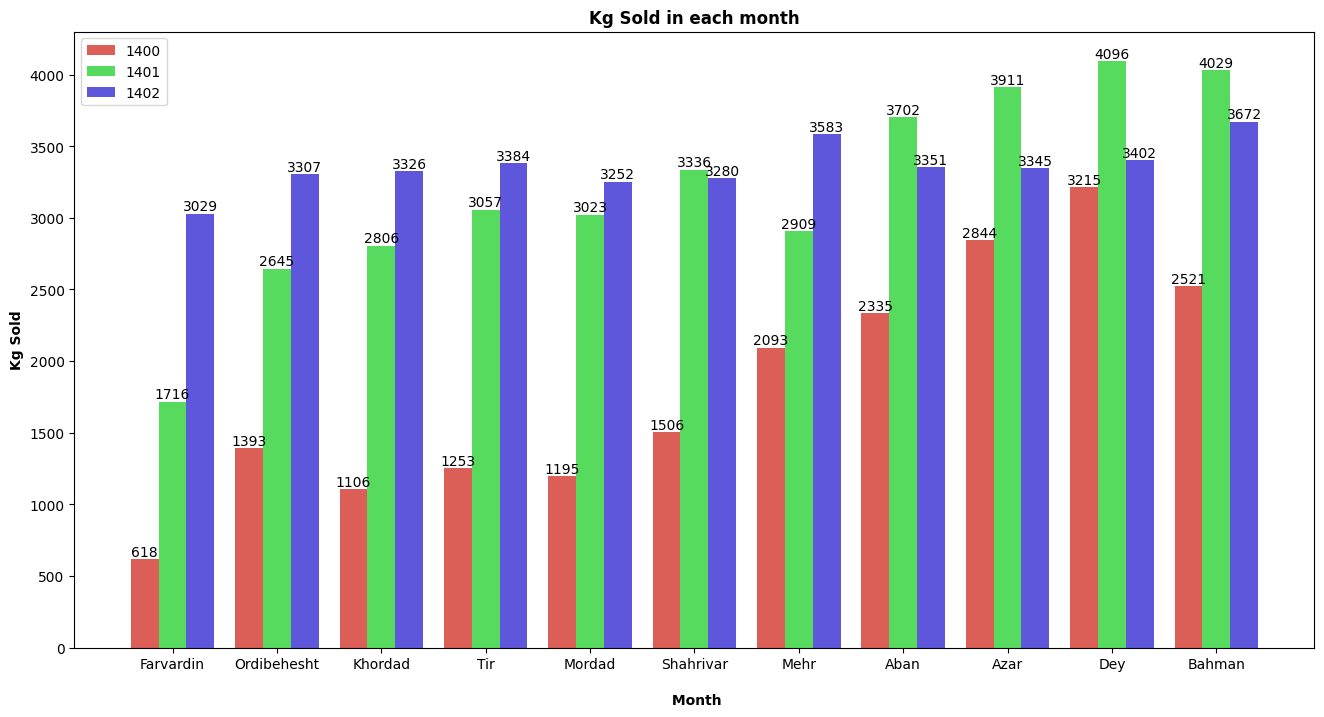

In [3]:

def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg= round(sum(df[df["ماه"] == i] ["مقدار-فرعي"].to_list())/1000,6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(sale_1402)

group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar", "Dey","Bahman"]

# Generate a random color palette
num_colors = 3  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)

# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Kg Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [kg_1400, kg_1401, kg_1402])

plt.show()

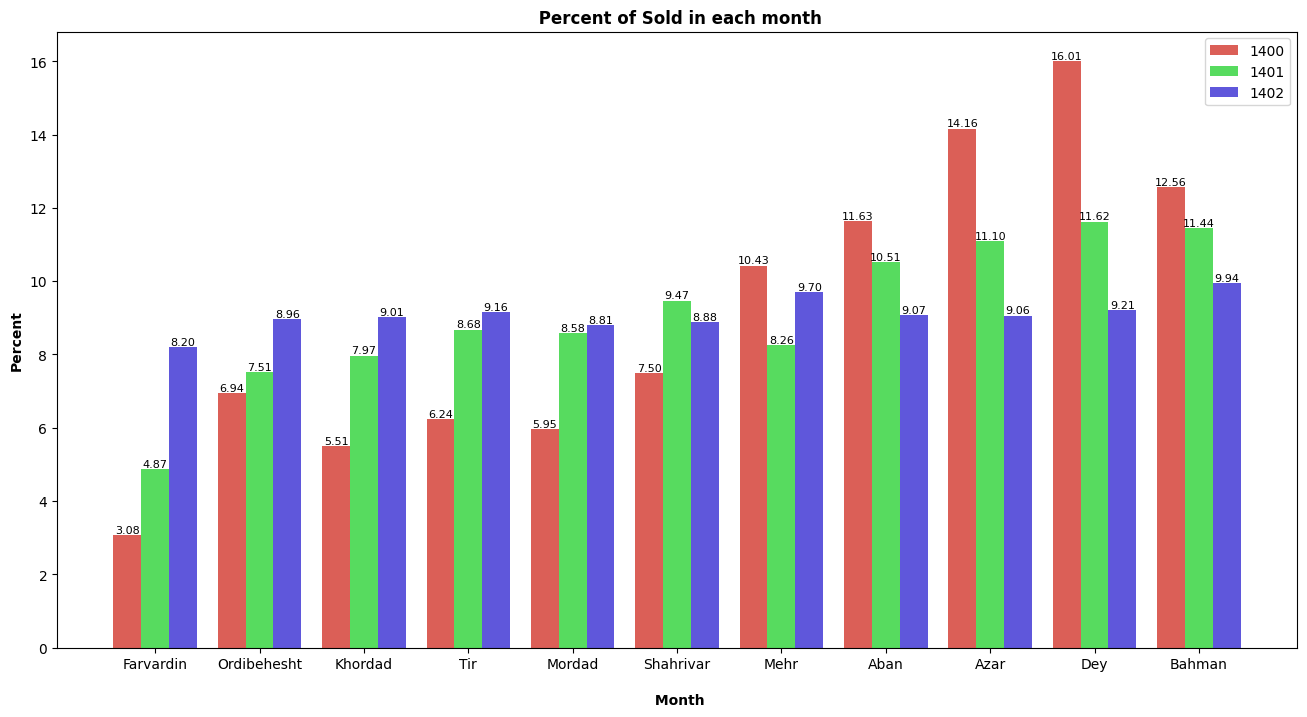

In [29]:
def kg_month(df):
    total_kg = sum(df["مقدار-فرعي"].to_list())
    data_dict = {}
    for i in set(df["ماه"]):
        kg= (sum(df[df["ماه"] == i]["مقدار-فرعي"].to_list()) / total_kg)* 100
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(sale_1402)

group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar","Dey","Bahman"]

num_colors = 3  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)
# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Percent', weight='semibold')
    plt.title(" Percent of Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.2f}', ha='center', va='bottom', size=8)
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [kg_1400, kg_1401, kg_1402])

plt.show()

## بر حسب گروه مشتری

In [4]:
from bokeh.models import Label

def customer(sale,string):    
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    number_of_days = len(set(sale["تاريخ"].tolist()))

    cafe_rows = []
    personal_rows = []
    cafe_ids = []
    personal_ids = []
    for i in range(len(sale)):
        costumer_type  = sale.loc[i, "كد گروه مشتري"]
        costumer_id = sale.loc[i, "كد مشتري"]
        if costumer_type == 2:
            cafe_ids.append(costumer_id)
            cafe_rows.append(i)

        elif costumer_type ==1:
            personal_ids.append(costumer_id)
            personal_rows.append(i)

    total_order_numbers = len(set(sale["شماره"].tolist()))


    number_of_cafes = len(set(cafe_ids))
    number_of_personal = len(set(personal_ids))

    # creating Datframes for ALL CAFE'S (AGGREGATE)
    cafe_df = sale[sale["كد گروه مشتري"] == 2]
    # calculating how many orders we had from cafe
    orders_from_cafe = len(set(cafe_df["شماره"].to_list()))
    total_sale_by_cafe = sum(cafe_df["خالص"].to_list())

    # ---------------------------------------------------------------------------------------------------------------------------
    # creating Dataframes for ALL PERSONS (AGGREGATE)
    personal_df = sale[sale["كد گروه مشتري"] == 1]
    # calculating how many orders we had from persons
    orders_from_personal = len(set(personal_df["شماره"].to_list()))
    total_sale_by_person = sum(personal_df["خالص"].to_list())

    # ---------------------------------------------------------------------------------------------------------------------------

    # creating Dataframe for Each cafe
    cafe_dict = {}
    for i in cafe_ids:
        each_cafe_df = pd.DataFrame(sale[sale["كد مشتري"] == i])
        number_of_orders = len(set(each_cafe_df["شماره"].tolist()))
        total_buy = sum(each_cafe_df["خالص"].tolist())

        cafe_dict[f"{i}"] = {"total_orders" : number_of_orders,
                            "total_buy" : total_buy
                            }

    # finding top 3 cafe costumers based on number of ordrs
    top_orders_cafe_dict = {}
    for i in cafe_dict.keys():
        top_orders_cafe_dict[i] = cafe_dict[i]["total_orders"]   

    top_3_cafe_by_order = sorted(top_orders_cafe_dict, key=top_orders_cafe_dict.get, reverse=True)[:3]
    first_cafe_by_order =  pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_cafe_by_order[0])])["مشتري"].to_list()[0]  
    second_cafe_by_order =  pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_cafe_by_order[1])])["مشتري"].to_list()[0]   
    third_cafe_by_order =  pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_cafe_by_order[2])])["مشتري"].to_list()[0]  

    # Finding top three cafe customers based on their total buy
    top_buy_cafe_dict = {}
    for i in cafe_dict.keys():
        top_buy_cafe_dict[i] = cafe_dict[i]["total_buy"]

    top_3_cafe_by_buy = sorted(top_buy_cafe_dict, key=top_buy_cafe_dict.get, reverse=True)[:3]
    first_cafe_by_buy = pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_cafe_by_buy[0])])["مشتري"].to_list()[0] 
    second_cafe_by_buy = pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_cafe_by_buy[1])])["مشتري"].to_list()[0] 
    third_cafe_by_buy = pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_cafe_by_buy[2])])["مشتري"].to_list()[0] 


    # creating Dataframe for Each person
    person_dict = {}
    for i in personal_ids:
        each_person_df = pd.DataFrame(sale[sale["كد مشتري"] == i])
        number_of_personal_orders = len(set(each_person_df["شماره"].tolist()))

        person_dict[f"{i}"] = {"total_orders" : number_of_personal_orders,
                            }

    # finding top 3 person customers based on number of orders
    top_orders_person_dict = {}
    for i in person_dict.keys():
        top_orders_person_dict[i] = person_dict[i]["total_orders"]   

    top_3_person_by_order = sorted(top_orders_person_dict, key=top_orders_person_dict.get, reverse=True)[:3]
    first_person_by_order =  pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_person_by_order[0])])["مشتري"].to_list()[0]  
    second_person_by_order =  pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_person_by_order[1])])["مشتري"].to_list()[0]   
    third_person_by_order =  pd.DataFrame(sale[sale["كد مشتري"] == int(top_3_person_by_order[2])])["مشتري"].to_list()[0]  



    print(f"in {string} we had {total_order_numbers:,} number of orders")
    print(f"this means we had an average {round(total_order_numbers/ number_of_days,2)} orders per day\n")
    print("-----------------------------------------------------------------------")
    print(f"our total Rial sale in {string} is {total_sale:,} Rial")
    print(f"this means we had an average {round(total_sale/ number_of_days,2):,} Rial sale per day\n")
    print("-----------------------------------------------------------------------")
    print(f"our total KG sale in {string} is {total_kg_sale:,} KG")
    print(f"this means we had an average {round(total_kg_sale/ number_of_days,2):,} KG sale per day\n")
    print("-----------------------------------------------------------------------")
    print(f"from this amount of sale {round((total_sale_by_cafe/total_sale)*100,2)}% was from cafe")
    print(f"from this amount of sale {round((total_sale_by_person/total_sale)*100,2)}% was from persons\n")
    print("-----------------------------------------------------------------------")
    print(f"from this number of orders, {orders_from_cafe} were from cafes ({round((orders_from_cafe/total_order_numbers)*100,2):,}%) ")  
    print(f"from this number of orders, {orders_from_personal} were from persons ({round((orders_from_personal/total_order_numbers)*100,2):,}%)\n ")   
    print("-----------------------------------------------------------------------")
    print(f" in {string} we had {number_of_personal} persons that order us at least once") 
    print(f" in {string} we had {number_of_cafes} cafes that order us at least once\n")
    print("-----------------------------------------------------------------------")
    print("our top 3 cafe customers by number of orders are: \n")
    print(f"1st: {first_cafe_by_order} with {top_orders_cafe_dict[top_3_cafe_by_order[0]]} orders")
    print(f"2nd: {second_cafe_by_order} with {top_orders_cafe_dict[top_3_cafe_by_order[1]]} orders")
    print(f"3rd: {third_cafe_by_order} with {top_orders_cafe_dict[top_3_cafe_by_order[2]]} orders")
    print("-----------------------------------------------------------------------")
    print("our top 3 person customers by number of orders are: \n")
    print(f"1st: {first_person_by_order} with {top_orders_person_dict[top_3_person_by_order[0]]} orders")
    print(f"2nd: {second_person_by_order} with {top_orders_person_dict[top_3_person_by_order[1]]} orders")
    print(f"3rd: {third_person_by_order} with {top_orders_person_dict[top_3_person_by_order[2]]} orders")
    print("-----------------------------------------------------------------------")
    print("our top 3 cafe customers based on their whole Rial amount of buy are: \n")
    print(f"1st: {first_cafe_by_buy} with {top_buy_cafe_dict[top_3_cafe_by_buy[0]]:,} Rial ({round((top_buy_cafe_dict[top_3_cafe_by_buy[0]] /total_sale)*100,2):,}% of Total Sale)")
    print(f"2nd: {second_cafe_by_buy} with {top_buy_cafe_dict[top_3_cafe_by_buy[1]]:,} Rial ({round((top_buy_cafe_dict[top_3_cafe_by_buy[1]] / total_sale)*100,2):,}% of Total Sale)")
    print(f"3rd: {third_cafe_by_buy} with {top_buy_cafe_dict[top_3_cafe_by_buy[2]]:,} Rial ({round((top_buy_cafe_dict[top_3_cafe_by_buy[2]] /total_sale)*100,2):,}% of Total Sale)")
    # print("-----------------------------------------------------------------------")


    return {"total_order_numbers" : total_order_numbers , "order_per_day": round(total_order_numbers/ number_of_days,2), 
            "total_rial_sale": total_sale, "total_sale_per_day": round(total_sale/ number_of_days,2), 
            "total_kg_sale": total_kg_sale, "total_kg_sale_per_day": round(total_kg_sale/ number_of_days,2),
            "total_sale_cafe_percent":round((total_sale_by_cafe/total_sale)*100,2),
             "total_sale_person_percent": round((total_sale_by_person/total_sale)*100,2),
             "order_numbers_from_cafe": orders_from_cafe, 
             "order_percent_from_cafe": round((orders_from_cafe/total_order_numbers)*100,2),
             "order_number_from_person": orders_from_personal,
             "order_percent_from_person": round((orders_from_personal/total_order_numbers)*100,2),
             "unique_persons_id": number_of_personal, "unique_cafe_id": number_of_cafes,
             "first_cafe_by_order": first_cafe_by_order, 
             "first_cafe_by_order_number": top_orders_cafe_dict[top_3_cafe_by_order[0]],
             "second_cafe_by_order": second_cafe_by_order,
             "second_cafe_by_order_number": top_orders_cafe_dict[top_3_cafe_by_order[1]],
             "third_cafe_by_order": third_cafe_by_order,
             "third_cafe_by_order_number": top_orders_cafe_dict[top_3_cafe_by_order[2]],
             "first_person_by_order": first_person_by_order,
             "first_person_by_order_number": top_orders_person_dict[top_3_person_by_order[0]],
             "second_person_by_order": second_person_by_order,
             "second_person_by_order_number": top_orders_person_dict[top_3_person_by_order[1]],
             "third_person_by_order": third_person_by_order,
             "third_person_by_order_number": top_orders_person_dict[top_3_person_by_order[2]],
             "first_cafe_by_buy": first_cafe_by_buy,
             "first_cafe_by_buy_rial": top_buy_cafe_dict[top_3_cafe_by_buy[0]],
             "first_cafe_by_buy_percent": round((top_buy_cafe_dict[top_3_cafe_by_buy[0]] /total_sale)*100,2),
             "second_cafe_by_buy": second_cafe_by_buy,
             "second_cafe_by_buy_rial": top_buy_cafe_dict[top_3_cafe_by_buy[1]],
             "second_cafe_by_buy_percent": round((top_buy_cafe_dict[top_3_cafe_by_buy[1]] /total_sale)*100,2),
            "third_cafe_by_buy": third_cafe_by_buy,
             "third_cafe_by_buy_rial": top_buy_cafe_dict[top_3_cafe_by_buy[2]],
             "third_cafe_by_buy_percent": round((top_buy_cafe_dict[top_3_cafe_by_buy[2]] /total_sale)*100,2)

               }

sale_1400_dict = customer(sale_1400, "1400")
sale_1401_dict = customer(sale_1401, "1401")
sale_1402_dict = customer(sale_1402, "1402")
# -----------------------------------------------------------------------------------------------------
# total order number
total_order_number_1400 = sale_1400_dict["total_order_numbers"]
total_order_number_1401 = sale_1401_dict["total_order_numbers"]
total_order_number_1402 = sale_1402_dict["total_order_numbers"]


# order_numbers_from_cafe
order_numbers_from_cafe_1400 = sale_1400_dict["order_numbers_from_cafe"]
order_numbers_from_cafe_1401 = sale_1401_dict["order_numbers_from_cafe"]
order_numbers_from_cafe_1402 = sale_1402_dict["order_numbers_from_cafe"]


# order_percent_from_cafe
order_percent_from_cafe_1400 = sale_1400_dict["order_percent_from_cafe"]
order_percent_from_cafe_1401 = sale_1401_dict["order_percent_from_cafe"]
order_percent_from_cafe_1402 = sale_1402_dict["order_percent_from_cafe"]


# order_number_from_person
order_number_from_person_1400 = sale_1400_dict["order_number_from_person"]
order_number_from_person_1401 = sale_1401_dict["order_number_from_person"]
order_number_from_person_1402 = sale_1402_dict["order_number_from_person"]



# order_percent_from_person
order_percent_from_person_1400 = sale_1400_dict["order_percent_from_person"]
order_percent_from_person_1401 = sale_1401_dict["order_percent_from_person"]
order_percent_from_person_1402 = sale_1402_dict["order_percent_from_person"]


# orders per day
order_per_day_1400 = sale_1400_dict["order_per_day"]
order_per_day_1401 = sale_1401_dict["order_per_day"]
order_per_day_1402 = sale_1402_dict["order_per_day"]

days = ['1400', '1401', '1402']
categories = ['Person', 'Cafe', 'Total']
data = {'days': days,
        'Person': [order_number_from_person_1400, order_number_from_person_1401, order_number_from_person_1402],
        'Cafe': [order_numbers_from_cafe_1400, order_numbers_from_cafe_1401, order_numbers_from_cafe_1402],
        'Total': [total_order_number_1400, total_order_number_1401, total_order_number_1402]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the figure
p = figure(x_range=days, height=600, width= 1000, title="Number Of order In Each Group Of Customers",
        toolbar_location=None, tools="")

# Render the bars
p.vbar(x=dodge('days', -0.25, range=p.x_range), top='Person', width=0.2, source=source, color="blue", legend_label="Person")
p.vbar(x=dodge('days',  0.0,  range=p.x_range), top='Cafe', width=0.2, source=source, color="green", legend_label="Cafe")
p.vbar(x=dodge('days',  0.25,  range=p.x_range), top='Total', width=0.2, source=source, color="purple", legend_label="Total")

# Customize the plot
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "7pt" 
p.legend.background_fill_alpha = 0.1  # Set the opacity of the legend background
label = Label(x=10, y=450, x_units='screen', y_units='screen',
              text=f'orders per day in each year:\n 1400: {order_per_day_1400}\n 1401: {order_per_day_1401}\n 1402: {order_per_day_1402}',
              text_font_style='italic', text_font='helvetica', text_font_size='8pt', text_color='black')
p.add_layout(label)
# Show the plot
output_notebook()
show(p)

# -----------------------------------------------------------------------------------------------------
# total_rial_sale
total_rial_sale_1400 = sale_1400_dict["total_rial_sale"]
total_rial_sale_1401 = sale_1401_dict["total_rial_sale"]
total_rial_sale_1402 = sale_1402_dict["total_rial_sale"]


# total_sale_per_day
total_sale_per_day_1400 = sale_1400_dict["total_sale_per_day"]
total_sale_per_day_1401 = sale_1401_dict["total_sale_per_day"]
total_sale_per_day_1402 = sale_1402_dict["total_sale_per_day"]

output_notebook()
years = ["1400", "1401", "1402"]
data = [total_rial_sale_1400, total_rial_sale_1401, total_rial_sale_1402]  # Replace with your actual data
p = figure(x_range=years, height=600, width=1000, title="Total Sale in Each Year Rial", toolbar_location=None, tools="")
p.vbar(x=years, top=data, width=0.5, color=['teal', "violet", "yellowgreen"])
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = 'Value'
label = Label(x=10, y=450, x_units='screen', y_units='screen',
              text=f'Rial Sale per day in each year:\n 1400: {total_sale_per_day_1400:,}\n 1401: {total_sale_per_day_1401:,}\n 1402: {total_sale_per_day_1402:,}',
              text_font_style='italic', text_font='helvetica', text_font_size='8pt', text_color='black')
p.add_layout(label)
p.yaxis.formatter = NumeralTickFormatter(format="0,0")  # Format y-axis tick labels with thousand separators


show(p)
# -----------------------------------------------------------------------------------------------------

# total_kg_sale
total_kg_sale_1400 = sale_1400_dict["total_kg_sale"]
total_kg_sale_1401 = sale_1401_dict["total_kg_sale"]
total_kg_sale_1402 = sale_1402_dict["total_kg_sale"]

# total_kg_sale_per_day
total_kg_sale_per_day_1400 = sale_1400_dict["total_kg_sale_per_day"]
total_kg_sale_per_day_1401 = sale_1401_dict["total_kg_sale_per_day"]
total_kg_sale_per_day_1402 = sale_1402_dict["total_kg_sale_per_day"]

output_notebook()
years = ["1400", "1401", "1402"]
data = [total_kg_sale_1400, total_kg_sale_1401, total_kg_sale_1402]  # Replace with your actual data
p = figure(x_range=years, height=600, width=1000, title="Total Sale in Each Year KG", toolbar_location=None, tools="")
p.vbar(x=years, top=data, width=0.5, color=['teal', "violet", "yellowgreen"])
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = 'Value'
label = Label(x=10, y=450, x_units='screen', y_units='screen',
              text=f'KG Sale per day in each year:\n 1400: {total_kg_sale_per_day_1400:,}\n 1401: {total_kg_sale_per_day_1401:,}\n 1402: {total_kg_sale_per_day_1402:,}',
              text_font_style='italic', text_font='helvetica', text_font_size='8pt', text_color='black')
p.add_layout(label)

show(p)

# -----------------------------------------------------------------------------------------------------

# total_sale_cafe_percent
total_sale_cafe_percent_1400 = sale_1400_dict["total_sale_cafe_percent"]
total_sale_cafe_percent_1401 = sale_1401_dict["total_sale_cafe_percent"]
total_sale_cafe_percent_1402 = sale_1402_dict["total_sale_cafe_percent"]

# total_sale_person_percent
total_sale_person_percent_1400 = sale_1400_dict["total_sale_person_percent"]
total_sale_person_percent_1401 = sale_1401_dict["total_sale_person_percent"]
total_sale_person_percent_1402 = sale_1402_dict["total_sale_person_percent"]



output_notebook()
categories = ['1400', '1401', '1402']
values_1 = [total_sale_cafe_percent_1400, total_sale_cafe_percent_1401, total_sale_cafe_percent_1402]
values_2 = [total_sale_person_percent_1400, total_sale_person_percent_1401, total_sale_person_percent_1402]
bar_width = 0.35
index = np.arange(len(categories))

p = figure(x_range=categories, height=600, width=1000 ,title="Cafe & Personal Income Share %",
           toolbar_location=None, tools="")

p.vbar(x=index, top=values_1, width=bar_width, color="teal", legend_label="Cafe Sale Share%")
p.vbar(x=index + bar_width, top=values_2, width=bar_width, color="violet", legend_label="Personal Sale Share%")

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = 'Value'

show(p)


# -----------------------------------------------------------------------------------------------------

# unique_persons_id
unique_persons_id_1400 = sale_1400_dict["unique_persons_id"]
unique_persons_id_1401 = sale_1401_dict["unique_persons_id"]
unique_persons_id_1402 = sale_1402_dict["unique_persons_id"]

# unique_cafe_id
unique_cafe_id_1400 =sale_1400_dict["unique_cafe_id"]
unique_cafe_id_1401 =sale_1401_dict["unique_cafe_id"]
unique_cafe_id_1402 =sale_1402_dict["unique_cafe_id"]

days = ['1400', '1401', '1402']
categories = ['Person', 'Cafe', 'Total']
data = {'days': days,
        'Person': [unique_persons_id_1400, unique_persons_id_1401, unique_persons_id_1402],
        'Cafe': [unique_cafe_id_1400, unique_cafe_id_1401, unique_cafe_id_1402],
        'Total': [unique_persons_id_1400+unique_cafe_id_1400, unique_persons_id_1401+unique_cafe_id_1401, unique_persons_id_1402+unique_cafe_id_1402]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the figure
p = figure(x_range=days, height=600, width= 1000, title="Number Of Unique Customers In Each Group ",
        toolbar_location=None, tools="")

# Render the bars
p.vbar(x=dodge('days', -0.25, range=p.x_range), top='Person', width=0.2, source=source, color="blue", legend_label="Person")
p.vbar(x=dodge('days',  0.0,  range=p.x_range), top='Cafe', width=0.2, source=source, color="green", legend_label="Cafe")
p.vbar(x=dodge('days',  0.25,  range=p.x_range), top='Total', width=0.2, source=source, color="purple", legend_label="Total")

# Customize the plot
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "7pt" 
p.legend.background_fill_alpha = 0.1  # Set the opacity of the legend background

# Show the plot
output_notebook()
show(p)
# -----------------------------------------------------------------------------------------------------

# first_cafe_by_order
first_cafe_by_order_1400 = sale_1400_dict["first_cafe_by_order"]
first_cafe_by_order_1401 = sale_1401_dict["first_cafe_by_order"]
first_cafe_by_order_1402 = sale_1402_dict["first_cafe_by_order"]

# first_cafe_by_order_number
first_cafe_by_order_number_1400 = sale_1400_dict["first_cafe_by_order_number"]
first_cafe_by_order_number_1401 = sale_1401_dict["first_cafe_by_order_number"]
first_cafe_by_order_number_1402 = sale_1402_dict["first_cafe_by_order_number"]


# second_cafe_by_order
second_cafe_by_order_1400 = sale_1400_dict["second_cafe_by_order"]
second_cafe_by_order_1401 = sale_1401_dict["second_cafe_by_order"]
second_cafe_by_order_1402 = sale_1402_dict["second_cafe_by_order"]


# second_cafe_by_order_number
second_cafe_by_order_number_1400 = sale_1400_dict["second_cafe_by_order_number"]
second_cafe_by_order_number_1401 = sale_1401_dict["second_cafe_by_order_number"]
second_cafe_by_order_number_1402 = sale_1402_dict["second_cafe_by_order_number"]


# third_cafe_by_order
third_cafe_by_order_1400 = sale_1400_dict["third_cafe_by_order"]
third_cafe_by_order_1401 = sale_1401_dict["third_cafe_by_order"]
third_cafe_by_order_1402 = sale_1402_dict["third_cafe_by_order"]

# third_cafe_by_order_number
third_cafe_by_order_number_1400 = sale_1400_dict["third_cafe_by_order_number"]
third_cafe_by_order_number_1401 = sale_1401_dict["third_cafe_by_order_number"]
third_cafe_by_order_number_1402 = sale_1402_dict["third_cafe_by_order_number"]

days = ['1400', '1401', '1402']
categories = ['1st Cafe', '2nd Cafe', '3rd Cafe']
data = {'days': days,
        '1st Cafe': [first_cafe_by_order_number_1400, first_cafe_by_order_number_1401, first_cafe_by_order_number_1402],
        '2nd Cafe': [second_cafe_by_order_number_1400, second_cafe_by_order_number_1401, second_cafe_by_order_number_1402],
        '3rd Cafe': [third_cafe_by_order_number_1400, third_cafe_by_order_number_1401, third_cafe_by_order_number_1402]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the figure
p = figure(x_range=days, height=600, width= 1000, title="Top 3 Cafe By Number of Orders",
        toolbar_location=None, tools="")

# Render the bars
p.vbar(x=dodge('days', -0.25, range=p.x_range), top='1st Cafe', width=0.2, source=source, color="blue", legend_label="1st Cafe")
p.vbar(x=dodge('days',  0.0,  range=p.x_range), top='2nd Cafe', width=0.2, source=source, color="green", legend_label="2nd Cafe")
p.vbar(x=dodge('days',  0.25,  range=p.x_range), top='3rd Cafe', width=0.2, source=source, color="purple", legend_label="3rd Cafe")

# Customize the plot
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "7pt" 
p.legend.background_fill_alpha = 0.1  # Set the opacity of the legend background
label = Label(x=10, y=450, x_units='screen', y_units='screen',
              text=f'Top 3 Cafe 1400: {first_cafe_by_order_1400}, {second_cafe_by_order_1400}, {third_cafe_by_order_1400}\n Top 3 Cafe 1401: {first_cafe_by_order_1400}, {second_cafe_by_order_1401}, {third_cafe_by_order_1401}\n Top 3 Cafe 1402: {first_cafe_by_order_1402}, {second_cafe_by_order_1402}, {third_cafe_by_order_1402}\n',
              text_font_style='italic', text_font='helvetica', text_font_size='6pt', text_color='black')
p.add_layout(label)
# Show the plot
output_notebook()
show(p)


# -----------------------------------------------------------------------------------------------------

# first_person_by_order
first_person_by_order_1400 = sale_1400_dict["first_person_by_order"]
first_person_by_order_1401 = sale_1401_dict["first_person_by_order"]
first_person_by_order_1402 = sale_1402_dict["first_person_by_order"]

# first_person_by_order_number
first_person_by_order_number_1400 = sale_1400_dict["first_person_by_order_number"]
first_person_by_order_number_1401 = sale_1401_dict["first_person_by_order_number"]
first_person_by_order_number_1402 = sale_1402_dict["first_person_by_order_number"]


# second_person_by_order
second_person_by_order_1400 = sale_1400_dict["second_person_by_order"]
second_person_by_order_1401 = sale_1401_dict["second_person_by_order"]
second_person_by_order_1402 = sale_1402_dict["second_person_by_order"]

# second_person_by_order_number
second_person_by_order_number_1400 = sale_1400_dict['second_person_by_order_number']
second_person_by_order_number_1401 = sale_1401_dict['second_person_by_order_number']
second_person_by_order_number_1402 = sale_1402_dict['second_person_by_order_number']


# third_person_by_order
third_person_by_order_1400 = sale_1400_dict["third_person_by_order"]
third_person_by_order_1401 = sale_1401_dict["third_person_by_order"]
third_person_by_order_1402 = sale_1402_dict["third_person_by_order"]

# third_person_by_order_number
third_person_by_order_number_1400 = sale_1400_dict["third_person_by_order_number"]
third_person_by_order_number_1401 = sale_1401_dict["third_person_by_order_number"]
third_person_by_order_number_1402 = sale_1402_dict["third_person_by_order_number"]

days = ['1400', '1401', '1402']
categories = ['1st Person', '2nd Person', '3rd Person']
data = {'days': days,
        '1st Person': [first_person_by_order_number_1400, first_person_by_order_number_1401, first_person_by_order_number_1402],
        '2nd Person': [second_person_by_order_number_1400, second_person_by_order_number_1401, second_person_by_order_number_1402],
        '3rd Person': [third_person_by_order_number_1400, third_person_by_order_number_1401, third_person_by_order_number_1402]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the figure
p = figure(x_range=days, height=600, width= 1000, title="Top 3 Person By Number of Orders",
        toolbar_location=None, tools="")

# Render the bars
p.vbar(x=dodge('days', -0.25, range=p.x_range), top='1st Person', width=0.2, source=source, color="blue", legend_label="1st Person")
p.vbar(x=dodge('days',  0.0,  range=p.x_range), top='2nd Person', width=0.2, source=source, color="green", legend_label="2nd Person")
p.vbar(x=dodge('days',  0.25,  range=p.x_range), top='3rd Person', width=0.2, source=source, color="purple", legend_label="3rd Person")

# Customize the plot
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "7pt" 
p.legend.background_fill_alpha = 0.1  # Set the opacity of the legend background
label = Label(x=10, y=450, x_units='screen', y_units='screen',
              text=f'Top 3 Person 1400: {first_person_by_order_1400}, {second_person_by_order_1400}, {third_person_by_order_1400}\n Top 3 Person 1401: {first_person_by_order_1400}, {second_person_by_order_1401}, {third_person_by_order_1401}\n Top 3 Person 1402: {first_person_by_order_1402}, {second_person_by_order_1402}, {third_person_by_order_1402}\n',
              text_font_style='italic', text_font='helvetica', text_font_size='6pt', text_color='black')
p.add_layout(label)
# Show the plot
output_notebook()
show(p)

# -----------------------------------------------------------------------------------------------------

# first_cafe_by_buy
first_cafe_by_buy_1400 = sale_1400_dict["first_cafe_by_buy"]
first_cafe_by_buy_1401 = sale_1401_dict["first_cafe_by_buy"]
first_cafe_by_buy_1402 = sale_1402_dict["first_cafe_by_buy"]


# first_cafe_by_buy_rial
first_cafe_by_buy_rial_1400 = sale_1400_dict["first_cafe_by_buy_rial"]
first_cafe_by_buy_rial_1401 = sale_1401_dict["first_cafe_by_buy_rial"]
first_cafe_by_buy_rial_1402 = sale_1402_dict["first_cafe_by_buy_rial"]


# first_cafe_by_buy_percent
first_cafe_by_buy_percent_1400 = sale_1400_dict["first_cafe_by_buy_percent"]
first_cafe_by_buy_percent_1401 = sale_1401_dict["first_cafe_by_buy_percent"]
first_cafe_by_buy_percent_1402 = sale_1402_dict["first_cafe_by_buy_percent"]


# second_cafe_by_buy
second_cafe_by_buy_1400 = sale_1400_dict["second_cafe_by_buy"]
second_cafe_by_buy_1401 = sale_1401_dict["second_cafe_by_buy"]
second_cafe_by_buy_1402 = sale_1402_dict["second_cafe_by_buy"]


# second_cafe_by_buy_rial
second_cafe_by_buy_rial_1400 = sale_1400_dict["second_cafe_by_buy_rial"]
second_cafe_by_buy_rial_1401 = sale_1401_dict["second_cafe_by_buy_rial"]
second_cafe_by_buy_rial_1402 = sale_1402_dict["second_cafe_by_buy_rial"]


# second_cafe_by_buy_percent
second_cafe_by_buy_percent_1400 = sale_1400_dict["second_cafe_by_buy_percent"]
second_cafe_by_buy_percent_1401 = sale_1401_dict["second_cafe_by_buy_percent"]
second_cafe_by_buy_percent_1402 = sale_1402_dict["second_cafe_by_buy_percent"]


# third_cafe_by_buy
third_cafe_by_buy_1400 = sale_1400_dict["third_cafe_by_buy"]
third_cafe_by_buy_1401 = sale_1401_dict["third_cafe_by_buy"]
third_cafe_by_buy_1402 = sale_1402_dict["third_cafe_by_buy"]

# third_cafe_by_buy_rial
third_cafe_by_buy_rial_1400 = sale_1400_dict["third_cafe_by_buy_rial"]
third_cafe_by_buy_rial_1401 = sale_1401_dict["third_cafe_by_buy_rial"]
third_cafe_by_buy_rial_1402 = sale_1402_dict["third_cafe_by_buy_rial"]


# third_cafe_by_buy_percent
third_cafe_by_buy_percent_1400 = sale_1400_dict["third_cafe_by_buy_percent"]
third_cafe_by_buy_percent_1401 = sale_1401_dict["third_cafe_by_buy_percent"]
third_cafe_by_buy_percent_1402 = sale_1402_dict["third_cafe_by_buy_percent"]


days = ['1400', '1401', '1402']
categories = ['1st Cafe', '2nd Cafe', '3rd Cafe']
data = {'days': days,
        '1st Cafe': [first_cafe_by_buy_rial_1400, first_cafe_by_buy_rial_1401, first_cafe_by_buy_rial_1402],
        '2nd Cafe': [second_cafe_by_buy_rial_1400, second_cafe_by_buy_rial_1401, second_cafe_by_buy_rial_1402],
        '3rd Cafe': [third_cafe_by_buy_rial_1400, third_cafe_by_buy_rial_1401, third_cafe_by_buy_rial_1402]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the figure
p = figure(x_range=days, height=600, width= 1000, title="Top 3 Cafe By Total Rial Sale",
        toolbar_location=None, tools="")

p.vbar(x=dodge('days', -0.25, range=p.x_range), top='1st Cafe', width=0.2, source=source, color="blue", legend_label="1st Cafe")
p.vbar(x=dodge('days',  0.0,  range=p.x_range), top='2nd Cafe', width=0.2, source=source, color="green", legend_label="2nd Cafe")
p.vbar(x=dodge('days',  0.25,  range=p.x_range), top='3rd Cafe', width=0.2, source=source, color="purple", legend_label="3rd Cafe")


# Customize the plot
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "7pt" 
p.legend.background_fill_alpha = 0.1  # Set the opacity of the legend background
p.yaxis.formatter = NumeralTickFormatter(format="0,0")  # Format y-axis tick labels with thousand separators

label = Label(x=10, y=330, x_units='screen', y_units='screen',
              text=f'Top 3 Cafe 1400:\n {first_cafe_by_buy_1400} ({first_cafe_by_buy_percent_1400}%)\n{second_cafe_by_buy_1400} ({second_cafe_by_buy_percent_1400}%)\n{third_cafe_by_buy_1400} ({third_cafe_by_buy_percent_1400}%)\n\n Top 3 Cafe 1401:\n {first_cafe_by_buy_1400} ({first_cafe_by_buy_percent_1401}%)\n {second_cafe_by_buy_1401}({second_cafe_by_buy_percent_1401}%)\n {third_cafe_by_buy_1401}({third_cafe_by_buy_percent_1401}%)\n\n Top 3 Cafe 1402:\n {first_cafe_by_buy_1402} ({first_cafe_by_buy_percent_1402}%)\n {second_cafe_by_buy_1402} ({second_cafe_by_buy_percent_1402}%)\n, {third_cafe_by_buy_1402}({third_cafe_by_buy_percent_1402}%)\n\n',
              text_font_style='italic', text_font='helvetica', text_font_size='6pt', text_color='black')
p.add_layout(label)
# Show the plot
output_notebook()
show(p)

# -----------------------------------------------------------------------------------------------------



in 1400 we had 3,117 number of orders
this means we had an average 10.86 orders per day

-----------------------------------------------------------------------
our total Rial sale in 1400 is 87,621,750,750 Rial
this means we had an average 305,302,267.42 Rial sale per day

-----------------------------------------------------------------------
our total KG sale in 1400 is 20,084.842 KG
this means we had an average 69.98 KG sale per day

-----------------------------------------------------------------------
from this amount of sale 90.78% was from cafe
from this amount of sale 9.17% was from persons

-----------------------------------------------------------------------
from this number of orders, 1758 were from cafes (56.4%) 
from this number of orders, 1350 were from persons (43.31%)
 
-----------------------------------------------------------------------
 in 1400 we had 691 persons that order us at least once
 in 1400 we had 287 cafes that order us at least once

----------------

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## برحسب گروه فروش

V Series --> 19,492.49 KG(97.05% of Total)
77,540,574,034 Rial --> 88.49% of Our Total Sale

-----------------------------------------------------------------------
A Series --> 272.29 KG(1.36% of Total)
3,051,515,706 Rial --> 3.48% of Our Total Sale

-----------------------------------------------------------------------
X Series --> 33.26 KG(0.17% of Total)
1,367,133,510 Rial --> 1.56% of Our Total Sale

-----------------------------------------------------------------------
Brew Book --> 378.0 
316913750 Rial --> 0.36% of Our Total Sale

-----------------------------------------------------------------------
WorkShop --> 169.0 
1435091500 Rial --> 1.64% of Our Total Sale

-----------------------------------------------------------------------
Sensory Box --> 77.0 
321930000 Rial --> 0.37% of Our Total Sale

-----------------------------------------------------------------------
Course --> 47.0 
2235000000 Rial --> 2.55% of Our Total Sale

--------------------------------------------

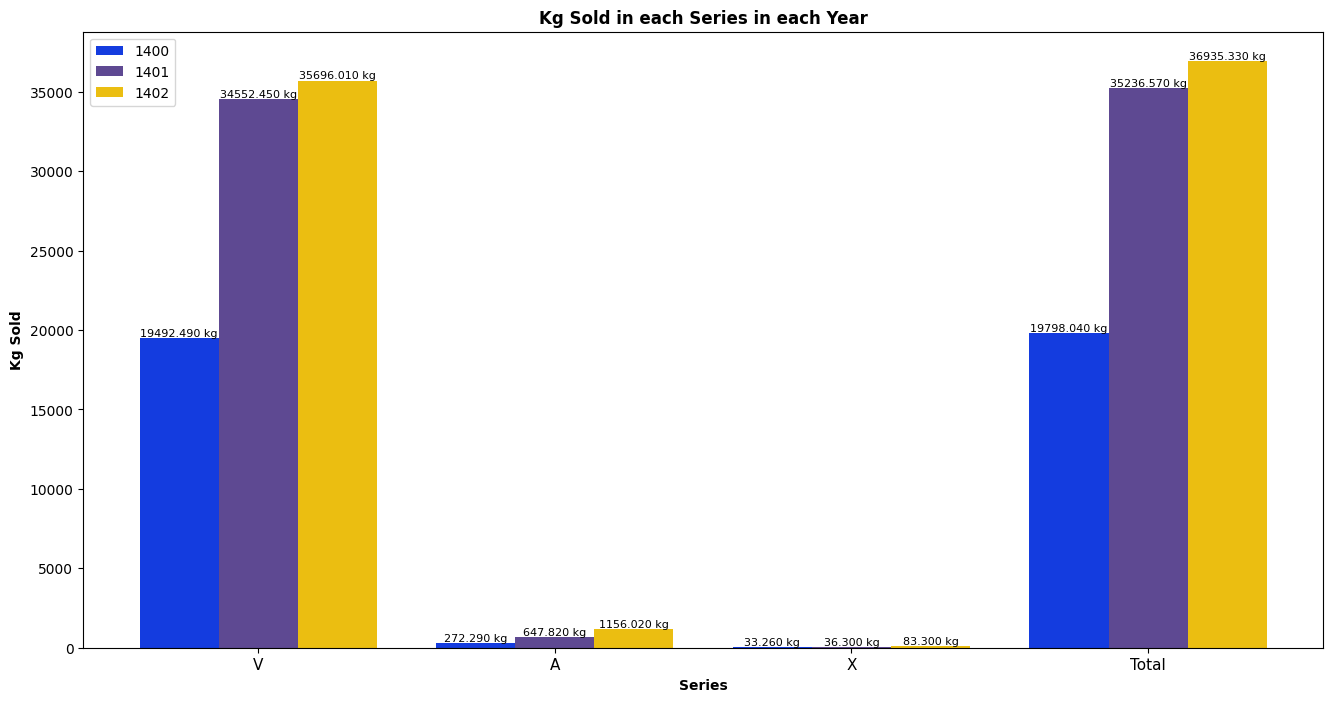

In [5]:

def good_type(sale):
    # Apply the function to each row of the name column
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    sale_each_good_type = sale["گروه فروش"].value_counts().to_dict()

    sale_each_good_type_dict = {}
    for i in sale_each_good_type.keys():
        good_df = sale[sale["گروه فروش"] == i]
        if i in  ["V Series", "A Series", "X Series", "Champion Series", "Cafe Noon"]:
            gram = sum(good_df["مقدار-فرعي"].tolist())
            bought_coffee = sum(good_df["خالص"].to_list())        
            print(f"{i} --> {round(gram/1000,2):,} KG({round(((gram/1000)/total_kg_sale)*100,2)}% of Total)")
            print(f"{bought_coffee:,} Rial --> {round((bought_coffee/total_sale)*100,2)}% of Our Total Sale\n")
            print("-----------------------------------------------------------------------")

        else:
            count = sum(good_df["مقدار-اصلي"].tolist())
            bought = sum(good_df["خالص"].to_list())
            print(f"{i} --> {count} ")
            print(f"{bought} Rial --> {round((bought/total_sale)*100,2)}% of Our Total Sale\n")
            print("-----------------------------------------------------------------------")       
        sale_each_good_type_dict[i] = {"number_of_orders": sale_each_good_type[i],
                                "KG": round(gram/1000,2), "KG_percent": round(((gram/1000)/total_kg_sale)*100,2),
                                "rial":bought_coffee, "rial_percent": round((bought_coffee/total_sale)*100,2)  }

    print("-----------------------------------------------------------------------")
    print("our orders based on their good type are as following: \n")
    for i in sale_each_good_type.keys():
        print(f"{i} with {sale_each_good_type[i]} orders")
    print("-----------------------------------------------------------------------")

    return sale_each_good_type_dict

sale_1400_dict = good_type(sale_1400)
sale_1401_dict = good_type(sale_1401)
sale_1402_dict = good_type(sale_1402)

v_series_number_of_orders_1400 = sale_1400_dict["V Series"]["number_of_orders"]
v_series_kg_1400 = sale_1400_dict["V Series"]["KG"]
v_series_kg_percent_1400 = sale_1400_dict["V Series"]["KG_percent"]
v_series_rial_1400 = sale_1400_dict["V Series"]["rial"]
v_series_rial_percent_1400 = sale_1400_dict["V Series"]["rial_percent"]

v_series_number_of_orders_1401 = sale_1401_dict["V Series"]["number_of_orders"]
v_series_kg_1401 = sale_1401_dict["V Series"]["KG"]
v_series_kg_percent_1401 = sale_1401_dict["V Series"]["KG_percent"]
v_series_rial_1401 = sale_1401_dict["V Series"]["rial"]
v_series_rial_percent_1401 = sale_1401_dict["V Series"]["rial_percent"]

v_series_number_of_orders_1402 = sale_1402_dict["V Series"]["number_of_orders"]
v_series_kg_1402 = sale_1402_dict["V Series"]["KG"]
v_series_kg_percent_1402 = sale_1402_dict["V Series"]["KG_percent"]
v_series_rial_1402 = sale_1402_dict["V Series"]["rial"]
v_series_rial_percent_1402 = sale_1402_dict["V Series"]["rial_percent"]




a_series_number_of_orders_1400 = sale_1400_dict["A Series"]["number_of_orders"]
a_series_kg_1400 = sale_1400_dict["A Series"]["KG"]
a_series_kg_percent_1400 = sale_1400_dict["A Series"]["KG_percent"]
a_series_rial_1400 = sale_1400_dict["A Series"]["rial"]
a_series_rial_percent_1400 = sale_1400_dict["A Series"]["rial_percent"]

a_series_number_of_orders_1401 = sale_1401_dict["A Series"]["number_of_orders"]
a_series_kg_1401 = sale_1401_dict["A Series"]["KG"]
a_series_kg_percent_1401 = sale_1401_dict["A Series"]["KG_percent"]
a_series_rial_1401 = sale_1401_dict["A Series"]["rial"]
a_series_rial_percent_1401 = sale_1401_dict["A Series"]["rial_percent"]

a_series_number_of_orders_1402 = sale_1402_dict["A Series"]["number_of_orders"]
a_series_kg_1402 = sale_1402_dict["A Series"]["KG"]
a_series_kg_percent_1402 = sale_1402_dict["A Series"]["KG_percent"]
a_series_rial_1402 = sale_1402_dict["A Series"]["rial"]
a_series_rial_percent_1402 = sale_1402_dict["A Series"]["rial_percent"]



x_series_number_of_orders_1400 = sale_1400_dict["X Series"]["number_of_orders"]
x_series_kg_1400 = sale_1400_dict["X Series"]["KG"]
x_series_kg_percent_1400 = sale_1400_dict["X Series"]["KG_percent"]
x_series_rial_1400 = sale_1400_dict["X Series"]["rial"]
x_series_rial_percent_1400 = sale_1400_dict["X Series"]["rial_percent"]

x_series_number_of_orders_1401 = sale_1401_dict["X Series"]["number_of_orders"]
x_series_kg_1401 = sale_1401_dict["X Series"]["KG"]
x_series_kg_percent_1401 = sale_1401_dict["X Series"]["KG_percent"]
x_series_rial_1401 = sale_1401_dict["X Series"]["rial"]
x_series_rial_percent_1401 = sale_1401_dict["X Series"]["rial_percent"]

x_series_number_of_orders_1402 = sale_1402_dict["X Series"]["number_of_orders"]
x_series_kg_1402 = sale_1402_dict["X Series"]["KG"]
x_series_kg_percent_1402 = sale_1402_dict["X Series"]["KG_percent"]
x_series_rial_1402 = sale_1402_dict["X Series"]["rial"]
x_series_rial_percent_1402 = sale_1402_dict["X Series"]["rial_percent"]



# # Extracting the values and labels from the dictionary
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_number_of_orders_1400, a_series_number_of_orders_1400, x_series_number_of_orders_1400 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Percent of Orders 1400')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_number_of_orders_1401, a_series_number_of_orders_1401, x_series_number_of_orders_1401 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Percent of Orders 1401')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_number_of_orders_1402, a_series_number_of_orders_1402, x_series_number_of_orders_1402 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Percent of Orders 1402')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_kg_1400, a_series_kg_1400, x_series_kg_1400 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Kg% 1400')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_kg_1401, a_series_kg_1401, x_series_kg_1401 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('KG% 1401')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_kg_1402, a_series_kg_1402, x_series_kg_1402 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('KG% 1402')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------

# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_rial_1400, a_series_rial_1400, x_series_rial_1400 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Rial Revenue% 1400')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------

# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_rial_1401, a_series_rial_1401, x_series_rial_1401 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Rial Revenue% 1401')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------
# labels = ["V Series", "A Series",  "X Series"]
# sizes = [v_series_rial_1402, a_series_rial_1402, x_series_rial_1402 ]

# # Creating the pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Rial Revenue% 1402')
# # Displaying the chart
# plt.show()
# #------------------------------------------------------------------------------------------------


v_sale = [v_series_kg_1400, a_series_kg_1400,x_series_kg_1400 ,(v_series_kg_1400+a_series_kg_1400+ x_series_kg_1400)]
a_sale = [v_series_kg_1401, a_series_kg_1401,x_series_kg_1401, (v_series_kg_1401+a_series_kg_1401+ x_series_kg_1401)]
x_sale = [v_series_kg_1402, a_series_kg_1402,x_series_kg_1402, (v_series_kg_1402+a_series_kg_1402+ x_series_kg_1402)]


group = ["V", "A", "X", "Total"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('Series', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Kg Sold in each Series in each Year",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.3f} kg', ha='center', va='bottom', size=8)
    plt.xticks(classes_num, classes, size=11)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [v_sale, a_sale, x_sale])

plt.show()
    


## برحسب سری قهوه

our top three coffee based on their sales are: 

1st:  Vortex Specialty Blend    --> 43,710,967,971 Rial (49.89% of Total Sale) With 12,061.4 KG of Sold (60.05% of Total)  
2nd:  Ethiopia Landrace Limu    --> 8,378,749,994 Rial (9.56% of Total Sale) With 2,308.55 KG of Sold (11.49% of Total)  
3rd:   Brazil Microlot Santa Inacia    --> 8,410,539,250 Rial (9.6% of Total Sale) With 2,148.75 KG of Sold (10.7% of Total)  
our top three coffee based on their sales are: 

1st:  Vortex Specialty Blend    --> 85,285,480,065 Rial (38.24% of Total Sale) With 15,110.7 KG of Sold (42.88% of Total)  
2nd:   Brazil Microlot Santa Inacia    --> 44,411,948,543 Rial (19.91% of Total Sale) With 7,493.05 KG of Sold (21.26% of Total)  
3rd:  Ethiopia Landrace Limu    --> 40,219,957,806 Rial (18.03% of Total Sale) With 7,060.05 KG of Sold (20.04% of Total)  
our top three coffee based on their sales are: 

1st:  Vortex Specialty Blend    --> 140,660,105,481 Rial (33.49% of Total Sale) With 14,266.85 KG of 

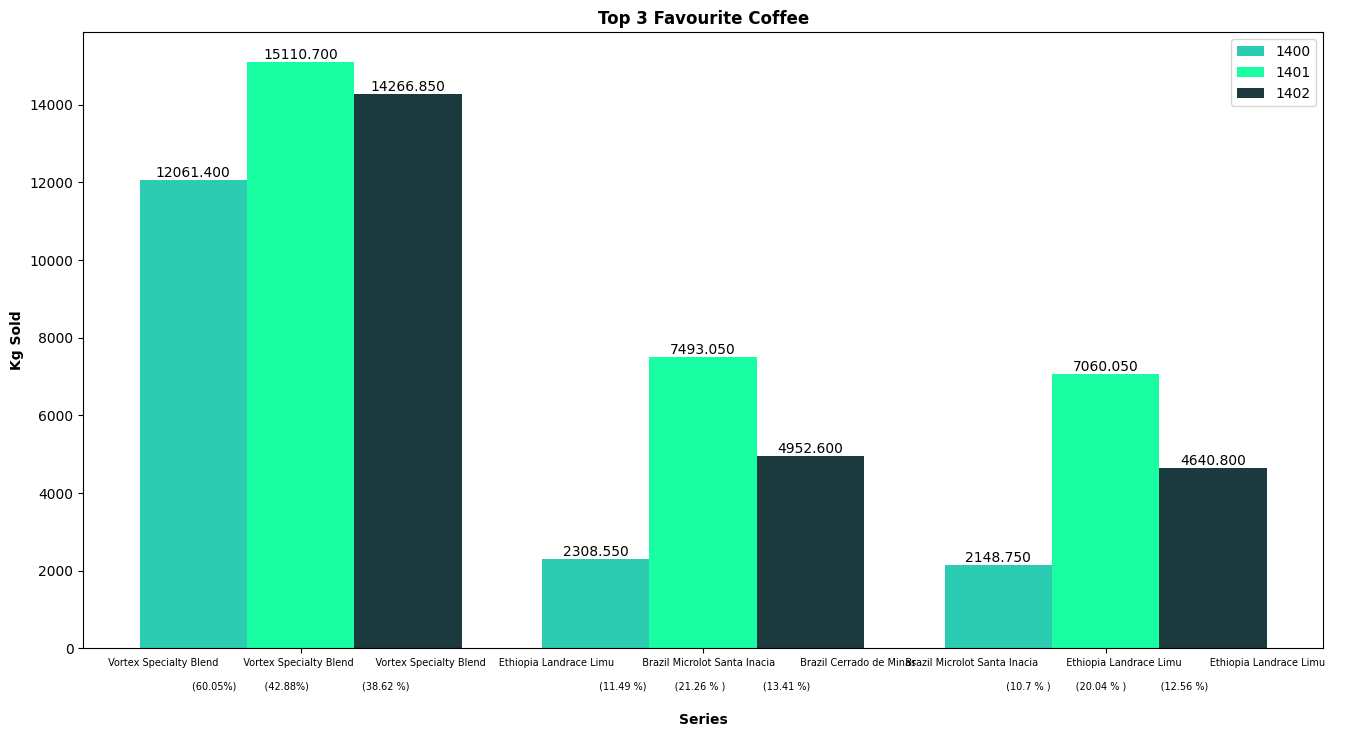

In [6]:

import re
def favourite(sale):
    coffee_df = sale
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    for i in range(len(coffee_df)):
    # renaming goods (delete their Gram or KG part of the name)
        coffee_df.loc[i,"كالا/خدمت"] = re.sub(r'[^a-zA-Z\s]', '',coffee_df.loc[i,"كالا/خدمت"]  )
        coffee_df.loc[i,"كالا/خدمت"] =  coffee_df.loc[i,"كالا/خدمت"].replace("kg", "").replace("gr", "")

    coffee_series_dict = coffee_df["كالا/خدمت"].value_counts().to_dict()
    series_dict = {}
    for i in coffee_series_dict.keys():
        series_df = coffee_df[coffee_df["كالا/خدمت"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        series_dict[i] = {"kg" : kg, "Total_Sale": bought}

    # Finding Top 3 Coffee based on their total sale
    top_3_coffee = sorted(series_dict, key=lambda k: series_dict[k]['kg'], reverse=True)[:]
    first_coffee = top_3_coffee[0]
    first_TR = series_dict[first_coffee]["Total_Sale"]
    first_kg = series_dict[first_coffee]["kg"]

    second_coffee = top_3_coffee[1]
    second_TR = series_dict[second_coffee]["Total_Sale"]
    second_kg = series_dict[second_coffee]["kg"]

    third_coffee = top_3_coffee[2]
    third_TR = series_dict[third_coffee]["Total_Sale"]
    third_kg = series_dict[third_coffee]["kg"]



    print("our top three coffee based on their sales are: \n")
    print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")

    return {"first_favourite_coffee":first_coffee, "first_favourite_coffee_tr":first_TR, "first_favourite_coffee_tr_percent": round((first_TR/total_sale)*100,2),
            "first_favourite_coffee_kg": first_kg, "first_favourite_coffee_kg_percent": round((first_kg/total_kg_sale)*100,2),
            "second_favourite_coffee":second_coffee, "second_favourite_coffee_tr":second_TR, "second_favourite_coffee_tr_percent": round((second_TR/total_sale)*100,2),
            "second_favourite_coffee_kg": second_kg, "second_favourite_coffee_kg_percent": round((second_kg/total_kg_sale)*100,2),
            "third_favourite_coffee":third_coffee, "third_favourite_coffee_tr":third_TR, "third_favourite_coffee_tr_percent": round((third_TR/total_sale)*100,2),
            "third_favourite_coffee_kg": third_kg, "third_favourite_coffee_kg_percent": round((third_kg/total_kg_sale)*100,2), "total_sale_kg": total_kg_sale}

sale_1400_dict = favourite(sale_1400)
sale_1401_dict = favourite(sale_1401)
sale_1402_dict = favourite(sale_1402)

first_favourite_coffee_1400 = sale_1400_dict["first_favourite_coffee"]
first_favourite_coffee_1401 = sale_1401_dict["first_favourite_coffee"]
first_favourite_coffee_1402 = sale_1402_dict["first_favourite_coffee"]

first_favourite_coffee_tr_1400 = sale_1400_dict["first_favourite_coffee_tr"]
first_favourite_coffee_tr_1401 = sale_1401_dict["first_favourite_coffee_tr"]
first_favourite_coffee_tr_1402 = sale_1402_dict["first_favourite_coffee_tr"]

first_favourite_coffee_tr_percent_1400 = sale_1400_dict["first_favourite_coffee_tr_percent"]
first_favourite_coffee_tr_percent_1401 = sale_1401_dict["first_favourite_coffee_tr_percent"]
first_favourite_coffee_tr_percent_1402 = sale_1402_dict["first_favourite_coffee_tr_percent"]

first_favourite_coffee_kg_1400 = sale_1400_dict["first_favourite_coffee_kg"]
first_favourite_coffee_kg_1401 = sale_1401_dict["first_favourite_coffee_kg"]
first_favourite_coffee_kg_1402 = sale_1402_dict["first_favourite_coffee_kg"]

first_favourite_coffee_kg_percent_1400 = sale_1400_dict["first_favourite_coffee_kg_percent"]
first_favourite_coffee_kg_percent_1401 = sale_1401_dict["first_favourite_coffee_kg_percent"]
first_favourite_coffee_kg_percent_1402 = sale_1402_dict["first_favourite_coffee_kg_percent"]

second_favourite_coffee_1400 = sale_1400_dict["second_favourite_coffee"]
second_favourite_coffee_1401 = sale_1401_dict["second_favourite_coffee"]
second_favourite_coffee_1402 = sale_1402_dict["second_favourite_coffee"]

second_favourite_coffee_tr_1400 = sale_1400_dict["second_favourite_coffee_tr"]
second_favourite_coffee_tr_1401 = sale_1401_dict["second_favourite_coffee_tr"]
second_favourite_coffee_tr_1402 = sale_1402_dict["second_favourite_coffee_tr"]


second_favourite_coffee_tr_percent_1400 = sale_1400_dict["second_favourite_coffee_tr_percent"]
second_favourite_coffee_tr_percent_1401 = sale_1401_dict["second_favourite_coffee_tr_percent"]
second_favourite_coffee_tr_percent_1402 = sale_1402_dict["second_favourite_coffee_tr_percent"]

second_favourite_coffee_kg_1400 = sale_1400_dict["second_favourite_coffee_kg"]
second_favourite_coffee_kg_1401 = sale_1401_dict["second_favourite_coffee_kg"]
second_favourite_coffee_kg_1402 = sale_1402_dict["second_favourite_coffee_kg"]

second_favourite_coffee_kg_percent_1400 = sale_1400_dict["second_favourite_coffee_kg_percent"]
second_favourite_coffee_kg_percent_1401 = sale_1401_dict["second_favourite_coffee_kg_percent"]
second_favourite_coffee_kg_percent_1402 = sale_1402_dict["second_favourite_coffee_kg_percent"]

third_favourite_coffee_1400 = sale_1400_dict["third_favourite_coffee"]
third_favourite_coffee_1401 = sale_1401_dict["third_favourite_coffee"]
third_favourite_coffee_1402 = sale_1402_dict["third_favourite_coffee"]

third_favourite_coffee_tr_1400 = sale_1400_dict["third_favourite_coffee_tr"]
third_favourite_coffee_tr_1401 = sale_1401_dict["third_favourite_coffee_tr"]
third_favourite_coffee_tr_1402 = sale_1402_dict["third_favourite_coffee_tr"]

third_favourite_coffee_tr_percent_1400 = sale_1400_dict["third_favourite_coffee_tr_percent"]
third_favourite_coffee_tr_percent_1401 = sale_1401_dict["third_favourite_coffee_tr_percent"]
third_favourite_coffee_tr_percent_1402 = sale_1402_dict["third_favourite_coffee_tr_percent"]

third_favourite_coffee_kg_1400 = sale_1400_dict["third_favourite_coffee_kg"]
third_favourite_coffee_kg_1401 = sale_1401_dict["third_favourite_coffee_kg"]
third_favourite_coffee_kg_1402 = sale_1402_dict["third_favourite_coffee_kg"]

third_favourite_coffee_kg_percent_1400 = sale_1400_dict["third_favourite_coffee_kg_percent"]
third_favourite_coffee_kg_percent_1401 = sale_1401_dict["third_favourite_coffee_kg_percent"]
third_favourite_coffee_kg_percent_1402 = sale_1402_dict["third_favourite_coffee_kg_percent"]

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_favourite_coffee_1400, second_favourite_coffee_1400, third_favourite_coffee_tr_1400]
# values_1 = [first_favourite_coffee_tr_1400, first_favourite_coffee_tr_1401, first_favourite_coffee_tr_1402]  
# values_2 = [second_favourite_coffee_tr_1400, second_favourite_coffee_tr_1401, second_favourite_coffee_tr_1402]  # Values for the second thing over 3 years
# values_3 = [third_favourite_coffee_tr_1400, third_favourite_coffee_tr_1401, third_favourite_coffee_tr_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Rial')
# plt.title('Top 3 Coffee Sale(Rial)')
# plt.xticks(index + bar_width, years)
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis tick labels with thousand separators
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_favourite_coffee_1400, second_favourite_coffee_1400, third_favourite_coffee_tr_1400]
# values_1 = [first_favourite_coffee_tr_percent_1400, first_favourite_coffee_tr_percent_1401, first_favourite_coffee_tr_percent_1402]  
# values_2 = [second_favourite_coffee_tr_percent_1400, second_favourite_coffee_tr_percent_1401, second_favourite_coffee_tr_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_favourite_coffee_tr_percent_1400, third_favourite_coffee_tr_percent_1401, third_favourite_coffee_tr_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 Coffee Sale(Rial) %')
# plt.xticks(index + bar_width, years)
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis tick labels with thousand separators
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------


# # Data
# years = ['1400', '1401', '1402']
# categories = [first_favourite_coffee_1400, second_favourite_coffee_1400, third_favourite_coffee_tr_1400]
# values_1 = [first_favourite_coffee_kg_1400, first_favourite_coffee_kg_1401, first_favourite_coffee_kg_1402]  
# values_2 = [second_favourite_coffee_kg_1400, second_favourite_coffee_kg_1401, second_favourite_coffee_kg_1402]  # Values for the second thing over 3 years
# values_3 = [third_favourite_coffee_kg_1400, third_favourite_coffee_kg_1401, third_favourite_coffee_kg_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('KG')
# plt.title('Top 3 Coffee Sale(KG)')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()
# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_favourite_coffee_1400, second_favourite_coffee_1400, third_favourite_coffee_tr_1400]
# values_1 = [first_favourite_coffee_kg_percent_1400, first_favourite_coffee_kg_percent_1401, first_favourite_coffee_kg_percent_1402]  
# values_2 = [second_favourite_coffee_kg_percent_1400, second_favourite_coffee_kg_percent_1401, second_favourite_coffee_kg_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_favourite_coffee_kg_percent_1400, third_favourite_coffee_kg_percent_1401, third_favourite_coffee_kg_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 Coffee Sale(KG) %')
# plt.xticks(index + bar_width, years)
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis tick labels with thousand separators
# plt.legend()

# # Display the plot
# plt.show()


top_1400 = [first_favourite_coffee_kg_1400 , second_favourite_coffee_kg_1400, third_favourite_coffee_kg_1400]
top_1401 = [first_favourite_coffee_kg_1401 , second_favourite_coffee_kg_1401, third_favourite_coffee_kg_1401]
top_1402 = [first_favourite_coffee_kg_1402 , second_favourite_coffee_kg_1402, third_favourite_coffee_kg_1402]

group = [f"{first_favourite_coffee_1400}    {first_favourite_coffee_1401}   {first_favourite_coffee_1402}\n\n({first_favourite_coffee_kg_percent_1400 }%)         ({first_favourite_coffee_kg_percent_1401}%)                 ({first_favourite_coffee_kg_percent_1402} %)",
          f"     {second_favourite_coffee_1400}    {second_favourite_coffee_1401}   {second_favourite_coffee_1402}\n\n ({second_favourite_coffee_kg_percent_1400} %)         ({second_favourite_coffee_kg_percent_1401} % )            ({second_favourite_coffee_kg_percent_1402} %)",
            f"        {third_favourite_coffee_1400}     {third_favourite_coffee_1401}     {third_favourite_coffee_1402} \n\n ({third_favourite_coffee_kg_percent_1400} % )        ({third_favourite_coffee_kg_percent_1401} % )           ({third_favourite_coffee_kg_percent_1402} %)"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def bar_group(classes, values, width=0.8):

    plt.figure(figsize=(16,8))
    plt.xlabel('\nSeries', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Top 3 Favourite Coffee",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.3f}', ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=7)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [top_1400, top_1401, top_1402])

plt.show()

#------------------------------------------------------------------------------------------------------------------------

## Favorite Line A Series

our top three A Series coffee based on their sales are: 

1st:   Colombia Castillo San Judas    --> 965,051,343 Rial (1.1% of Total Sale) With 98.7 KG of Sold (0.49% of Total)  
2nd:  Colombia Castillo Buena Vista    --> 831,803,021 Rial (0.95% of Total Sale) With 90.15 KG of Sold (0.45% of Total)  
3rd:   Colombia Caturra Guava Banana    --> 541,620,000 Rial (0.62% of Total Sale) With 31.95 KG of Sold (0.16% of Total)  
our top three A Series coffee based on their sales are: 

1st:  Ethiopia Bombe    --> 3,674,286,841 Rial (1.65% of Total Sale) With 230.16 KG of Sold (0.65% of Total)  
2nd:   Costa Rica H Volcan Azul    --> 1,752,749,000 Rial (0.79% of Total Sale) With 125.4 KG of Sold (0.36% of Total)  
3rd:  Kenya Kiganjo    --> 2,004,762,500 Rial (0.9% of Total Sale) With 104.85 KG of Sold (0.3% of Total)  
our top three A Series coffee based on their sales are: 

1st:  Rwanda Red Bourbon Fuji    --> 4,758,855,226 Rial (1.13% of Total Sale) With 239.26 KG of Sold (0.65% of Total)  

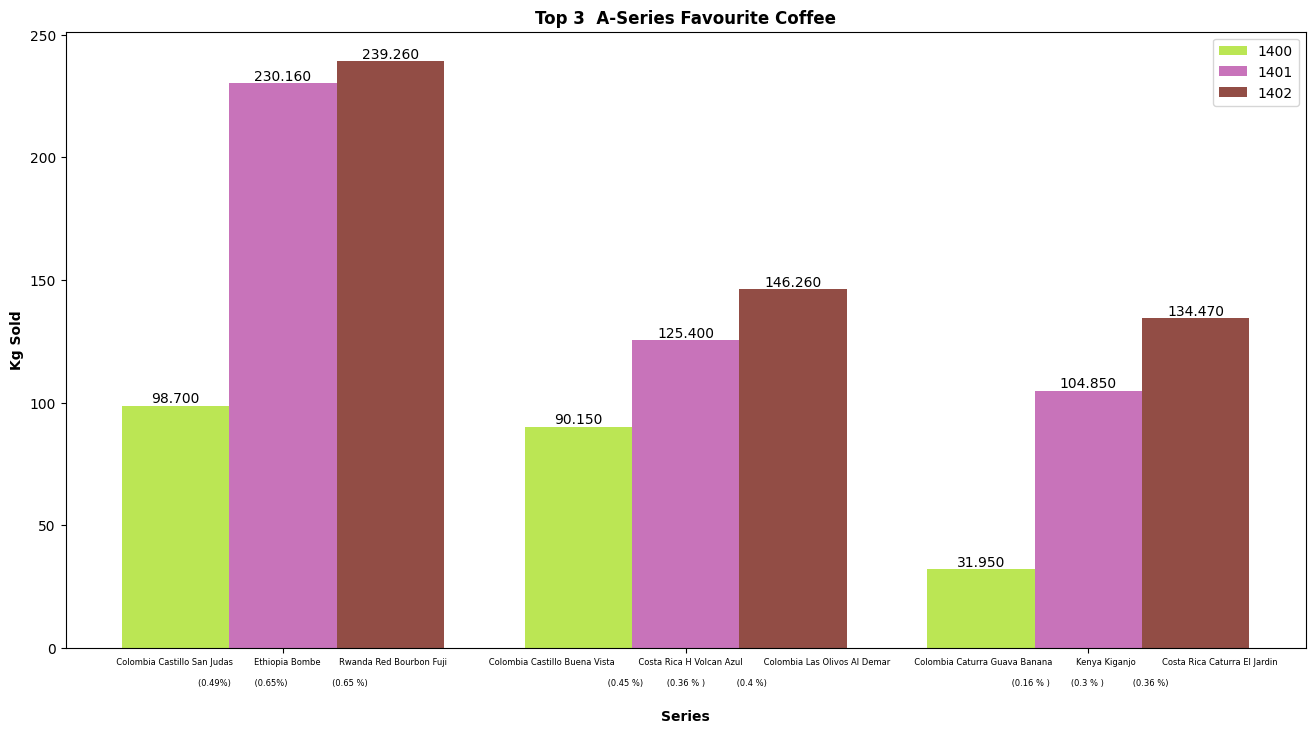

In [33]:
def favourite_a(sale) :
    coffee_df = sale
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
   # Favourite Line in each Series
    a_series_df = coffee_df[coffee_df["گروه فروش"] == "A Series"]
    a_series_dict = a_series_df["كالا/خدمت"].value_counts().to_dict()
    a_series_data_dict = {}
    for i in a_series_dict.keys():
        series_df = a_series_df[a_series_df["كالا/خدمت"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        a_series_data_dict[i] = {"kg" : kg, "Total_Sale": bought}

    # Finding Top 3 Coffee based on their total sale
    top_3_coffee = sorted(a_series_data_dict, key=lambda k: a_series_data_dict[k]['kg'], reverse=True)[:]
    first_coffee = top_3_coffee[0]
    first_TR = a_series_data_dict[first_coffee]["Total_Sale"]
    first_kg = a_series_data_dict[first_coffee]["kg"]
    second_coffee = top_3_coffee[1]
    second_TR = a_series_data_dict[second_coffee]["Total_Sale"]
    second_kg = a_series_data_dict[second_coffee]["kg"]
    third_coffee = top_3_coffee[2]
    third_TR = a_series_data_dict[third_coffee]["Total_Sale"]
    third_kg = a_series_data_dict[third_coffee]["kg"]


    print("our top three A Series coffee based on their sales are: \n")
    print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")

    return {"first_a_favourite_coffee":first_coffee, "first_a_favourite_coffee_tr":first_TR, "first_a_favourite_coffee_tr_percent": round((first_TR/total_sale)*100,2),
        "first_a_favourite_coffee_kg": first_kg, "first_a_favourite_coffee_kg_percent": round((first_kg/total_kg_sale)*100,2),
        "second_a_favourite_coffee":second_coffee, "second_a_favourite_coffee_tr":second_TR, "second_a_favourite_coffee_tr_percent": round((second_TR/total_sale)*100,2),
        "second_a_favourite_coffee_kg": second_kg, "second_a_favourite_coffee_kg_percent": round((second_kg/total_kg_sale)*100,2),
        "third_a_favourite_coffee":third_coffee, "third_a_favourite_coffee_tr":third_TR, "third_a_favourite_coffee_tr_percent": round((third_TR/total_sale)*100,2),
        "third_a_favourite_coffee_kg": third_kg, "third_a_favourite_coffee_kg_percent": round((third_kg/total_kg_sale)*100,2)}


sale_1400_dict = favourite_a(sale_1400)
sale_1401_dict = favourite_a(sale_1401)
sale_1402_dict = favourite_a(sale_1402)

first_a_favourite_coffee_1400 = sale_1400_dict["first_a_favourite_coffee"]
first_a_favourite_coffee_1401 = sale_1401_dict["first_a_favourite_coffee"]
first_a_favourite_coffee_1402 = sale_1402_dict["first_a_favourite_coffee"]

first_a_favourite_coffee_tr_1400 = sale_1400_dict["first_a_favourite_coffee_tr"]
first_a_favourite_coffee_tr_1401 = sale_1401_dict["first_a_favourite_coffee_tr"]
first_a_favourite_coffee_tr_1402 = sale_1402_dict["first_a_favourite_coffee_tr"]

first_a_favourite_coffee_tr_percent_1400 = sale_1400_dict["first_a_favourite_coffee_tr_percent"]
first_a_favourite_coffee_tr_percent_1401 = sale_1401_dict["first_a_favourite_coffee_tr_percent"]
first_a_favourite_coffee_tr_percent_1402 = sale_1402_dict["first_a_favourite_coffee_tr_percent"]

first_a_favourite_coffee_kg_1400 = sale_1400_dict["first_a_favourite_coffee_kg"]
first_a_favourite_coffee_kg_1401 = sale_1401_dict["first_a_favourite_coffee_kg"]
first_a_favourite_coffee_kg_1402 = sale_1402_dict["first_a_favourite_coffee_kg"]

first_a_favourite_coffee_kg_percent_1400 = sale_1400_dict["first_a_favourite_coffee_kg_percent"]
first_a_favourite_coffee_kg_percent_1401 = sale_1401_dict["first_a_favourite_coffee_kg_percent"]
first_a_favourite_coffee_kg_percent_1402 = sale_1402_dict["first_a_favourite_coffee_kg_percent"]

second_a_favourite_coffee_1400 = sale_1400_dict["second_a_favourite_coffee"]
second_a_favourite_coffee_1401 = sale_1401_dict["second_a_favourite_coffee"]
second_a_favourite_coffee_1402 = sale_1402_dict["second_a_favourite_coffee"]

second_a_favourite_coffee_tr_1400 = sale_1400_dict["second_a_favourite_coffee_tr"]
second_a_favourite_coffee_tr_1401 = sale_1401_dict["second_a_favourite_coffee_tr"]
second_a_favourite_coffee_tr_1402 = sale_1402_dict["second_a_favourite_coffee_tr"]


second_a_favourite_coffee_tr_percent_1400 = sale_1400_dict["second_a_favourite_coffee_tr_percent"]
second_a_favourite_coffee_tr_percent_1401 = sale_1401_dict["second_a_favourite_coffee_tr_percent"]
second_a_favourite_coffee_tr_percent_1402 = sale_1402_dict["second_a_favourite_coffee_tr_percent"]

second_a_favourite_coffee_kg_1400 = sale_1400_dict["second_a_favourite_coffee_kg"]
second_a_favourite_coffee_kg_1401 = sale_1401_dict["second_a_favourite_coffee_kg"]
second_a_favourite_coffee_kg_1402 = sale_1402_dict["second_a_favourite_coffee_kg"]

second_a_favourite_coffee_kg_percent_1400 = sale_1400_dict["second_a_favourite_coffee_kg_percent"]
second_a_favourite_coffee_kg_percent_1401 = sale_1401_dict["second_a_favourite_coffee_kg_percent"]
second_a_favourite_coffee_kg_percent_1402 = sale_1402_dict["second_a_favourite_coffee_kg_percent"]

third_a_favourite_coffee_1400 = sale_1400_dict["third_a_favourite_coffee"]
third_a_favourite_coffee_1401 = sale_1401_dict["third_a_favourite_coffee"]
third_a_favourite_coffee_1402 = sale_1402_dict["third_a_favourite_coffee"]

third_a_favourite_coffee_tr_1400 = sale_1400_dict["third_a_favourite_coffee_tr"]
third_a_favourite_coffee_tr_1401 = sale_1401_dict["third_a_favourite_coffee_tr"]
third_a_favourite_coffee_tr_1402 = sale_1402_dict["third_a_favourite_coffee_tr"]

third_a_favourite_coffee_tr_percent_1400 = sale_1400_dict["third_a_favourite_coffee_tr_percent"]
third_a_favourite_coffee_tr_percent_1401 = sale_1401_dict["third_a_favourite_coffee_tr_percent"]
third_a_favourite_coffee_tr_percent_1402 = sale_1402_dict["third_a_favourite_coffee_tr_percent"]

third_a_favourite_coffee_kg_1400 = sale_1400_dict["third_a_favourite_coffee_kg"]
third_a_favourite_coffee_kg_1401 = sale_1401_dict["third_a_favourite_coffee_kg"]
third_a_favourite_coffee_kg_1402 = sale_1402_dict["third_a_favourite_coffee_kg"]

third_a_favourite_coffee_kg_percent_1400 = sale_1400_dict["third_a_favourite_coffee_kg_percent"]
third_a_favourite_coffee_kg_percent_1401 = sale_1401_dict["third_a_favourite_coffee_kg_percent"]
third_a_favourite_coffee_kg_percent_1402 = sale_1402_dict["third_a_favourite_coffee_kg_percent"]



# # Data
# years = ['1400', '1401', '1402']
# categories = [first_a_favourite_coffee_1400, second_a_favourite_coffee_1400, third_a_favourite_coffee_tr_1400]
# values_1 = [first_a_favourite_coffee_tr_1400, first_a_favourite_coffee_tr_1401, first_a_favourite_coffee_tr_1402]  
# values_2 = [second_a_favourite_coffee_tr_1400, second_a_favourite_coffee_tr_1401, second_a_favourite_coffee_tr_1402]  # Values for the second thing over 3 years
# values_3 = [third_a_favourite_coffee_tr_1400, third_a_favourite_coffee_tr_1401, third_a_favourite_coffee_tr_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Rial')
# plt.title('Top 3 A Series Coffee Sale(Rial)')
# plt.xticks(index + bar_width, years)
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis tick labels with thousand separators
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_a_favourite_coffee_1400, second_a_favourite_coffee_1400, third_a_favourite_coffee_tr_1400]
# values_1 = [first_a_favourite_coffee_tr_percent_1400, first_a_favourite_coffee_tr_percent_1401, first_a_favourite_coffee_tr_percent_1402]  
# values_2 = [second_a_favourite_coffee_tr_percent_1400, second_a_favourite_coffee_tr_percent_1401, second_a_favourite_coffee_tr_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_a_favourite_coffee_tr_percent_1400, third_a_favourite_coffee_tr_percent_1401, third_a_favourite_coffee_tr_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 A Series Coffee Sale(Rial) %')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------


# # Data
# years = ['1400', '1401', '1402']
# categories = [first_a_favourite_coffee_1400, second_a_favourite_coffee_1400, third_a_favourite_coffee_tr_1400]
# values_1 = [first_a_favourite_coffee_kg_1400, first_a_favourite_coffee_kg_1401, first_a_favourite_coffee_kg_1402]  
# values_2 = [second_a_favourite_coffee_kg_1400, second_a_favourite_coffee_kg_1401, second_a_favourite_coffee_kg_1402]  # Values for the second thing over 3 years
# values_3 = [third_a_favourite_coffee_kg_1400, third_a_favourite_coffee_kg_1401, third_a_favourite_coffee_kg_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('KG')
# plt.title('Top 3 A Series Coffee Sale(KG)')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()
# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_a_favourite_coffee_1400, second_a_favourite_coffee_1400, third_a_favourite_coffee_tr_1400]
# values_1 = [first_a_favourite_coffee_kg_percent_1400, first_a_favourite_coffee_kg_percent_1401, first_a_favourite_coffee_kg_percent_1402]  
# values_2 = [second_a_favourite_coffee_kg_percent_1400, second_a_favourite_coffee_kg_percent_1401, second_a_favourite_coffee_kg_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_a_favourite_coffee_kg_percent_1400, third_a_favourite_coffee_kg_percent_1401, third_a_favourite_coffee_kg_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 A Series Coffee Sale(KG) %')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()

#------------------------------------------------------------------------------------------------------------------------


top_1400 = [first_a_favourite_coffee_kg_1400 , second_a_favourite_coffee_kg_1400, third_a_favourite_coffee_kg_1400]
top_1401 = [first_a_favourite_coffee_kg_1401 , second_a_favourite_coffee_kg_1401, third_a_favourite_coffee_kg_1401]
top_1402 = [first_a_favourite_coffee_kg_1402 , second_a_favourite_coffee_kg_1402, third_a_favourite_coffee_kg_1402]

group = [f"{first_a_favourite_coffee_1400}    {first_a_favourite_coffee_1401}   {first_a_favourite_coffee_1402}\n\n({first_a_favourite_coffee_kg_percent_1400 }%)         ({first_a_favourite_coffee_kg_percent_1401}%)                 ({first_a_favourite_coffee_kg_percent_1402} %)",
          f"     {second_a_favourite_coffee_1400}    {second_a_favourite_coffee_1401}   {second_a_favourite_coffee_1402}\n\n ({second_a_favourite_coffee_kg_percent_1400} %)         ({second_a_favourite_coffee_kg_percent_1401} % )            ({second_a_favourite_coffee_kg_percent_1402} %)",
            f"        {third_a_favourite_coffee_1400}     {third_a_favourite_coffee_1401}     {third_a_favourite_coffee_1402} \n\n ({third_a_favourite_coffee_kg_percent_1400} % )        ({third_a_favourite_coffee_kg_percent_1401} % )           ({third_a_favourite_coffee_kg_percent_1402} %)"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def bar_group(classes, values, width=0.8):

    plt.figure(figsize=(16,8))
    plt.xlabel('\nSeries', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Top 3  A-Series Favourite Coffee",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.3f}', ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=6)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [top_1400, top_1401, top_1402])

plt.show()


## Favorite Line X Series

our top three X Series coffee based on their sales are: 

1st:  Colombia Pacamara Giant    --> 277,200,000 Rial (0.32% of Total Sale) With 8.57 KG of Sold (0.04% of Total)  
2nd:  Colombia Gesha Marcela    --> 335,475,000 Rial (0.38% of Total Sale) With 6.74 KG of Sold (0.03% of Total)  
3rd:  Colombia Gesha Marcela --> 192,000,000 Rial (0.22% of Total Sale) With 4.0 KG of Sold (0.02% of Total)  
our top three X Series coffee based on their sales are: 

1st:  Colombia Pacamara Giant    --> 551,677,366 Rial (0.25% of Total Sale) With 16.07 KG of Sold (0.05% of Total)  
2nd:  Panama Geisha Parabolic    --> 886,000,107 Rial (0.4% of Total Sale) With 15.46 KG of Sold (0.04% of Total)  
3rd:  Colombia Gesha Marcela    --> 46,541,049 Rial (0.02% of Total Sale) With 0.94 KG of Sold (0.0% of Total)  
our top three X Series coffee based on their sales are: 

1st:   Panama Drima Zede    --> 763,498,128 Rial (0.18% of Total Sale) With 15.24 KG of Sold (0.04% of Total)  
2nd:  Colombia Geisha Gran

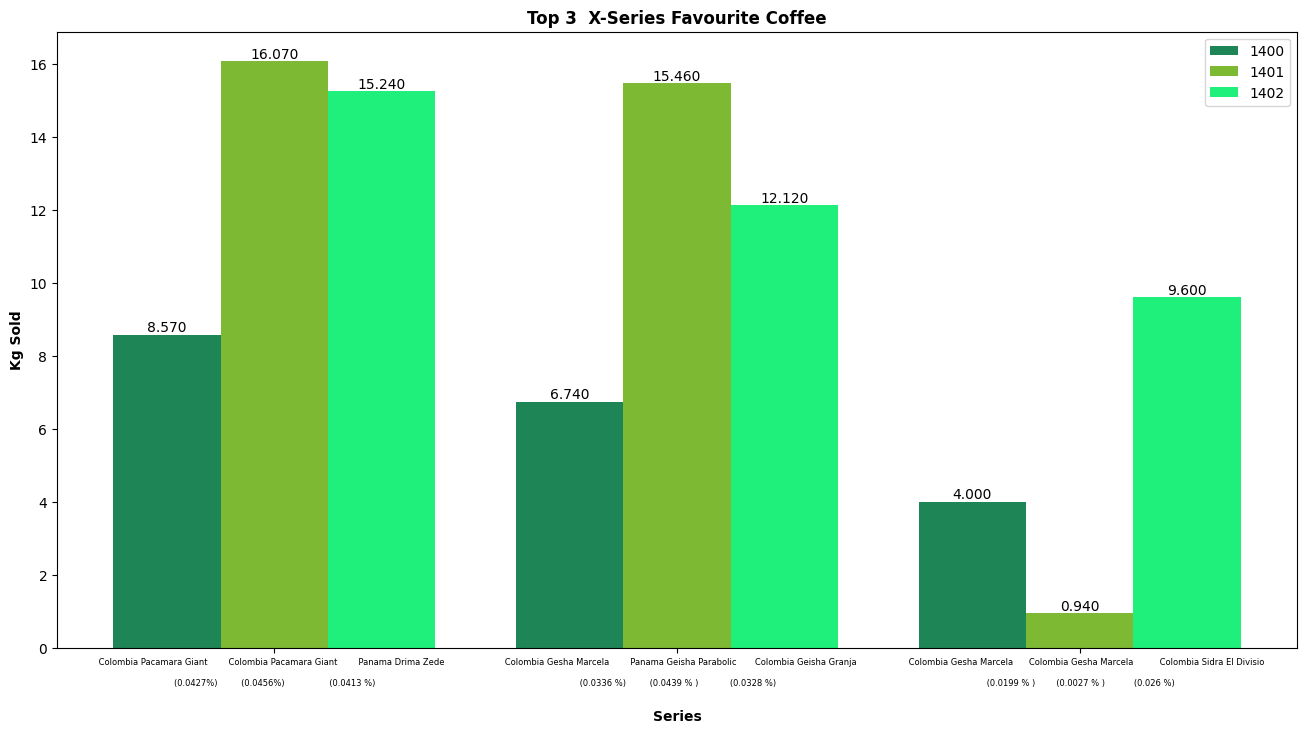

In [34]:
def favourite_x(sale):  
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
# Favourite Line in each Series
    x_series_df = sale[sale["گروه فروش"] == "X Series"]
    x_series_dict = x_series_df["كالا/خدمت"].value_counts().to_dict()
    x_series_data_dict = {}
    for i in x_series_dict.keys():
        series_df = x_series_df[x_series_df["كالا/خدمت"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        x_series_data_dict[i] = {"kg" : kg, "Total_Sale": bought}

    # Finding Top 3 Coffee based on their total sale
    top_3_coffee = sorted(x_series_data_dict, key=lambda k: x_series_data_dict[k]['kg'], reverse=True)[:]
    first_coffee = top_3_coffee[0]
    first_TR = x_series_data_dict[first_coffee]["Total_Sale"]
    first_kg = x_series_data_dict[first_coffee]["kg"]
    second_coffee = top_3_coffee[1]
    second_TR = x_series_data_dict[second_coffee]["Total_Sale"]
    second_kg = x_series_data_dict[second_coffee]["kg"]
    third_coffee = top_3_coffee[2]
    third_TR = x_series_data_dict[third_coffee]["Total_Sale"]
    third_kg = x_series_data_dict[third_coffee]["kg"]


    print("our top three X Series coffee based on their sales are: \n")
    print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")

    return {"first_x_favourite_coffee":first_coffee, "first_x_favourite_coffee_tr":first_TR, "first_x_favourite_coffee_tr_percent": round((first_TR/total_sale)*100,4),
    "first_x_favourite_coffee_kg": first_kg, "first_x_favourite_coffee_kg_percent": round((first_kg/total_kg_sale)*100,4),
    "second_x_favourite_coffee":second_coffee, "second_x_favourite_coffee_tr":second_TR, "second_x_favourite_coffee_tr_percent": round((second_TR/total_sale)*100,4),
    "second_x_favourite_coffee_kg": second_kg, "second_x_favourite_coffee_kg_percent": round((second_kg/total_kg_sale)*100,4),
    "third_x_favourite_coffee":third_coffee, "third_x_favourite_coffee_tr":third_TR, "third_x_favourite_coffee_tr_percent": round((third_TR/total_sale)*100,4),
    "third_x_favourite_coffee_kg": third_kg, "third_x_favourite_coffee_kg_percent": round((third_kg/total_kg_sale)*100,4)}

sale_1400_dict = favourite_x(sale_1400)
sale_1401_dict = favourite_x(sale_1401)
sale_1402_dict = favourite_x(sale_1402)

first_x_favourite_coffee_1400 = sale_1400_dict["first_x_favourite_coffee"]
first_x_favourite_coffee_1401 = sale_1401_dict["first_x_favourite_coffee"]
first_x_favourite_coffee_1402 = sale_1402_dict["first_x_favourite_coffee"]

first_x_favourite_coffee_tr_1400 = sale_1400_dict["first_x_favourite_coffee_tr"]
first_x_favourite_coffee_tr_1401 = sale_1401_dict["first_x_favourite_coffee_tr"]
first_x_favourite_coffee_tr_1402 = sale_1402_dict["first_x_favourite_coffee_tr"]

first_x_favourite_coffee_tr_percent_1400 = sale_1400_dict["first_x_favourite_coffee_tr_percent"]
first_x_favourite_coffee_tr_percent_1401 = sale_1401_dict["first_x_favourite_coffee_tr_percent"]
first_x_favourite_coffee_tr_percent_1402 = sale_1402_dict["first_x_favourite_coffee_tr_percent"]

first_x_favourite_coffee_kg_1400 = sale_1400_dict["first_x_favourite_coffee_kg"]
first_x_favourite_coffee_kg_1401 = sale_1401_dict["first_x_favourite_coffee_kg"]
first_x_favourite_coffee_kg_1402 = sale_1402_dict["first_x_favourite_coffee_kg"]

first_x_favourite_coffee_kg_percent_1400 = sale_1400_dict["first_x_favourite_coffee_kg_percent"]
first_x_favourite_coffee_kg_percent_1401 = sale_1401_dict["first_x_favourite_coffee_kg_percent"]
first_x_favourite_coffee_kg_percent_1402 = sale_1402_dict["first_x_favourite_coffee_kg_percent"]

second_x_favourite_coffee_1400 = sale_1400_dict["second_x_favourite_coffee"]
second_x_favourite_coffee_1401 = sale_1401_dict["second_x_favourite_coffee"]
second_x_favourite_coffee_1402 = sale_1402_dict["second_x_favourite_coffee"]

second_x_favourite_coffee_tr_1400 = sale_1400_dict["second_x_favourite_coffee_tr"]
second_x_favourite_coffee_tr_1401 = sale_1401_dict["second_x_favourite_coffee_tr"]
second_x_favourite_coffee_tr_1402 = sale_1402_dict["second_x_favourite_coffee_tr"]


second_x_favourite_coffee_tr_percent_1400 = sale_1400_dict["second_x_favourite_coffee_tr_percent"]
second_x_favourite_coffee_tr_percent_1401 = sale_1401_dict["second_x_favourite_coffee_tr_percent"]
second_x_favourite_coffee_tr_percent_1402 = sale_1402_dict["second_x_favourite_coffee_tr_percent"]

second_x_favourite_coffee_kg_1400 = sale_1400_dict["second_x_favourite_coffee_kg"]
second_x_favourite_coffee_kg_1401 = sale_1401_dict["second_x_favourite_coffee_kg"]
second_x_favourite_coffee_kg_1402 = sale_1402_dict["second_x_favourite_coffee_kg"]

second_x_favourite_coffee_kg_percent_1400 = sale_1400_dict["second_x_favourite_coffee_kg_percent"]
second_x_favourite_coffee_kg_percent_1401 = sale_1401_dict["second_x_favourite_coffee_kg_percent"]
second_x_favourite_coffee_kg_percent_1402 = sale_1402_dict["second_x_favourite_coffee_kg_percent"]

third_x_favourite_coffee_1400 = sale_1400_dict["third_x_favourite_coffee"]
third_x_favourite_coffee_1401 = sale_1401_dict["third_x_favourite_coffee"]
third_x_favourite_coffee_1402 = sale_1402_dict["third_x_favourite_coffee"]

third_x_favourite_coffee_tr_1400 = sale_1400_dict["third_x_favourite_coffee_tr"]
third_x_favourite_coffee_tr_1401 = sale_1401_dict["third_x_favourite_coffee_tr"]
third_x_favourite_coffee_tr_1402 = sale_1402_dict["third_x_favourite_coffee_tr"]

third_x_favourite_coffee_tr_percent_1400 = sale_1400_dict["third_x_favourite_coffee_tr_percent"]
third_x_favourite_coffee_tr_percent_1401 = sale_1401_dict["third_x_favourite_coffee_tr_percent"]
third_x_favourite_coffee_tr_percent_1402 = sale_1402_dict["third_x_favourite_coffee_tr_percent"]

third_x_favourite_coffee_kg_1400 = sale_1400_dict["third_x_favourite_coffee_kg"]
third_x_favourite_coffee_kg_1401 = sale_1401_dict["third_x_favourite_coffee_kg"]
third_x_favourite_coffee_kg_1402 = sale_1402_dict["third_x_favourite_coffee_kg"]

third_x_favourite_coffee_kg_percent_1400 = sale_1400_dict["third_x_favourite_coffee_kg_percent"]
third_x_favourite_coffee_kg_percent_1401 = sale_1401_dict["third_x_favourite_coffee_kg_percent"]
third_x_favourite_coffee_kg_percent_1402 = sale_1402_dict["third_x_favourite_coffee_kg_percent"]

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_x_favourite_coffee_1400, second_x_favourite_coffee_1400, third_x_favourite_coffee_tr_1400]
# values_1 = [first_x_favourite_coffee_tr_1400, first_x_favourite_coffee_tr_1401, first_x_favourite_coffee_tr_1402]  
# values_2 = [second_x_favourite_coffee_tr_1400, second_x_favourite_coffee_tr_1401, second_x_favourite_coffee_tr_1402]  # Values for the second thing over 3 years
# values_3 = [third_x_favourite_coffee_tr_1400, third_x_favourite_coffee_tr_1401, third_x_favourite_coffee_tr_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Rial')
# plt.title('Top 3 X Series Coffee Sale(Rial)')
# plt.xticks(index + bar_width, years)
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis tick labels with thousand separators
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_x_favourite_coffee_1400, second_x_favourite_coffee_1400, third_x_favourite_coffee_tr_1400]
# values_1 = [first_x_favourite_coffee_tr_percent_1400, first_x_favourite_coffee_tr_percent_1401, first_x_favourite_coffee_tr_percent_1402]  
# values_2 = [second_x_favourite_coffee_tr_percent_1400, second_x_favourite_coffee_tr_percent_1401, second_x_favourite_coffee_tr_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_x_favourite_coffee_tr_percent_1400, third_x_favourite_coffee_tr_percent_1401, third_x_favourite_coffee_tr_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 X Series Coffee Sale(Rial) %')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------


# # Data
# years = ['1400', '1401', '1402']
# categories = [first_x_favourite_coffee_1400, second_x_favourite_coffee_1400, third_x_favourite_coffee_tr_1400]
# values_1 = [first_x_favourite_coffee_kg_1400, first_x_favourite_coffee_kg_1401, first_x_favourite_coffee_kg_1402]  
# values_2 = [second_x_favourite_coffee_kg_1400, second_x_favourite_coffee_kg_1401, second_x_favourite_coffee_kg_1402]  # Values for the second thing over 3 years
# values_3 = [third_x_favourite_coffee_kg_1400, third_x_favourite_coffee_kg_1401, third_x_favourite_coffee_kg_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('KG')
# plt.title('Top 3 X Series Coffee Sale(KG)')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()
# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_x_favourite_coffee_1400, second_x_favourite_coffee_1400, third_x_favourite_coffee_tr_1400]
# values_1 = [first_x_favourite_coffee_kg_percent_1400, first_x_favourite_coffee_kg_percent_1401, first_x_favourite_coffee_kg_percent_1402]  
# values_2 = [second_x_favourite_coffee_kg_percent_1400, second_x_favourite_coffee_kg_percent_1401, second_x_favourite_coffee_kg_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_x_favourite_coffee_kg_percent_1400, third_x_favourite_coffee_kg_percent_1401, third_x_favourite_coffee_kg_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st Coffee')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd Coffee')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd Coffee')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 X Series Coffee Sale(KG) %')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()

#------------------------------------------------------------------------------------------------------------------------

top_1400 = [first_x_favourite_coffee_kg_1400 , second_x_favourite_coffee_kg_1400, third_x_favourite_coffee_kg_1400]
top_1401 = [first_x_favourite_coffee_kg_1401 , second_x_favourite_coffee_kg_1401, third_x_favourite_coffee_kg_1401]
top_1402 = [first_x_favourite_coffee_kg_1402 , second_x_favourite_coffee_kg_1402, third_x_favourite_coffee_kg_1402]

group = [f"{first_x_favourite_coffee_1400}    {first_x_favourite_coffee_1401}   {first_x_favourite_coffee_1402}\n\n({first_x_favourite_coffee_kg_percent_1400 }%)         ({first_x_favourite_coffee_kg_percent_1401}%)                 ({first_x_favourite_coffee_kg_percent_1402} %)",
          f"     {second_x_favourite_coffee_1400}    {second_x_favourite_coffee_1401}   {second_x_favourite_coffee_1402}\n\n ({second_x_favourite_coffee_kg_percent_1400} %)         ({second_x_favourite_coffee_kg_percent_1401} % )            ({second_x_favourite_coffee_kg_percent_1402} %)",
            f"        {third_x_favourite_coffee_1400}     {third_x_favourite_coffee_1401}     {third_x_favourite_coffee_1402} \n\n ({third_x_favourite_coffee_kg_percent_1400} % )        ({third_x_favourite_coffee_kg_percent_1401} % )           ({third_x_favourite_coffee_kg_percent_1402} %)"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def bar_group(classes, values, width=0.8):

    plt.figure(figsize=(16,8))
    plt.xlabel('\nSeries', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Top 3  X-Series Favourite Coffee",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.3f}' % height, ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=6)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [top_1400, top_1401, top_1402])

plt.show()

## Favourite Line for Person





our top three coffee based on their sales are: 

1st:  Vortex Specialty Blend    --> 894,495,043 Rial (11.13% of Total Sale) With 234.8 KG of Sold (31.55% of Total)  
2nd:   Brazil Microlot Santa Inacia    --> 410,280,500 Rial (5.11% of Total Sale) With 92.25 KG of Sold (12.4% of Total)  
3rd:  Ethiopia Landrace Limu    --> 313,319,396 Rial (3.9% of Total Sale) With 79.55 KG of Sold (10.69% of Total)  
our top three coffee based on their sales are: 

1st:  Vortex Specialty Blend    --> 5,685,289,900 Rial (29.04% of Total Sale) With 961.1 KG of Sold (41.02% of Total)  
2nd:  Ethiopia Landrace Limu    --> 1,983,109,000 Rial (10.13% of Total Sale) With 320.1 KG of Sold (13.66% of Total)  
3rd:   Brazil Microlot Santa Inacia    --> 1,737,369,500 Rial (8.87% of Total Sale) With 269.8 KG of Sold (11.52% of Total)  
our top three coffee based on their sales are: 

1st:  Vortex Specialty Blend    --> 6,169,643,500 Rial (14.76% of Total Sale) With 614.35 KG of Sold (27.52% of Total)  
2nd:  Per

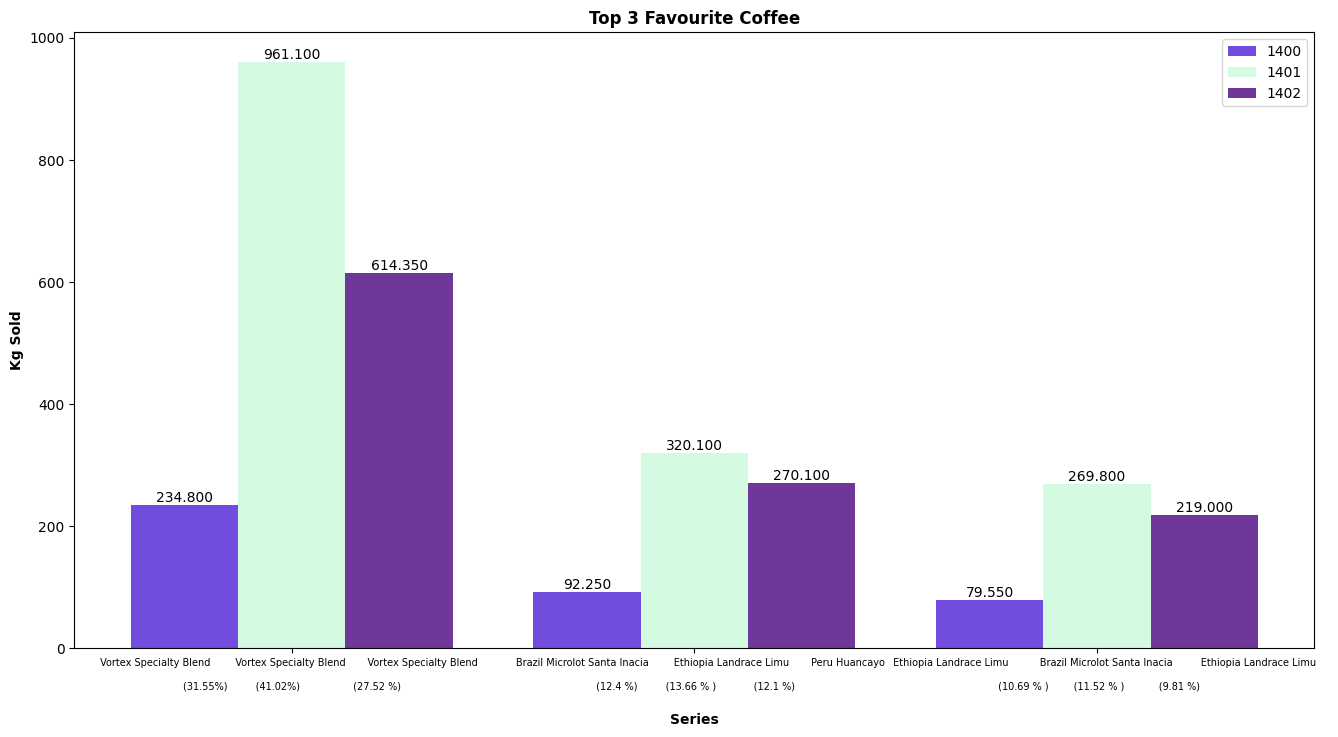

our top three A Series coffee based on their sales are: 

1st:   Colombia Castillo San Judas    --> 196,254,256 Rial (2.44% of Total Sale) With 19.95 KG of Sold (2.68% of Total)  
2nd:    A Series Sample Box --> 148,336,660 Rial (1.85% of Total Sale) With 11.2 KG of Sold (1.51% of Total)  
3rd:   Colombia Caturra Guava Banana    --> 140,400,000 Rial (1.75% of Total Sale) With 7.95 KG of Sold (1.07% of Total)  
our top three A Series coffee based on their sales are: 

1st:  Kenya Kiganjo    --> 785,675,000 Rial (4.01% of Total Sale) With 40.35 KG of Sold (1.72% of Total)  
2nd:  Ethiopia Bombe    --> 595,075,000 Rial (3.04% of Total Sale) With 35.83 KG of Sold (1.53% of Total)  
3rd:  Rwanda Red Bourbon Fuji    --> 409,316,000 Rial (2.09% of Total Sale) With 21.3 KG of Sold (0.91% of Total)  
our top three A Series coffee based on their sales are: 

1st:  Rwanda Red Bourbon Fuji    --> 1,239,326,841 Rial (2.97% of Total Sale) With 61.07 KG of Sold (2.74% of Total)  
2nd:   Costa Rica Ca

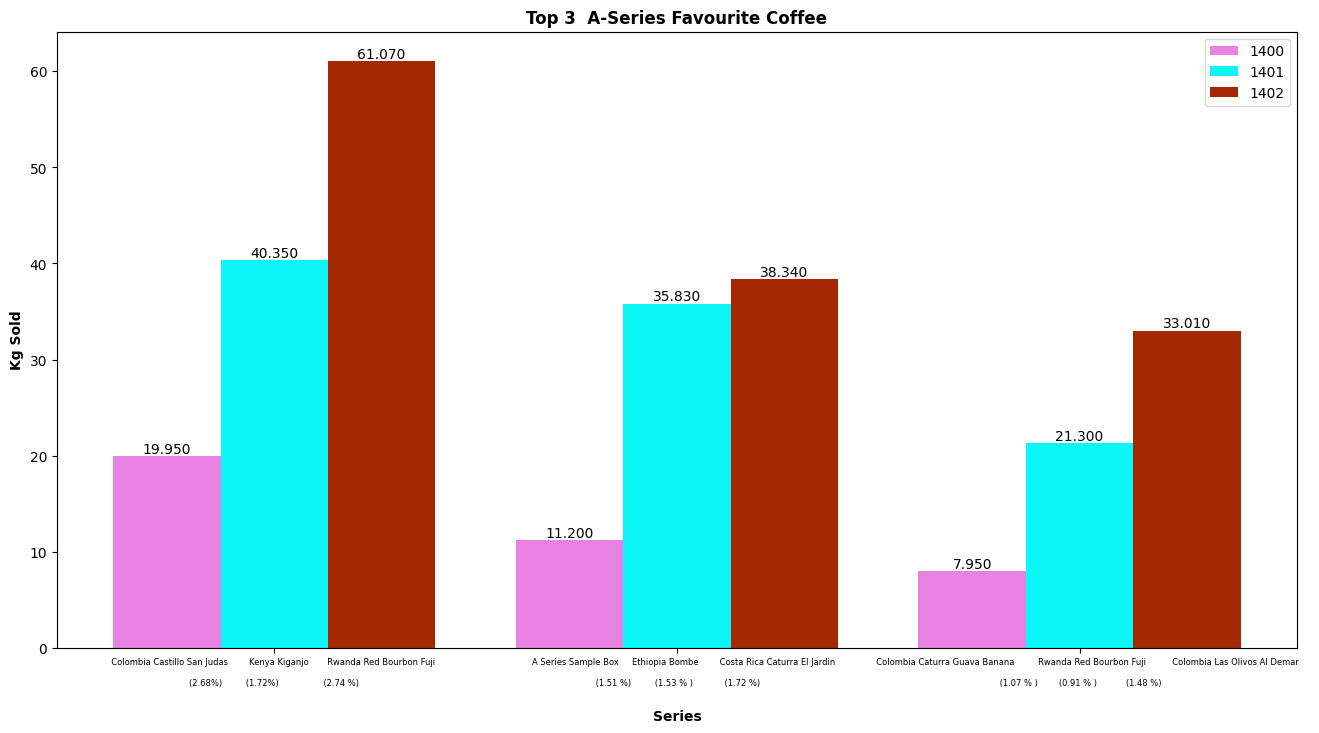

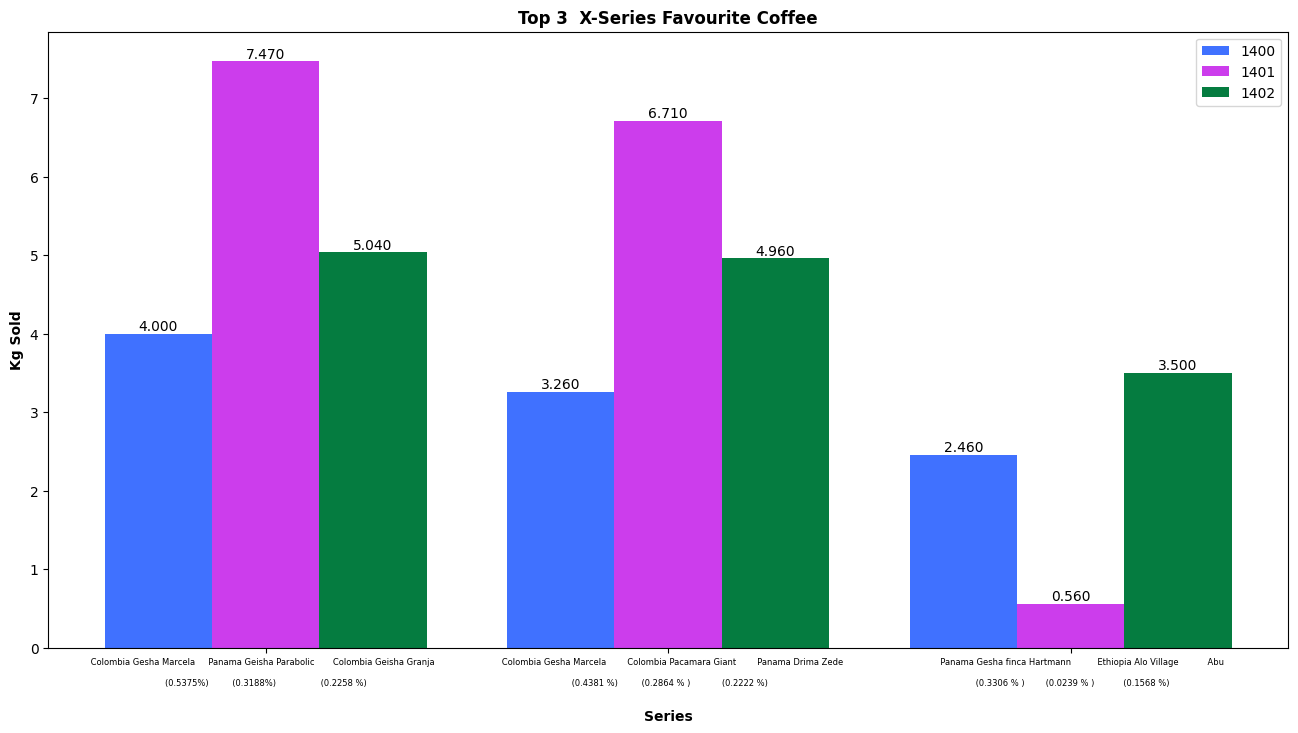

In [35]:

import re
def favourite(sale):
    coffee_df = sale[sale["كد گروه مشتري"] == 1]
    total_sale = sum(coffee_df["خالص"].to_list())
    total_kg_sale = round((sum(coffee_df["مقدار-فرعي"].to_list())) / 1000,3)
    for i in (coffee_df.index.to_list()):
    # renaming goods (delete their Gram or KG part of the name)
        coffee_df.loc[i,"كالا/خدمت"] = re.sub(r'[^a-zA-Z\s]', '',coffee_df.loc[i,"كالا/خدمت"]  )
        coffee_df.loc[i,"كالا/خدمت"] =  coffee_df.loc[i,"كالا/خدمت"].replace("kg", "").replace("gr", "")

    coffee_series_dict = coffee_df["كالا/خدمت"].value_counts().to_dict()
    series_dict = {}
    for i in coffee_series_dict.keys():
        series_df = coffee_df[coffee_df["كالا/خدمت"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        series_dict[i] = {"kg" : kg, "Total_Sale": bought}

    # Finding Top 3 Coffee based on their total sale
    top_3_coffee = sorted(series_dict, key=lambda k: series_dict[k]['kg'], reverse=True)[:]
    first_coffee = top_3_coffee[0]
    first_TR = series_dict[first_coffee]["Total_Sale"]
    first_kg = series_dict[first_coffee]["kg"]

    second_coffee = top_3_coffee[1]
    second_TR = series_dict[second_coffee]["Total_Sale"]
    second_kg = series_dict[second_coffee]["kg"]

    third_coffee = top_3_coffee[2]
    third_TR = series_dict[third_coffee]["Total_Sale"]
    third_kg = series_dict[third_coffee]["kg"]



    print("our top three coffee based on their sales are: \n")
    print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")

    return {"first_favourite_coffee":first_coffee, "first_favourite_coffee_tr":first_TR, "first_favourite_coffee_tr_percent": round((first_TR/total_sale)*100,2),
            "first_favourite_coffee_kg": first_kg, "first_favourite_coffee_kg_percent": round((first_kg/total_kg_sale)*100,2),
            "second_favourite_coffee":second_coffee, "second_favourite_coffee_tr":second_TR, "second_favourite_coffee_tr_percent": round((second_TR/total_sale)*100,2),
            "second_favourite_coffee_kg": second_kg, "second_favourite_coffee_kg_percent": round((second_kg/total_kg_sale)*100,2),
            "third_favourite_coffee":third_coffee, "third_favourite_coffee_tr":third_TR, "third_favourite_coffee_tr_percent": round((third_TR/total_sale)*100,2),
            "third_favourite_coffee_kg": third_kg, "third_favourite_coffee_kg_percent": round((third_kg/total_kg_sale)*100,2), "total_sale_kg": total_kg_sale}

sale_1400_dict = favourite(sale_1400[sale_1400["كد گروه مشتري"] == 1])
sale_1401_dict = favourite(sale_1401[sale_1401["كد گروه مشتري"] == 1])
sale_1402_dict = favourite(sale_1402[sale_1402["كد گروه مشتري"] == 1])

first_favourite_coffee_1400 = sale_1400_dict["first_favourite_coffee"]
first_favourite_coffee_1401 = sale_1401_dict["first_favourite_coffee"]
first_favourite_coffee_1402 = sale_1402_dict["first_favourite_coffee"]

first_favourite_coffee_tr_1400 = sale_1400_dict["first_favourite_coffee_tr"]
first_favourite_coffee_tr_1401 = sale_1401_dict["first_favourite_coffee_tr"]
first_favourite_coffee_tr_1402 = sale_1402_dict["first_favourite_coffee_tr"]

first_favourite_coffee_tr_percent_1400 = sale_1400_dict["first_favourite_coffee_tr_percent"]
first_favourite_coffee_tr_percent_1401 = sale_1401_dict["first_favourite_coffee_tr_percent"]
first_favourite_coffee_tr_percent_1402 = sale_1402_dict["first_favourite_coffee_tr_percent"]

first_favourite_coffee_kg_1400 = sale_1400_dict["first_favourite_coffee_kg"]
first_favourite_coffee_kg_1401 = sale_1401_dict["first_favourite_coffee_kg"]
first_favourite_coffee_kg_1402 = sale_1402_dict["first_favourite_coffee_kg"]

first_favourite_coffee_kg_percent_1400 = sale_1400_dict["first_favourite_coffee_kg_percent"]
first_favourite_coffee_kg_percent_1401 = sale_1401_dict["first_favourite_coffee_kg_percent"]
first_favourite_coffee_kg_percent_1402 = sale_1402_dict["first_favourite_coffee_kg_percent"]

second_favourite_coffee_1400 = sale_1400_dict["second_favourite_coffee"]
second_favourite_coffee_1401 = sale_1401_dict["second_favourite_coffee"]
second_favourite_coffee_1402 = sale_1402_dict["second_favourite_coffee"]

second_favourite_coffee_tr_1400 = sale_1400_dict["second_favourite_coffee_tr"]
second_favourite_coffee_tr_1401 = sale_1401_dict["second_favourite_coffee_tr"]
second_favourite_coffee_tr_1402 = sale_1402_dict["second_favourite_coffee_tr"]


second_favourite_coffee_tr_percent_1400 = sale_1400_dict["second_favourite_coffee_tr_percent"]
second_favourite_coffee_tr_percent_1401 = sale_1401_dict["second_favourite_coffee_tr_percent"]
second_favourite_coffee_tr_percent_1402 = sale_1402_dict["second_favourite_coffee_tr_percent"]

second_favourite_coffee_kg_1400 = sale_1400_dict["second_favourite_coffee_kg"]
second_favourite_coffee_kg_1401 = sale_1401_dict["second_favourite_coffee_kg"]
second_favourite_coffee_kg_1402 = sale_1402_dict["second_favourite_coffee_kg"]

second_favourite_coffee_kg_percent_1400 = sale_1400_dict["second_favourite_coffee_kg_percent"]
second_favourite_coffee_kg_percent_1401 = sale_1401_dict["second_favourite_coffee_kg_percent"]
second_favourite_coffee_kg_percent_1402 = sale_1402_dict["second_favourite_coffee_kg_percent"]

third_favourite_coffee_1400 = sale_1400_dict["third_favourite_coffee"]
third_favourite_coffee_1401 = sale_1401_dict["third_favourite_coffee"]
third_favourite_coffee_1402 = sale_1402_dict["third_favourite_coffee"]

third_favourite_coffee_tr_1400 = sale_1400_dict["third_favourite_coffee_tr"]
third_favourite_coffee_tr_1401 = sale_1401_dict["third_favourite_coffee_tr"]
third_favourite_coffee_tr_1402 = sale_1402_dict["third_favourite_coffee_tr"]

third_favourite_coffee_tr_percent_1400 = sale_1400_dict["third_favourite_coffee_tr_percent"]
third_favourite_coffee_tr_percent_1401 = sale_1401_dict["third_favourite_coffee_tr_percent"]
third_favourite_coffee_tr_percent_1402 = sale_1402_dict["third_favourite_coffee_tr_percent"]

third_favourite_coffee_kg_1400 = sale_1400_dict["third_favourite_coffee_kg"]
third_favourite_coffee_kg_1401 = sale_1401_dict["third_favourite_coffee_kg"]
third_favourite_coffee_kg_1402 = sale_1402_dict["third_favourite_coffee_kg"]

third_favourite_coffee_kg_percent_1400 = sale_1400_dict["third_favourite_coffee_kg_percent"]
third_favourite_coffee_kg_percent_1401 = sale_1401_dict["third_favourite_coffee_kg_percent"]
third_favourite_coffee_kg_percent_1402 = sale_1402_dict["third_favourite_coffee_kg_percent"]

top_1400 = [first_favourite_coffee_kg_1400 , second_favourite_coffee_kg_1400, third_favourite_coffee_kg_1400]
top_1401 = [first_favourite_coffee_kg_1401 , second_favourite_coffee_kg_1401, third_favourite_coffee_kg_1401]
top_1402 = [first_favourite_coffee_kg_1402 , second_favourite_coffee_kg_1402, third_favourite_coffee_kg_1402]

group = [f"{first_favourite_coffee_1400}    {first_favourite_coffee_1401}   {first_favourite_coffee_1402}\n\n({first_favourite_coffee_kg_percent_1400 }%)         ({first_favourite_coffee_kg_percent_1401}%)                 ({first_favourite_coffee_kg_percent_1402} %)",
          f"     {second_favourite_coffee_1400}    {second_favourite_coffee_1401}   {second_favourite_coffee_1402}\n\n ({second_favourite_coffee_kg_percent_1400} %)         ({second_favourite_coffee_kg_percent_1401} % )            ({second_favourite_coffee_kg_percent_1402} %)",
            f"        {third_favourite_coffee_1400}     {third_favourite_coffee_1401}     {third_favourite_coffee_1402} \n\n ({third_favourite_coffee_kg_percent_1400} % )        ({third_favourite_coffee_kg_percent_1401} % )           ({third_favourite_coffee_kg_percent_1402} %)"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def bar_group(classes, values, width=0.8):

    plt.figure(figsize=(16,8))
    plt.xlabel('\nSeries', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Top 3 Favourite Coffee",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.3f}', ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=7)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [top_1400, top_1401, top_1402])

plt.show()

#------------------------------------------------------------------------------------------------------------------------


def favourite_a(sale) :
    coffee_df = sale[sale["كد گروه مشتري"] == 1]
    total_sale = sum(coffee_df["خالص"].to_list())
    total_kg_sale = round((sum(coffee_df["مقدار-فرعي"].to_list())) / 1000,3)
   # Favourite Line in each Series
    a_series_df = coffee_df[coffee_df["گروه فروش"] == "A Series"]
    a_series_dict = a_series_df["كالا/خدمت"].value_counts().to_dict()
    a_series_data_dict = {}
    for i in a_series_dict.keys():
        series_df = a_series_df[a_series_df["كالا/خدمت"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        a_series_data_dict[i] = {"kg" : kg, "Total_Sale": bought}

    # Finding Top 3 Coffee based on their total sale
    top_3_coffee = sorted(a_series_data_dict, key=lambda k: a_series_data_dict[k]['kg'], reverse=True)[:]
    first_coffee = top_3_coffee[0]
    first_TR = a_series_data_dict[first_coffee]["Total_Sale"]
    first_kg = a_series_data_dict[first_coffee]["kg"]
    second_coffee = top_3_coffee[1]
    second_TR = a_series_data_dict[second_coffee]["Total_Sale"]
    second_kg = a_series_data_dict[second_coffee]["kg"]
    third_coffee = top_3_coffee[2]
    third_TR = a_series_data_dict[third_coffee]["Total_Sale"]
    third_kg = a_series_data_dict[third_coffee]["kg"]


    print("our top three A Series coffee based on their sales are: \n")
    print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")

    return {"first_a_favourite_coffee":first_coffee, "first_a_favourite_coffee_tr":first_TR, "first_a_favourite_coffee_tr_percent": round((first_TR/total_sale)*100,2),
        "first_a_favourite_coffee_kg": first_kg, "first_a_favourite_coffee_kg_percent": round((first_kg/total_kg_sale)*100,2),
        "second_a_favourite_coffee":second_coffee, "second_a_favourite_coffee_tr":second_TR, "second_a_favourite_coffee_tr_percent": round((second_TR/total_sale)*100,2),
        "second_a_favourite_coffee_kg": second_kg, "second_a_favourite_coffee_kg_percent": round((second_kg/total_kg_sale)*100,2),
        "third_a_favourite_coffee":third_coffee, "third_a_favourite_coffee_tr":third_TR, "third_a_favourite_coffee_tr_percent": round((third_TR/total_sale)*100,2),
        "third_a_favourite_coffee_kg": third_kg, "third_a_favourite_coffee_kg_percent": round((third_kg/total_kg_sale)*100,2)}


sale_1400_dict = favourite_a(sale_1400)
sale_1401_dict = favourite_a(sale_1401)
sale_1402_dict = favourite_a(sale_1402)

first_a_favourite_coffee_1400 = sale_1400_dict["first_a_favourite_coffee"]
first_a_favourite_coffee_1401 = sale_1401_dict["first_a_favourite_coffee"]
first_a_favourite_coffee_1402 = sale_1402_dict["first_a_favourite_coffee"]

first_a_favourite_coffee_tr_1400 = sale_1400_dict["first_a_favourite_coffee_tr"]
first_a_favourite_coffee_tr_1401 = sale_1401_dict["first_a_favourite_coffee_tr"]
first_a_favourite_coffee_tr_1402 = sale_1402_dict["first_a_favourite_coffee_tr"]

first_a_favourite_coffee_tr_percent_1400 = sale_1400_dict["first_a_favourite_coffee_tr_percent"]
first_a_favourite_coffee_tr_percent_1401 = sale_1401_dict["first_a_favourite_coffee_tr_percent"]
first_a_favourite_coffee_tr_percent_1402 = sale_1402_dict["first_a_favourite_coffee_tr_percent"]

first_a_favourite_coffee_kg_1400 = sale_1400_dict["first_a_favourite_coffee_kg"]
first_a_favourite_coffee_kg_1401 = sale_1401_dict["first_a_favourite_coffee_kg"]
first_a_favourite_coffee_kg_1402 = sale_1402_dict["first_a_favourite_coffee_kg"]

first_a_favourite_coffee_kg_percent_1400 = sale_1400_dict["first_a_favourite_coffee_kg_percent"]
first_a_favourite_coffee_kg_percent_1401 = sale_1401_dict["first_a_favourite_coffee_kg_percent"]
first_a_favourite_coffee_kg_percent_1402 = sale_1402_dict["first_a_favourite_coffee_kg_percent"]

second_a_favourite_coffee_1400 = sale_1400_dict["second_a_favourite_coffee"]
second_a_favourite_coffee_1401 = sale_1401_dict["second_a_favourite_coffee"]
second_a_favourite_coffee_1402 = sale_1402_dict["second_a_favourite_coffee"]

second_a_favourite_coffee_tr_1400 = sale_1400_dict["second_a_favourite_coffee_tr"]
second_a_favourite_coffee_tr_1401 = sale_1401_dict["second_a_favourite_coffee_tr"]
second_a_favourite_coffee_tr_1402 = sale_1402_dict["second_a_favourite_coffee_tr"]


second_a_favourite_coffee_tr_percent_1400 = sale_1400_dict["second_a_favourite_coffee_tr_percent"]
second_a_favourite_coffee_tr_percent_1401 = sale_1401_dict["second_a_favourite_coffee_tr_percent"]
second_a_favourite_coffee_tr_percent_1402 = sale_1402_dict["second_a_favourite_coffee_tr_percent"]

second_a_favourite_coffee_kg_1400 = sale_1400_dict["second_a_favourite_coffee_kg"]
second_a_favourite_coffee_kg_1401 = sale_1401_dict["second_a_favourite_coffee_kg"]
second_a_favourite_coffee_kg_1402 = sale_1402_dict["second_a_favourite_coffee_kg"]

second_a_favourite_coffee_kg_percent_1400 = sale_1400_dict["second_a_favourite_coffee_kg_percent"]
second_a_favourite_coffee_kg_percent_1401 = sale_1401_dict["second_a_favourite_coffee_kg_percent"]
second_a_favourite_coffee_kg_percent_1402 = sale_1402_dict["second_a_favourite_coffee_kg_percent"]

third_a_favourite_coffee_1400 = sale_1400_dict["third_a_favourite_coffee"]
third_a_favourite_coffee_1401 = sale_1401_dict["third_a_favourite_coffee"]
third_a_favourite_coffee_1402 = sale_1402_dict["third_a_favourite_coffee"]

third_a_favourite_coffee_tr_1400 = sale_1400_dict["third_a_favourite_coffee_tr"]
third_a_favourite_coffee_tr_1401 = sale_1401_dict["third_a_favourite_coffee_tr"]
third_a_favourite_coffee_tr_1402 = sale_1402_dict["third_a_favourite_coffee_tr"]

third_a_favourite_coffee_tr_percent_1400 = sale_1400_dict["third_a_favourite_coffee_tr_percent"]
third_a_favourite_coffee_tr_percent_1401 = sale_1401_dict["third_a_favourite_coffee_tr_percent"]
third_a_favourite_coffee_tr_percent_1402 = sale_1402_dict["third_a_favourite_coffee_tr_percent"]

third_a_favourite_coffee_kg_1400 = sale_1400_dict["third_a_favourite_coffee_kg"]
third_a_favourite_coffee_kg_1401 = sale_1401_dict["third_a_favourite_coffee_kg"]
third_a_favourite_coffee_kg_1402 = sale_1402_dict["third_a_favourite_coffee_kg"]

third_a_favourite_coffee_kg_percent_1400 = sale_1400_dict["third_a_favourite_coffee_kg_percent"]
third_a_favourite_coffee_kg_percent_1401 = sale_1401_dict["third_a_favourite_coffee_kg_percent"]
third_a_favourite_coffee_kg_percent_1402 = sale_1402_dict["third_a_favourite_coffee_kg_percent"]





top_1400 = [first_a_favourite_coffee_kg_1400 , second_a_favourite_coffee_kg_1400, third_a_favourite_coffee_kg_1400]
top_1401 = [first_a_favourite_coffee_kg_1401 , second_a_favourite_coffee_kg_1401, third_a_favourite_coffee_kg_1401]
top_1402 = [first_a_favourite_coffee_kg_1402 , second_a_favourite_coffee_kg_1402, third_a_favourite_coffee_kg_1402]

group = [f"{first_a_favourite_coffee_1400}    {first_a_favourite_coffee_1401}   {first_a_favourite_coffee_1402}\n\n({first_a_favourite_coffee_kg_percent_1400 }%)         ({first_a_favourite_coffee_kg_percent_1401}%)                 ({first_a_favourite_coffee_kg_percent_1402} %)",
          f"     {second_a_favourite_coffee_1400}    {second_a_favourite_coffee_1401}   {second_a_favourite_coffee_1402}\n\n ({second_a_favourite_coffee_kg_percent_1400} %)         ({second_a_favourite_coffee_kg_percent_1401} % )            ({second_a_favourite_coffee_kg_percent_1402} %)",
            f"        {third_a_favourite_coffee_1400}     {third_a_favourite_coffee_1401}     {third_a_favourite_coffee_1402} \n\n ({third_a_favourite_coffee_kg_percent_1400} % )        ({third_a_favourite_coffee_kg_percent_1401} % )           ({third_a_favourite_coffee_kg_percent_1402} %)"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def bar_group(classes, values, width=0.8):

    plt.figure(figsize=(16,8))
    plt.xlabel('\nSeries', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Top 3  A-Series Favourite Coffee",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.3f}', ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=6)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [top_1400, top_1401, top_1402])



def favourite_x(sale): 
    sale = sale[sale["كد گروه مشتري"] == 1] 
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
# Favourite Line in each Series
    x_series_df = sale[sale["گروه فروش"] == "X Series"]
    x_series_dict = x_series_df["كالا/خدمت"].value_counts().to_dict()
    x_series_data_dict = {}
    for i in x_series_dict.keys():
        series_df = x_series_df[x_series_df["كالا/خدمت"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        x_series_data_dict[i] = {"kg" : kg, "Total_Sale": bought}

    # Finding Top 3 Coffee based on their total sale
    top_3_coffee = sorted(x_series_data_dict, key=lambda k: x_series_data_dict[k]['kg'], reverse=True)[:]
    first_coffee = top_3_coffee[0]
    first_TR = x_series_data_dict[first_coffee]["Total_Sale"]
    first_kg = x_series_data_dict[first_coffee]["kg"]
    second_coffee = top_3_coffee[1]
    second_TR = x_series_data_dict[second_coffee]["Total_Sale"]
    second_kg = x_series_data_dict[second_coffee]["kg"]
    third_coffee = top_3_coffee[2]
    third_TR = x_series_data_dict[third_coffee]["Total_Sale"]
    third_kg = x_series_data_dict[third_coffee]["kg"]


    print("our top three X Series coffee based on their sales are: \n")
    print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
    print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")

    return {"first_x_favourite_coffee":first_coffee, "first_x_favourite_coffee_tr":first_TR, "first_x_favourite_coffee_tr_percent": round((first_TR/total_sale)*100,4),
    "first_x_favourite_coffee_kg": first_kg, "first_x_favourite_coffee_kg_percent": round((first_kg/total_kg_sale)*100,4),
    "second_x_favourite_coffee":second_coffee, "second_x_favourite_coffee_tr":second_TR, "second_x_favourite_coffee_tr_percent": round((second_TR/total_sale)*100,4),
    "second_x_favourite_coffee_kg": second_kg, "second_x_favourite_coffee_kg_percent": round((second_kg/total_kg_sale)*100,4),
    "third_x_favourite_coffee":third_coffee, "third_x_favourite_coffee_tr":third_TR, "third_x_favourite_coffee_tr_percent": round((third_TR/total_sale)*100,4),
    "third_x_favourite_coffee_kg": third_kg, "third_x_favourite_coffee_kg_percent": round((third_kg/total_kg_sale)*100,4)}

sale_1400_dict = favourite_x(sale_1400)
sale_1401_dict = favourite_x(sale_1401)
sale_1402_dict = favourite_x(sale_1402)

first_x_favourite_coffee_1400 = sale_1400_dict["first_x_favourite_coffee"]
first_x_favourite_coffee_1401 = sale_1401_dict["first_x_favourite_coffee"]
first_x_favourite_coffee_1402 = sale_1402_dict["first_x_favourite_coffee"]

first_x_favourite_coffee_tr_1400 = sale_1400_dict["first_x_favourite_coffee_tr"]
first_x_favourite_coffee_tr_1401 = sale_1401_dict["first_x_favourite_coffee_tr"]
first_x_favourite_coffee_tr_1402 = sale_1402_dict["first_x_favourite_coffee_tr"]

first_x_favourite_coffee_tr_percent_1400 = sale_1400_dict["first_x_favourite_coffee_tr_percent"]
first_x_favourite_coffee_tr_percent_1401 = sale_1401_dict["first_x_favourite_coffee_tr_percent"]
first_x_favourite_coffee_tr_percent_1402 = sale_1402_dict["first_x_favourite_coffee_tr_percent"]

first_x_favourite_coffee_kg_1400 = sale_1400_dict["first_x_favourite_coffee_kg"]
first_x_favourite_coffee_kg_1401 = sale_1401_dict["first_x_favourite_coffee_kg"]
first_x_favourite_coffee_kg_1402 = sale_1402_dict["first_x_favourite_coffee_kg"]

first_x_favourite_coffee_kg_percent_1400 = sale_1400_dict["first_x_favourite_coffee_kg_percent"]
first_x_favourite_coffee_kg_percent_1401 = sale_1401_dict["first_x_favourite_coffee_kg_percent"]
first_x_favourite_coffee_kg_percent_1402 = sale_1402_dict["first_x_favourite_coffee_kg_percent"]

second_x_favourite_coffee_1400 = sale_1400_dict["second_x_favourite_coffee"]
second_x_favourite_coffee_1401 = sale_1401_dict["second_x_favourite_coffee"]
second_x_favourite_coffee_1402 = sale_1402_dict["second_x_favourite_coffee"]

second_x_favourite_coffee_tr_1400 = sale_1400_dict["second_x_favourite_coffee_tr"]
second_x_favourite_coffee_tr_1401 = sale_1401_dict["second_x_favourite_coffee_tr"]
second_x_favourite_coffee_tr_1402 = sale_1402_dict["second_x_favourite_coffee_tr"]


second_x_favourite_coffee_tr_percent_1400 = sale_1400_dict["second_x_favourite_coffee_tr_percent"]
second_x_favourite_coffee_tr_percent_1401 = sale_1401_dict["second_x_favourite_coffee_tr_percent"]
second_x_favourite_coffee_tr_percent_1402 = sale_1402_dict["second_x_favourite_coffee_tr_percent"]

second_x_favourite_coffee_kg_1400 = sale_1400_dict["second_x_favourite_coffee_kg"]
second_x_favourite_coffee_kg_1401 = sale_1401_dict["second_x_favourite_coffee_kg"]
second_x_favourite_coffee_kg_1402 = sale_1402_dict["second_x_favourite_coffee_kg"]

second_x_favourite_coffee_kg_percent_1400 = sale_1400_dict["second_x_favourite_coffee_kg_percent"]
second_x_favourite_coffee_kg_percent_1401 = sale_1401_dict["second_x_favourite_coffee_kg_percent"]
second_x_favourite_coffee_kg_percent_1402 = sale_1402_dict["second_x_favourite_coffee_kg_percent"]

third_x_favourite_coffee_1400 = sale_1400_dict["third_x_favourite_coffee"]
third_x_favourite_coffee_1401 = sale_1401_dict["third_x_favourite_coffee"]
third_x_favourite_coffee_1402 = sale_1402_dict["third_x_favourite_coffee"]

third_x_favourite_coffee_tr_1400 = sale_1400_dict["third_x_favourite_coffee_tr"]
third_x_favourite_coffee_tr_1401 = sale_1401_dict["third_x_favourite_coffee_tr"]
third_x_favourite_coffee_tr_1402 = sale_1402_dict["third_x_favourite_coffee_tr"]

third_x_favourite_coffee_tr_percent_1400 = sale_1400_dict["third_x_favourite_coffee_tr_percent"]
third_x_favourite_coffee_tr_percent_1401 = sale_1401_dict["third_x_favourite_coffee_tr_percent"]
third_x_favourite_coffee_tr_percent_1402 = sale_1402_dict["third_x_favourite_coffee_tr_percent"]

third_x_favourite_coffee_kg_1400 = sale_1400_dict["third_x_favourite_coffee_kg"]
third_x_favourite_coffee_kg_1401 = sale_1401_dict["third_x_favourite_coffee_kg"]
third_x_favourite_coffee_kg_1402 = sale_1402_dict["third_x_favourite_coffee_kg"]

third_x_favourite_coffee_kg_percent_1400 = sale_1400_dict["third_x_favourite_coffee_kg_percent"]
third_x_favourite_coffee_kg_percent_1401 = sale_1401_dict["third_x_favourite_coffee_kg_percent"]
third_x_favourite_coffee_kg_percent_1402 = sale_1402_dict["third_x_favourite_coffee_kg_percent"]

#------------------------------------------------------------------------------------------------------------------------

top_1400 = [first_x_favourite_coffee_kg_1400 , second_x_favourite_coffee_kg_1400, third_x_favourite_coffee_kg_1400]
top_1401 = [first_x_favourite_coffee_kg_1401 , second_x_favourite_coffee_kg_1401, third_x_favourite_coffee_kg_1401]
top_1402 = [first_x_favourite_coffee_kg_1402 , second_x_favourite_coffee_kg_1402, third_x_favourite_coffee_kg_1402]

group = [f"{first_x_favourite_coffee_1400}    {first_x_favourite_coffee_1401}   {first_x_favourite_coffee_1402}\n\n({first_x_favourite_coffee_kg_percent_1400 }%)         ({first_x_favourite_coffee_kg_percent_1401}%)                 ({first_x_favourite_coffee_kg_percent_1402} %)",
          f"     {second_x_favourite_coffee_1400}    {second_x_favourite_coffee_1401}   {second_x_favourite_coffee_1402}\n\n ({second_x_favourite_coffee_kg_percent_1400} %)         ({second_x_favourite_coffee_kg_percent_1401} % )            ({second_x_favourite_coffee_kg_percent_1402} %)",
            f"        {third_x_favourite_coffee_1400}     {third_x_favourite_coffee_1401}     {third_x_favourite_coffee_1402} \n\n ({third_x_favourite_coffee_kg_percent_1400} % )        ({third_x_favourite_coffee_kg_percent_1401} % )           ({third_x_favourite_coffee_kg_percent_1402} %)"]

num_colors = 3  # Number of colors in the palette
colors = np.random.rand(num_colors, 3)  # Generate random RGB colors

# Set the color cycle to use the random colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

def bar_group(classes, values, width=0.8):

    plt.figure(figsize=(16,8))
    plt.xlabel('\nSeries', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Top 3  X-Series Favourite Coffee",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.3f}' % height, ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=6)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [top_1400, top_1401, top_1402])

plt.show()


## برحسب شهر

In [36]:
# def city(sale,city_df): 
#     city_dict = {}
#     for i in range(len(city_df)):
#         code = city_df.loc[i, "كد"]
#         customer_city = city_df.loc[i, "شهر"]
#         city_dict[code] = customer_city

#     sale["شهر"] = None
#     for i in range(len(sale)):
#         code = sale.loc[i, "كد مشتري"]
#         sale.loc[i,"شهر"] = city_dict[code]

#     city = sale["شهر"].value_counts().to_dict()
#     total_sale = sum(sale["خالص"].to_list())
#     total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
#     city_dict = {}
#     for i in city.keys():
#         series_df = sale[sale["شهر"] == i]
#         # their Total KG
#         kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
#         # their Total Rial
#         bought = sum(series_df["خالص"].tolist())
#         # adding the values to a dict
#         city_dict[i] = {"kg" : kg, "Total_Sale": bought}

#     # Finding Top 3 Coffee based on their total sale
#     top_3_coffee = sorted(city_dict, key=lambda k: city_dict[k]['Total_Sale'], reverse=True)[:]
#     first_coffee = top_3_coffee[0]
#     first_TR = city_dict[first_coffee]["Total_Sale"]
#     first_kg = city_dict[first_coffee]["kg"]
#     second_coffee = top_3_coffee[1]
#     second_TR = city_dict[second_coffee]["Total_Sale"]
#     second_kg = city_dict[second_coffee]["kg"]
#     third_coffee = top_3_coffee[2]
#     third_TR = city_dict[third_coffee]["Total_Sale"]
#     third_kg = city_dict[third_coffee]["kg"]


#     print("our top three Cities based on their sales are: \n")
#     print(f"1st: {first_coffee} --> {first_TR:,} Rial ({round((first_TR/total_sale)*100,2)}% of Total Sale) With {first_kg:,} KG of Sold ({round((first_kg/total_kg_sale)*100,2)}% of Total)  ")
#     print(f"2nd: {second_coffee} --> {second_TR:,} Rial ({round((second_TR/total_sale)*100,2)}% of Total Sale) With {second_kg:,} KG of Sold ({round((second_kg/total_kg_sale)*100,2)}% of Total)  ")
#     print(f"3rd: {third_coffee} --> {third_TR:,} Rial ({round((third_TR/total_sale)*100,2)}% of Total Sale) With {third_kg:,} KG of Sold ({round((third_kg/total_kg_sale)*100,2)}% of Total)  ")


#     return {"first_city":first_coffee, "first_city_tr":first_TR, "first_city_tr_percent": round((first_TR/total_sale)*100,2),
#     "first_city_kg": first_kg, "first_city_kg_percent": round((first_kg/total_kg_sale)*100,2),

#     "second_city":second_coffee, "second_city_tr":second_TR, "second_city_tr_percent": round((second_TR/total_sale)*100,2),
#     "second_city_kg": second_kg, "second_city_kg_percent": round((second_kg/total_kg_sale)*100,2),

#     "third_city":third_coffee, "third_city_tr":third_TR, "third_city_tr_percent": round((third_TR/total_sale)*100,2),
#     "third_city_kg": third_kg, "third_city_kg_percent": round((third_kg/total_kg_sale)*100,2)
#  }
# city_1400 = city(sale_1400, city_1402_df)
# city_1401 = city(sale_1401, city_1402_df)
# city_1402 = city(sale_1402, city_1402_df)

# first_city_1400 = city_1400["first_city"]
# first_city_tr_1400 = city_1400["first_city_tr"]
# first_city_tr_percent_1400 = city_1400["first_city_tr_percent"]
# first_city_kg_1400 = city_1400["first_city_kg"]
# first_city_kg_percent_1400 = city_1400["first_city_kg_percent"]

# first_city_1401 = city_1401["first_city"]
# first_city_tr_1401 = city_1401["first_city_tr"]
# first_city_tr_percent_1401 = city_1401["first_city_tr_percent"]
# first_city_kg_1401 = city_1401["first_city_kg"]
# first_city_kg_percent_1401 = city_1401["first_city_kg_percent"]

# first_city_1402 = city_1402["first_city"]
# first_city_tr_1402 = city_1402["first_city_tr"]
# first_city_tr_percent_1402 = city_1402["first_city_tr_percent"]
# first_city_kg_1402 = city_1402["first_city_kg"]
# first_city_kg_percent_1402 = city_1402["first_city_kg_percent"]

# second_city_1400 = city_1400["second_city"]
# second_city_1401 = city_1401["second_city"]
# second_city_1402 = city_1402["second_city"]

# second_city_tr_1400 = city_1400["second_city_tr"]
# second_city_tr_1401 = city_1401["second_city_tr"]
# second_city_tr_1402 = city_1402["second_city_tr"]

# second_city_tr_percent_1400 = city_1400["second_city_tr_percent"]
# second_city_tr_percent_1401 = city_1401["second_city_tr_percent"]
# second_city_tr_percent_1402 = city_1402["second_city_tr_percent"]

# second_city_kg_1400 = city_1400["second_city_kg"]
# second_city_kg_1401 = city_1401["second_city_kg"]
# second_city_kg_1402 = city_1402["second_city_kg"]

# second_city_kg_percent_1400 = city_1400["second_city_kg_percent"]
# second_city_kg_percent_1401 = city_1401["second_city_kg_percent"]
# second_city_kg_percent_1402 = city_1402["second_city_kg_percent"]

# third_city_1400 = city_1400["third_city"]
# third_city_1401 = city_1401["third_city"]
# third_city_1402 = city_1402["third_city"]

# third_city_tr_1400 = city_1400["third_city_tr"]
# third_city_tr_1401 = city_1401["third_city_tr"]
# third_city_tr_1402 = city_1402["third_city_tr"]

# third_city_tr_percent_1400 = city_1400["third_city_tr_percent"]
# third_city_tr_percent_1401 = city_1401["third_city_tr_percent"]
# third_city_tr_percent_1402 = city_1402["third_city_tr_percent"]

# third_city_kg_1400 = city_1400["third_city_kg"]
# third_city_kg_1401 = city_1401["third_city_kg"]
# third_city_kg_1402 = city_1402["third_city_kg"]

# third_city_kg_percent_1400 = city_1400["third_city_kg_percent"]
# third_city_kg_percent_1401 = city_1401["third_city_kg_percent"]
# third_city_kg_percent_1402 = city_1402["third_city_kg_percent"]



# Data
# years = ['1400', '1401', '1402']
# categories = [first_city_1400, second_city_1400, third_city_1400]
# values_1 = [first_city_tr_1400, first_city_tr_1401, first_city_tr_1402]  
# values_2 = [second_city_tr_1400, second_city_tr_1401, second_city_tr_1402]  # Values for the second thing over 3 years
# values_3 = [third_city_tr_1400, third_city_tr_1401, third_city_tr_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st City')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd City')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd City')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Rial')
# plt.title('Top 3 Cities Sale(Rial)')
# plt.xticks(index + bar_width, years)
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis tick labels with thousand separators
# plt.legend()

# # Display the plot
# plt.show()

#------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_city_1400, second_city_1400, third_city_1400]
# values_1 = [first_city_tr_percent_1400, first_city_tr_percent_1401, first_city_tr_percent_1402]  
# values_2 = [second_city_tr_percent_1400, second_city_tr_percent_1401, second_city_tr_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_city_tr_percent_1400, third_city_tr_percent_1401, third_city_tr_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st City')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd City')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd City')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('Percent')
# plt.title('Top 3 Cities Sale(Rial) %')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()

# #------------------------------------------------------------------------------------------------------------------------


# # Data
# years = ['1400', '1401', '1402']
# categories = [first_city_1400, second_city_1400, third_city_1400]
# values_1 = [first_city_kg_1400, first_city_kg_1401, first_city_kg_1402]  
# values_2 = [second_city_kg_1400, second_city_kg_1401, second_city_kg_1402]  # Values for the second thing over 3 years
# values_3 = [third_city_kg_1400, third_city_kg_1401, third_city_kg_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st City')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd City')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd City')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('KG')
# plt.title('Top 3 Cities Sale(KG)')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()
# #------------------------------------------------------------------------------------------------------------------------

# # Data
# years = ['1400', '1401', '1402']
# categories = [first_city_1400, second_city_1400, third_city_1400]
# values_1 = [first_city_kg_percent_1400, first_city_kg_percent_1401, first_city_kg_percent_1402]  
# values_2 = [second_city_kg_percent_1400, second_city_kg_percent_1401, second_city_kg_percent_1402]  # Values for the second thing over 3 years
# values_3 = [third_city_kg_percent_1400, third_city_kg_percent_1401, third_city_kg_percent_1402]   # Values for the third thing over 3 years

# # Plotting
# bar_width = 0.2
# index = np.arange(len(years))
# plt.bar(index, values_1, bar_width, label='1st City')
# plt.bar(index + bar_width, values_2, bar_width, label='2nd City')
# plt.bar(index + 2*bar_width, values_3, bar_width, label='3rd City')

# # Customizing the plot
# plt.xlabel('Year')
# plt.ylabel('percent')
# plt.title('Top 3 Cities Sale(KG) %')
# plt.xticks(index + bar_width, years)
# plt.legend()

# # Display the plot
# plt.show()

#------------------------------------------------------------------------------------------------------------------------

def top_city(sale, string):
    city = sale["شهر"].value_counts().to_dict()
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    city_dict = {}
    for i in city.keys():
        try:
            series_df = sale[sale["شهر"] == i]
            # their Total KG
            kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
            # their Total Rial
            bought = sum(series_df["خالص"].tolist())
            # adding the values to a dict
            city_dict[i] = {"kg" : kg, "Total_Sale": bought}
        except:
            continue
    top_city = sorted(city_dict, key=lambda k: city_dict[k]['kg'], reverse=True)[:11]
    top_city_dict = {}
    for i in top_city:
        top_city_dict[i] = city_dict[i]["kg"]


    # plot the output
    x = list(top_city_dict.keys())
    y = list(top_city_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Top Sale City {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Add exact value labels on top of the bars
    label_font_size = '6pt'  # Set the desired font size here
    x_offset = 40  # Set the desired x offset here
    y_offset = 10  # Set the desired y offset here

    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(value) + f"  ({round((value/total_kg_sale)*100,2)}%)", text_baseline='middle', text_align='center',
                       text_font_size=label_font_size, x_offset=x_offset, y_offset=y_offset)
        p.add_layout(label)

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels

    # Show the plot
    output_notebook()
    show(p)
    return pd.DataFrame(top_city_dict,index=[0]).T


top_city(sale_1400, "1400" )
top_city(sale_1401, "1401")
top_city(sale_1402, "1402")

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

,0
تهران,18299.23
قم,2769.16
شيراز,2716.67
كرج,2528.93
كرمان,1356.81
اروميه,1084.72
بندرعباس,971.59
زنجان,656.35
اصفهان,637.11
مشهد,615.43


## Top Cafes

In [37]:
def top_cafe(df,string):
    total_kg_sale = round((sum(df["مقدار-فرعي"].to_list())) / 1000,3)
    cafe_buy_dict = {}
    cafe_list = set(df[df["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    for i in cafe_list:
        kg = round(sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())/1000,3)
        cafe_buy_dict[i] = {"name": df[df["كد مشتري"] == i]["مشتري"].to_list()[0],
                        "kg": kg }
    sorted_cafe = sorted(cafe_buy_dict, key=lambda k: cafe_buy_dict[k]['kg'], reverse=True)[:11]
    top_cafe_dict = {}
    for i in sorted_cafe:
        top_cafe_dict[cafe_buy_dict[i]["name"]] = cafe_buy_dict[i]["kg"]

    # plot the output
    x = list(top_cafe_dict.keys())
    y = list(top_cafe_dict.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Top Sale Cafe {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels
    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(value) +f"  ({round((value/total_kg_sale)*100,2)}%)", text_baseline='middle', text_align='center',text_font_size="7pt",
                      x_offset=40, y_offset= 10)
        p.add_layout(label)

    # Show the plot1
    output_notebook()
    show(p)
    return pd.DataFrame(top_cafe_dict,index=[0]).T



top_cafe(sale_1400, "1400")
top_cafe(sale_1401, "1401")
top_cafe(sale_1402, "1402")

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

,0
كافه بيكري روستار سانا سنتر,3333.10
كافه روستار آوا سنتر(شهرام رجبي),2073.40
كافه كي آر بي (علي كرباسچي ),1664.76
كافه سدل روم (دانيال مطيعان),1266.70
كافه دارچين (كيان كاوه ),988.80
ويكافه (محمود فتاح),942.23
فروشگاه پينچ (ساسان حامدي ),821.20
كافه بيكري گنتوم (فاتح نژاد),801.64
كافه دارسين (عبدالرضا ملك قاسمي),747.97
كافه آندورا (محمد درخشان),692.30


## common cafe

In [38]:
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")

def common_cafe(sale_1400, sale_1401, sale_1402):
    total_rial_sale_1400 = sum(sale_1400["خالص"].to_list())
    total_rial_sale_1401 = sum(sale_1401["خالص"].to_list())
    total_rial_sale_1402 = sum(sale_1402["خالص"].to_list())

    total_kg_sale_1400 = sum(sale_1400["مقدار-فرعي"].to_list())
    total_kg_sale_1401 = sum(sale_1401["مقدار-فرعي"].to_list())
    total_kg_sale_1402 = sum(sale_1402["مقدار-فرعي"].to_list())

    cafe_1402 = set(sale_1402[sale_1402["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    cafe_1401 = set(sale_1401[sale_1401["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    cafe_1400 = set(sale_1400[sale_1400["كد گروه مشتري"] == 2]["كد مشتري"].to_list())

    common = cafe_1400 & cafe_1401 & cafe_1402

    print(f"from 1400 until now {len(common)} cafe has ordered us in each last three years")
    common_dict = {}
    for i in common:
        kharid_1400_rial = sum(sale_1400[sale_1400["كد مشتري"] == i]["خالص"].to_list())
        kharid_1401_rial = sum(sale_1401[sale_1401["كد مشتري"] == i]["خالص"].to_list())
        kharid_1402_rial = sum(sale_1402[sale_1402["كد مشتري"] == i]["خالص"].to_list())

        kharid_1400_kg = sum(sale_1400[sale_1400["كد مشتري"] == i]["مقدار-فرعي"].to_list())
        kharid_1401_kg = sum(sale_1401[sale_1401["كد مشتري"] == i]["مقدار-فرعي"].to_list())
        kharid_1402_kg = sum(sale_1402[sale_1402["كد مشتري"] == i]["مقدار-فرعي"].to_list())

        common_dict[i] = {"name": sale_1400[sale_1400["كد مشتري"] == i]["مشتري"].to_list()[0],
                          "kharid_1400_rial": kharid_1400_rial, "kharid_1400_rial_percent": round((kharid_1400_rial/total_rial_sale_1400)*100,2),
                          "kharid_1401_rial": kharid_1401_rial, "kharid_1401_rial_percent": round((kharid_1401_rial/total_rial_sale_1401)*100,2),
                          "kharid_1402_rial": kharid_1402_rial, "kharid_1402_rial_percent": round((kharid_1402_rial/total_rial_sale_1402)*100,2),
                        "kharid_1400_kg": kharid_1400_kg, "kharid_1400_kg_percent": round((kharid_1400_kg/total_kg_sale_1400)*100,2),
                          "kharid_1401_kg": kharid_1401_kg, "kharid_1401_kg_percent": round((kharid_1401_kg/total_kg_sale_1401)*100,2),
                          "kharid_1402_kg": kharid_1402_kg, "kharid_1402_kg_percent": round((kharid_1402_kg/total_kg_sale_1402)*100,2),
                          }
        df = pd.DataFrame(common_dict).T

    return df.to_excel('common cafes.xlsx', index=False)


common_cafe(sale_1400, sale_1401, sale_1402)


from 1400 until now 87 cafe has ordered us in each last three years


## بر حسب ۶ ماه


In [39]:
def half_year(sale):
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    first_half_df = sale[sale['ماه'] <= 6]
    first_half_rial = (sum(first_half_df["خالص"].to_list()))
    first_half_kg = round(sum(first_half_df["مقدار-فرعي"].to_list())/1000,2)

    second_half_df = sale[sale['ماه'] >= 7]
    second_half_rial = (sum(second_half_df["خالص"].to_list()))
    second_half_kg = round(sum(second_half_df["مقدار-فرعي"].to_list())/1000,2)

    print(f"our total sale in first half of 1400 was {first_half_rial:,} Rial ({round((first_half_rial/total_sale)*100,2)} % of Total)")
    print(f"our total KG sale in first half of 1400 was {first_half_kg:,} KG ({round((first_half_kg/total_kg_sale)*100,2)} % of Total)")

    print(f"our total sale in second half of 1400 was {second_half_rial:,} Rial ({round((second_half_rial/total_sale)*100,2)} % of Total)")
    print(f"our total KG sale in second half of 1400 was {second_half_kg:,} Rial ({round((second_half_kg/total_kg_sale)*100,2)} % of Total)")
    print("-----------------------------------------------------------------------\n")


    return {"first_half_rial": first_half_rial, "first_half_rial_percent": round((first_half_rial/total_sale)*100,2),
            "first_half_kg": first_half_kg, "first_half_kg_percent": round((first_half_kg/total_kg_sale)*100,2),
            "second_half_rial": second_half_rial, "second_half_rial_percent": round((second_half_rial/total_sale)*100,2),
            "second_half_kg": second_half_kg, "second_half_kg_percent": second_half_kg}
half_year(sale_1400)
half_year(sale_1401)
half_year(sale_1402)

our total sale in first half of 1400 was 29,724,640,250 Rial (28.59 % of Total)
our total KG sale in first half of 1400 was 7,073.3 KG (30.34 % of Total)
our total sale in second half of 1400 was 74,252,688,000 Rial (71.41 % of Total)
our total KG sale in second half of 1400 was 16,242.26 Rial (69.66 % of Total)
-----------------------------------------------------------------------

our total sale in first half of 1400 was 100,990,242,546 Rial (38.25 % of Total)
our total KG sale in first half of 1400 was 16,586.74 KG (41.06 % of Total)
our total sale in second half of 1400 was 163,013,807,961 Rial (61.75 % of Total)
our total KG sale in second half of 1400 was 23,809.69 Rial (58.94 % of Total)
-----------------------------------------------------------------------

our total sale in first half of 1400 was 211,337,040,750 Rial (50.32 % of Total)
our total KG sale in first half of 1400 was 19,581.2 KG (nan % of Total)
our total sale in second half of 1400 was 208,678,860,875 Rial (49.6

{'first_half_rial': 211337040750,
 'first_half_rial_percent': 50.32,
 'first_half_kg': 19581.2,
 'first_half_kg_percent': nan,
 'second_half_rial': 208678860875,
 'second_half_rial_percent': 49.68,
 'second_half_kg': nan,
 'second_half_kg_percent': nan}

## Vol2

In [40]:

def extract_number(text):
    number_part = re.findall(r'\d+', text)
    if number_part :
        return str(number_part[0])
    else:
        return None
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")
# Apply the function to each row of the name column
sale_1400['كالا/خدمت'] = sale_1400['كالا/خدمت'].apply(extract_number)
sale_1401['كالا/خدمت'] = sale_1401['كالا/خدمت'].apply(extract_number)
sale_1402['كالا/خدمت'] = sale_1402['كالا/خدمت'].apply(extract_number)

sale_1400 = sale_1400[sale_1400["ماه"] <=9]
sale_1401 = sale_1401[sale_1401["ماه"] <=9]
sale_1402 = sale_1402[sale_1402["ماه"] <=9]



## Each Package Sale

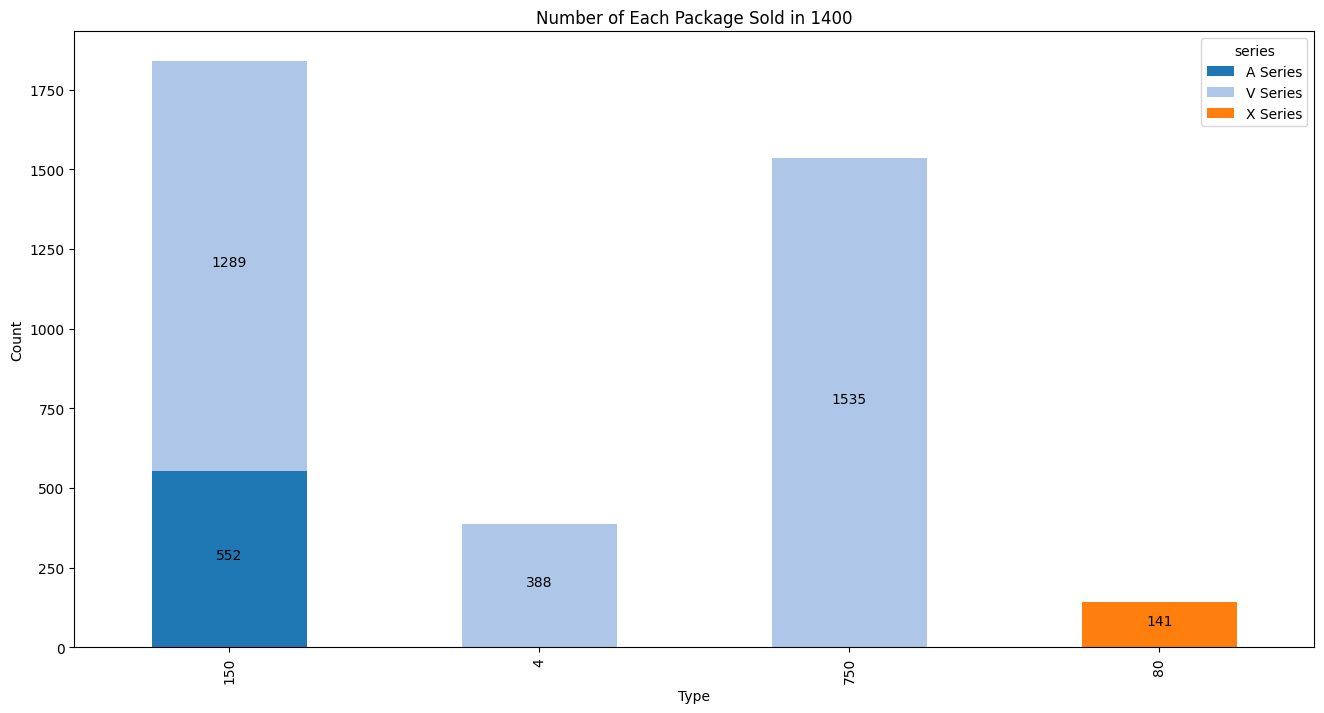

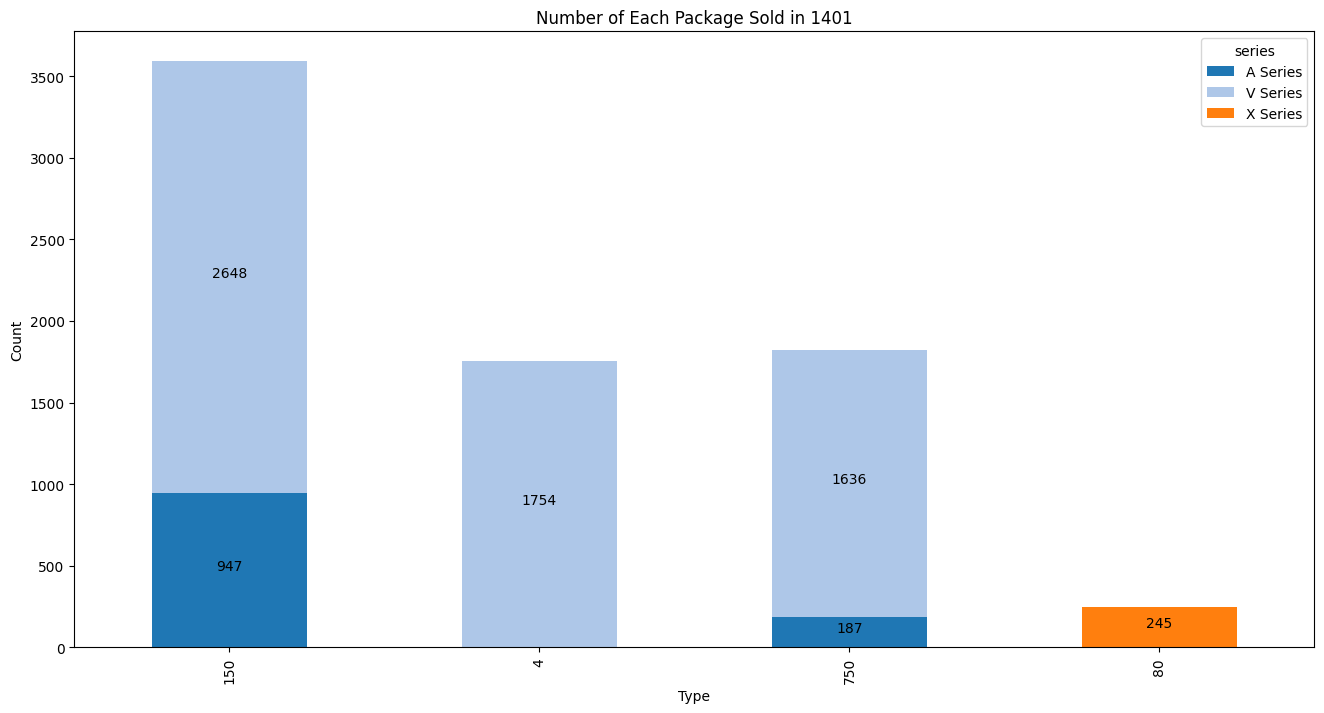

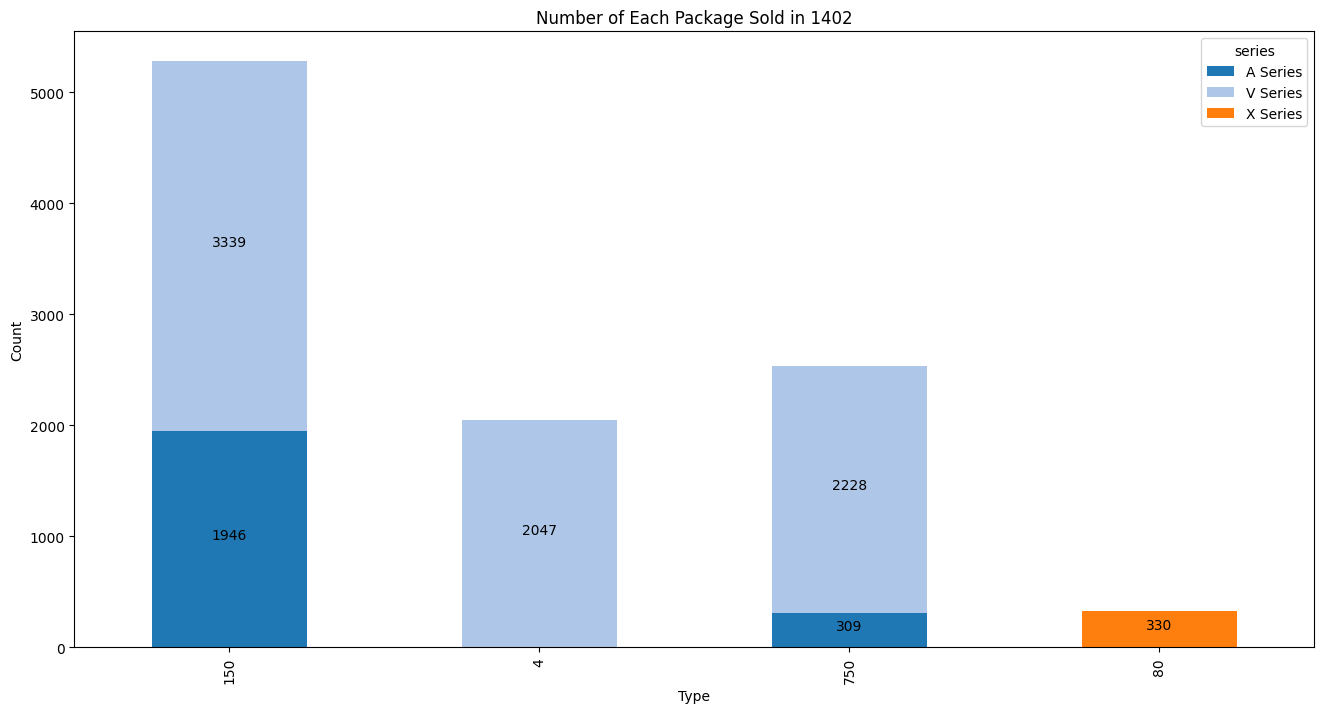

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def remove_and_plot(df, year):
    df = df[(df['كالا/خدمت'] == "150") | (df['كالا/خدمت'] == "750") | (df['كالا/خدمت'] == "4") | (df['كالا/خدمت'] == "80") | (df['كالا/خدمت'] == "85")]
    df.loc[df['كالا/خدمت'] == "85", 'كالا/خدمت'] = "80"

    data = {'type': df['كالا/خدمت'].to_list(),
            'series': df["گروه فروش"].to_list()}
    df = pd.DataFrame(data)

    # Group by 'type' and 'series', then count the occurrences
    result = df.groupby(['type', 'series']).size().unstack(fill_value=0)

    # Create the stacked bar chart
    result.plot(kind='bar', stacked=True, figsize=(16, 8), color=sns.color_palette("tab20"))

    # Add labels on top of each non-zero bar
    for i in range(len(result)):
        total = 0
        for col in result.columns:
            if result[col].iloc[i] != 0:
                plt.text(i, total + result[col].iloc[i] / 2, result[col].iloc[i], ha='center')
            total += result[col].iloc[i]

    # Set the title and labels
    plt.title(f"Number of Each Package Sold in {year}")
    plt.xlabel('Type')
    plt.ylabel('Count')

    # Show the plot
    plt.show()

remove_and_plot(sale_1400, "1400")
remove_and_plot(sale_1401, "1401")
remove_and_plot(sale_1402, "1402")


## Ema of Sale

In [42]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
import pandas as pd

def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg = round(sum(df[df["ماه"] == i]["مقدار-فرعي"].to_list()) / 1000, 6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(sale_1402)

monthly_sales_series_1400 = pd.Series(kg_1400)
monthly_sales_series_1401 = pd.Series(kg_1401)
monthly_sales_series_1402 = pd.Series(kg_1402)

# Calculate the monthly SMA using the rolling() and mean() functions
monthly_sma_1400 = monthly_sales_series_1400.rolling(window=2).mean()  # Adjust the window size as per your requirement
monthly_sma_1401 = monthly_sales_series_1401.rolling(window=2).mean()
monthly_sma_1402 = monthly_sales_series_1402.rolling(window=2).mean()

# Create a new plot with a title and axis labels
p = figure(title="Monthly SMA of Sales", x_axis_label='\nMonths', y_axis_label='Sales', width=1000, height=600)

# Add a line renderer with legend and line thickness
p.line(list(range(len(monthly_sales_series_1400))), monthly_sales_series_1400, legend_label="Monthly Average 1400", line_width=2, line_color="blue")
p.line(list(range(len(monthly_sales_series_1401))), monthly_sales_series_1401, legend_label="Monthly Average 1401", line_width=2, line_color="green")
p.line(list(range(len(monthly_sales_series_1402))), monthly_sales_series_1402, legend_label="Monthly Average 1402", line_width=2, line_color="red")

# Set x-axis labels
p.xaxis.ticker = list(range(len(monthly_sales_series_1402)))
p.xaxis.major_label_overrides = {i: label for i, label in enumerate(['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"])}
p.legend.location = "top_left"


# Show the plot
output_notebook()

show(p)


Loading BokehJS ...

## Top 20% deletation 

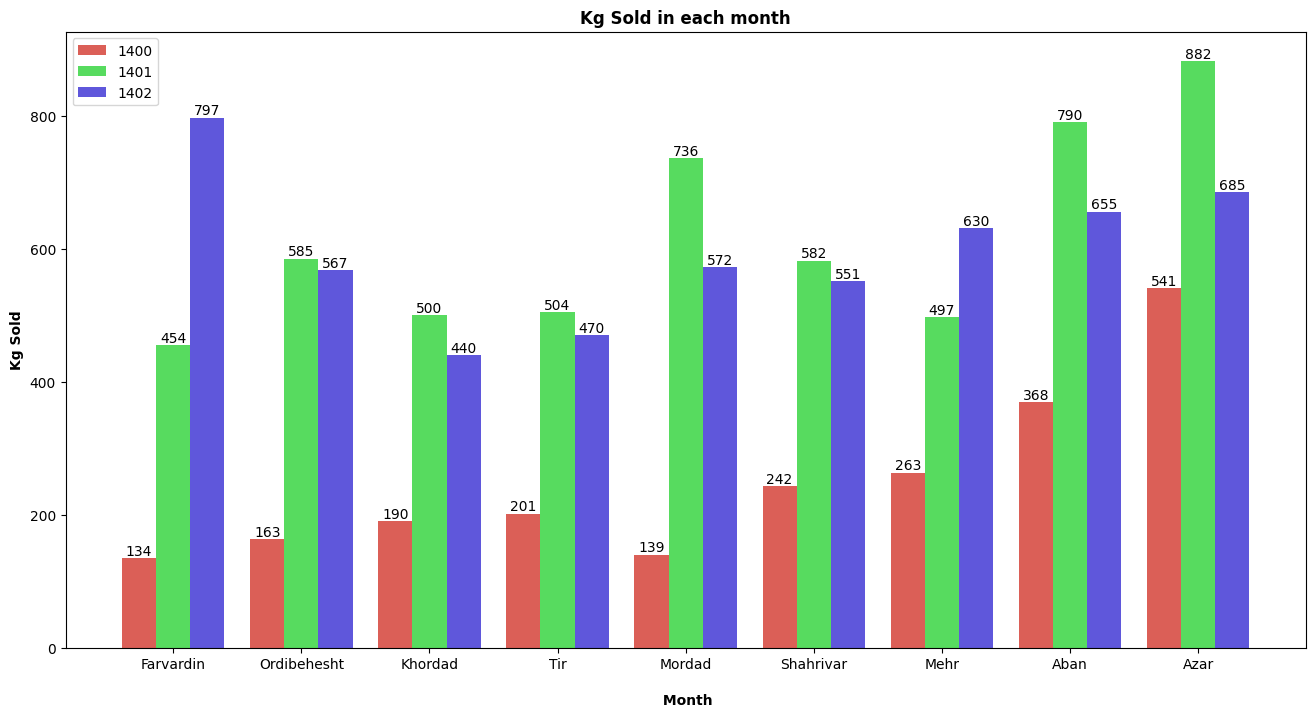

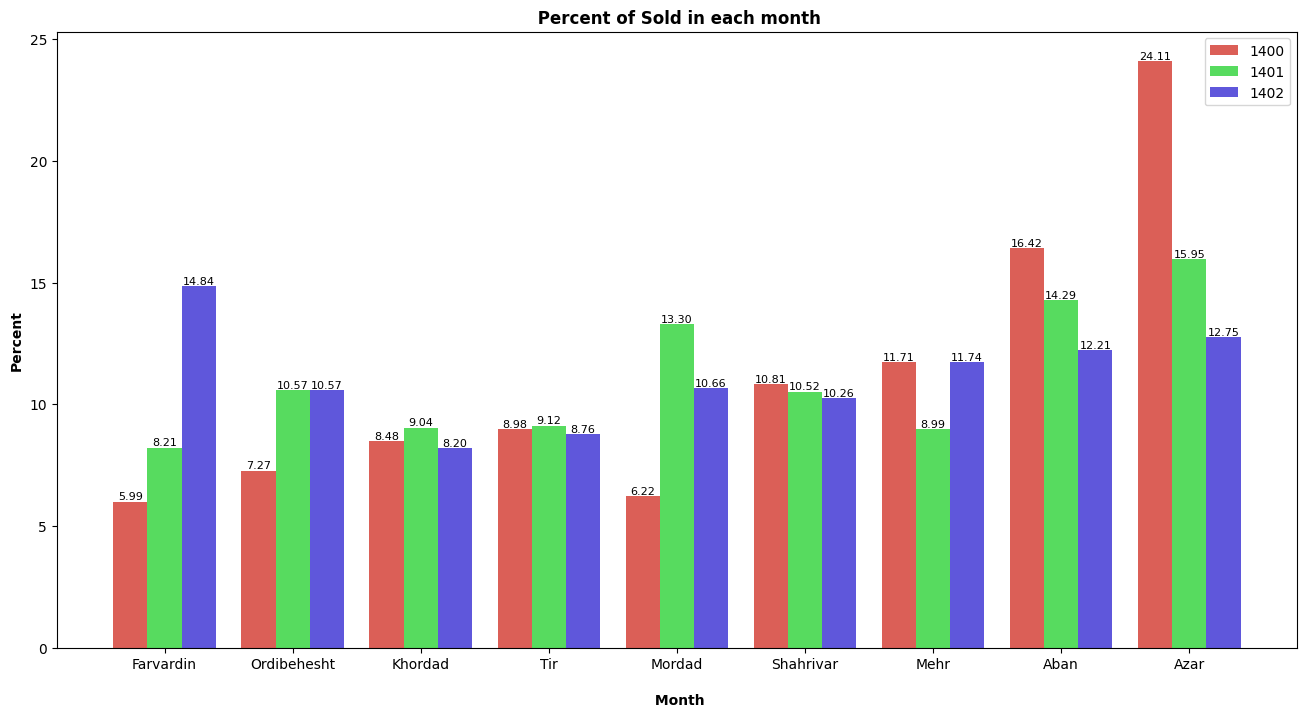

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [43]:
sale_1400 = city(sale_1400, city_1402_df)
sale_1401 = city(sale_1401, city_1402_df)
sale_1402 = city(sale_1402, city_1402_df)

def top_cafe_delete(df):
    top_cafe_dict = {}
    all_cafe = set(df[df["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    for i in all_cafe:
        buy_kg = sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())
        top_cafe_dict[i] = buy_kg

    sorted_cafe = sorted(top_cafe_dict, key=lambda k: top_cafe_dict[k], reverse=True)[:int(len(all_cafe)*0.2)]
    df = df[~df["كد مشتري"].isin(sorted_cafe)]
    return df

def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg= round(sum(df[df["ماه"] == i] ["مقدار-فرعي"].to_list())/1000,6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(top_cafe_delete(sale_1400))
kg_1401 = kg_month(top_cafe_delete(sale_1401))
kg_1402 = kg_month(top_cafe_delete(sale_1402))


group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"]

# Generate a random color palette
num_colors = 3  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)

# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Kg Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [kg_1400, kg_1401, kg_1402])

plt.show()


def kg_month(df):
    total_kg = sum(df["مقدار-فرعي"].to_list())
    data_dict = {}
    for i in set(df["ماه"]):
        kg= (sum(df[df["ماه"] == i]["مقدار-فرعي"].to_list()) / total_kg)* 100
        data_dict[f"{i}"] = kg
    return list(data_dict.values())


kg_1400 = kg_month(top_cafe_delete(sale_1400))
kg_1401 = kg_month(top_cafe_delete(sale_1401))
kg_1402 = kg_month(top_cafe_delete(sale_1402))

group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"]

num_colors = 3  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)
# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Percent', weight='semibold')
    plt.title(" Percent of Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.2f}', ha='center', va='bottom', size=8)
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [kg_1400, kg_1401, kg_1402])

plt.show()


top_city(top_cafe_delete(sale_1400), "1400" )
top_city(top_cafe_delete(sale_1401), "1401")
top_city(top_cafe_delete(sale_1402), "1402")

top_cafe(top_cafe_delete(sale_1400), "1400" )
top_cafe(top_cafe_delete(sale_1401), "1401")
top_cafe(top_cafe_delete(sale_1402), "1402")


def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg = round(sum(df[df["ماه"] == i]["مقدار-فرعي"].to_list()) / 1000, 6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(top_cafe_delete(sale_1400))
kg_1401 = kg_month(top_cafe_delete(sale_1401))
kg_1402 = kg_month(top_cafe_delete(sale_1402))

monthly_sales_series_1400 = pd.Series(kg_1400)
monthly_sales_series_1401 = pd.Series(kg_1401)
monthly_sales_series_1402 = pd.Series(kg_1402)

# Calculate the monthly SMA using the rolling() and mean() functions
monthly_sma_1400 = monthly_sales_series_1400.rolling(window=2).mean()  # Adjust the window size as per your requirement
monthly_sma_1401 = monthly_sales_series_1401.rolling(window=2).mean()
monthly_sma_1402 = monthly_sales_series_1402.rolling(window=2).mean()

# Create a new plot with a title and axis labels
p = figure(title="Monthly SMA of Sales", x_axis_label='\nMonths', y_axis_label='Sales', width=1000, height=600)

# Add a line renderer with legend and line thickness
p.line(list(range(len(monthly_sales_series_1400))), monthly_sales_series_1400, legend_label="Monthly Average 1400", line_width=2, line_color="blue")
p.line(list(range(len(monthly_sales_series_1401))), monthly_sales_series_1401, legend_label="Monthly Average 1401", line_width=2, line_color="green")
p.line(list(range(len(monthly_sales_series_1402))), monthly_sales_series_1402, legend_label="Monthly Average 1402", line_width=2, line_color="red")

# Set x-axis labels
p.xaxis.ticker = list(range(len(monthly_sales_series_1402)))
p.xaxis.major_label_overrides = {i: label for i, label in enumerate(['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"])}
p.legend.location = "top_left"


# Show the plot
output_notebook()

show(p)


## Adding top 1401 cafe that are not working with us now

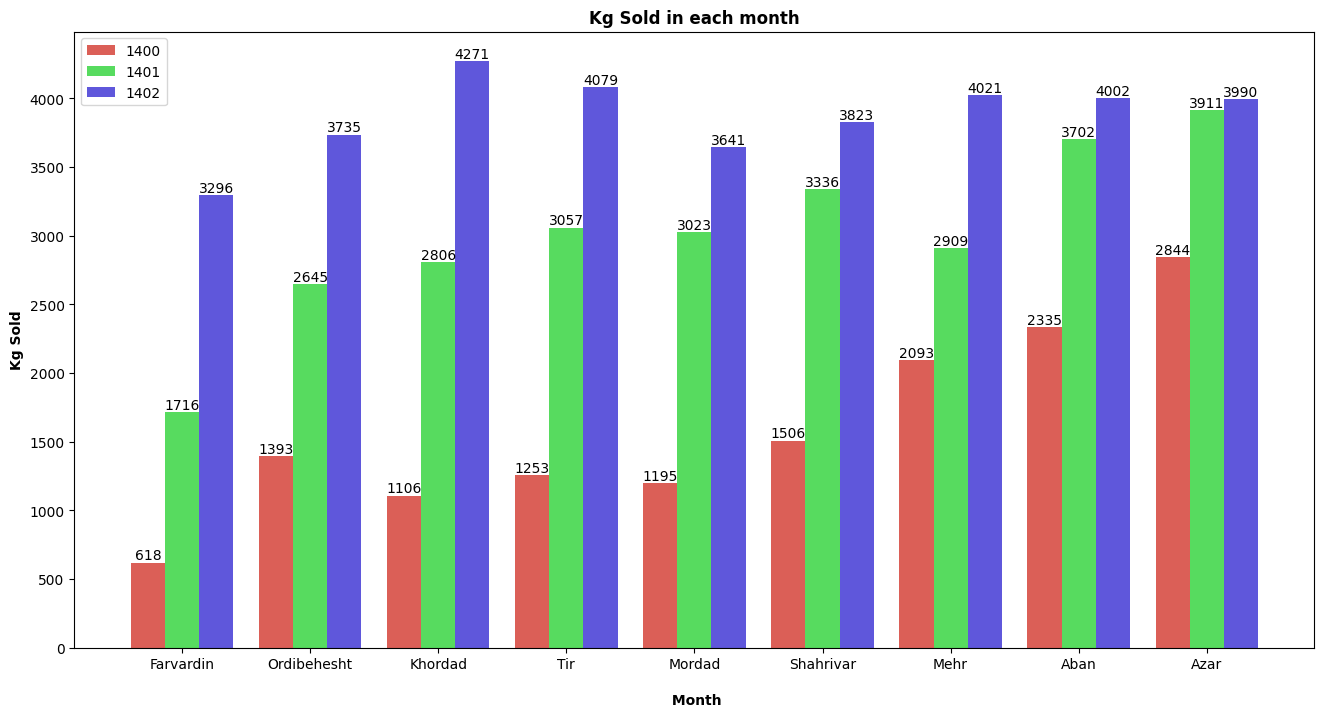

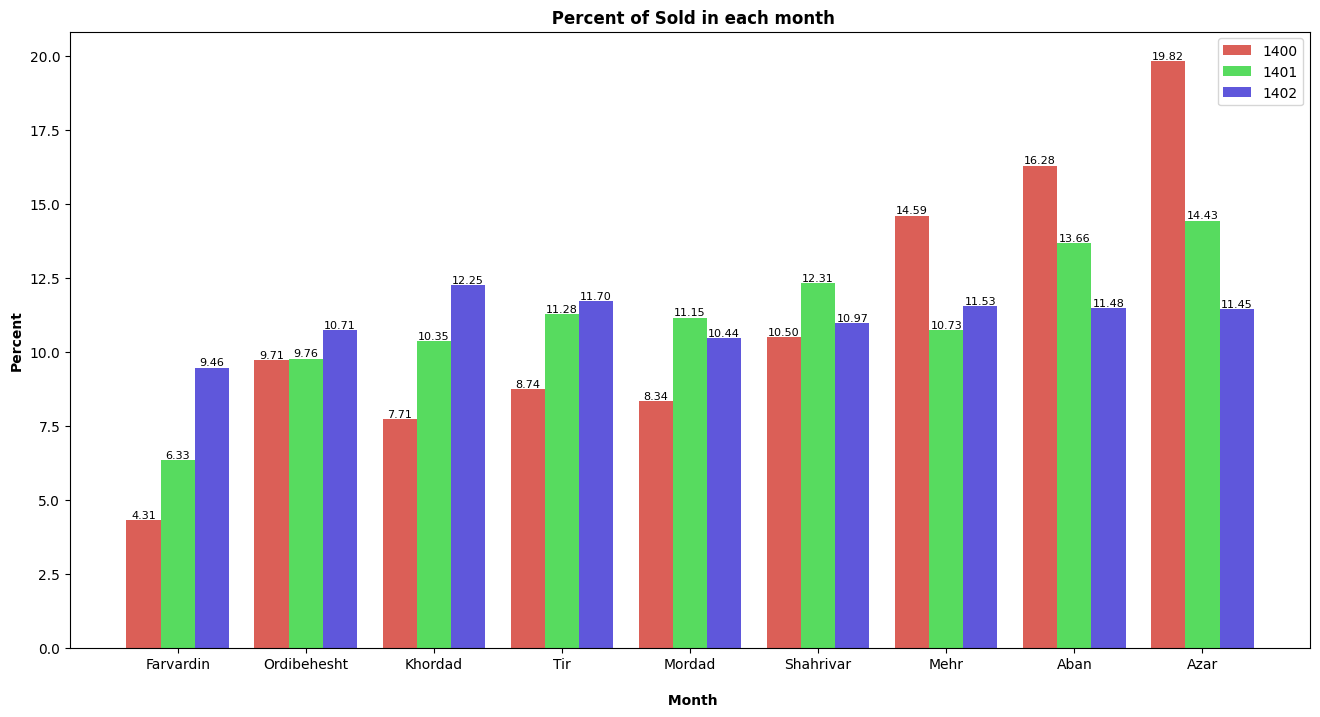

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

,0,1,2
0,618.187030,1716.935,3296.52
1,1393.335685,2645.960,3735.16
2,1106.099670,2806.835,4271.85
3,1253.461015,3057.115,4079.78
4,1195.910685,3023.130,3641.34
5,1506.310355,3336.765,3823.05
6,2093.867690,2909.485,4021.10
7,2335.961345,3702.845,4002.45
8,2844.118350,3911.540,3990.99


In [44]:
def top_cafe_join(df,df2):
    # creating a dict of cafes and their sale in last year
    top_cafe_dict = {}
    all_cafe_1 = set(df[df["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    for i in all_cafe_1:
        buy_kg = sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())
        top_cafe_dict[i] = buy_kg

    # finding top cafes of last year (top 20%)
    sorted_cafe = sorted(top_cafe_dict, key=lambda k: top_cafe_dict[k], reverse=True)[:int(len(all_cafe_1)*0.2)]

    # check which cafe were in last year but not in this year
    all_cafe_2 = set(df2[df2["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    not_in_second_year_cafe = [x for x in sorted_cafe if x not in all_cafe_2]

    # selecting the dataframes of those cafe
    target_rows = df[df["كد مشتري"].isin(not_in_second_year_cafe)]

    # adding this datfame to the next years dataframe
    df2 = pd.concat([df2, target_rows])
    return df2

def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg= round(sum(df[df["ماه"] == i] ["مقدار-فرعي"].to_list())/1000,6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(top_cafe_join(sale_1401,sale_1402))

group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"]

# Generate a random color palette
num_colors = 3  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)

# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Kg Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [kg_1400, kg_1401, kg_1402])

plt.show()


def kg_month(df):
    total_kg = sum(df["مقدار-فرعي"].to_list())
    data_dict = {}
    for i in set(df["ماه"]):
        kg= (sum(df[df["ماه"] == i]["مقدار-فرعي"].to_list()) / total_kg)* 100
        data_dict[f"{i}"] = kg
    return list(data_dict.values())


kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(top_cafe_join(sale_1401,sale_1402))


group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"]

num_colors = 3  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)
# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Percent', weight='semibold')
    plt.title(" Percent of Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height:.2f}', ha='center', va='bottom', size=8)
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1400', '1401', '1402'])



bar_group(group, [kg_1400, kg_1401, kg_1402])

plt.show()


top_city(sale_1400, "1400" )
top_city(sale_1401, "1401")
top_city(top_cafe_join(sale_1401,sale_1402), "1402")

top_cafe(sale_1400, "1400" )
top_cafe(sale_1401, "1401")
top_cafe(top_cafe_join(sale_1401,sale_1402), "1402")


def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg = round(sum(df[df["ماه"] == i]["مقدار-فرعي"].to_list()) / 1000, 6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(top_cafe_join(sale_1401,sale_1402))

monthly_sales_series_1400 = pd.Series(kg_1400)
monthly_sales_series_1401 = pd.Series(kg_1401)
monthly_sales_series_1402 = pd.Series(kg_1402)

# Calculate the monthly SMA using the rolling() and mean() functions
monthly_sma_1400 = monthly_sales_series_1400.rolling(window=2).mean()  # Adjust the window size as per your requirement
monthly_sma_1401 = monthly_sales_series_1401.rolling(window=2).mean()
monthly_sma_1402 = monthly_sales_series_1402.rolling(window=2).mean()

# Create a new plot with a title and axis labels
p = figure(title="Monthly SMA of Sales", x_axis_label='\nMonths', y_axis_label='Sales', width=1000, height=600)

# Add a line renderer with legend and line thickness
p.line(list(range(len(monthly_sales_series_1400))), monthly_sales_series_1400, legend_label="Monthly Average 1400", line_width=2, line_color="blue")
p.line(list(range(len(monthly_sales_series_1401))), monthly_sales_series_1401, legend_label="Monthly Average 1401", line_width=2, line_color="green")
p.line(list(range(len(monthly_sales_series_1402))), monthly_sales_series_1402, legend_label="Monthly Average 1402", line_width=2, line_color="red")

# Set x-axis labels
p.xaxis.ticker = list(range(len(monthly_sales_series_1402)))
p.xaxis.major_label_overrides = {i: label for i, label in enumerate(['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar"])}
p.legend.location = "top_left"


# Show the plot
output_notebook()

show(p)
pd.DataFrame([monthly_sales_series_1400,monthly_sales_series_1401,monthly_sales_series_1402]).T

## lost cafe 

In [45]:
def top_cafe_lost(df,df2):
    # creating a dict of cafes and their sale in last year
    top_cafe_dict = {}
    all_cafe_1 = set(df[df["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    for i in all_cafe_1:
        buy_kg = sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())
        top_cafe_dict[i] = buy_kg

    # finding top cafes of last year (top 20%)
    sorted_cafe = sorted(top_cafe_dict, key=lambda k: top_cafe_dict[k], reverse=True)[:int(len(all_cafe_1)*0.2)]

    # check which cafe were in last year but not in this year
    all_cafe_2 = set(df2[df2["كد گروه مشتري"] == 2]["كد مشتري"].to_list())
    not_in_second_year_cafe = [x for x in sorted_cafe if x not in all_cafe_2]
    print(f"there are {len(not_in_second_year_cafe)} cafes which were on top 20% of cafes last year but they are not buying from us in this year ")
    print("------------------------------------------------------------------------------------------------------------------------\n")

    print("cafes with their total kg ordered in last year is as follows:\n")
    cafe_buy_dict = {}
    for i in not_in_second_year_cafe:
        kg = round(sum(df[df["كد مشتري"] == i]["مقدار-فرعي"].to_list())/1000,3)
        cafe_buy_dict[i] = {"name": df[df["كد مشتري"] == i]["مشتري"].to_list()[0],
                        "kg": kg }
    lost_cafe = pd.DataFrame(cafe_buy_dict).T
    return lost_cafe
top_cafe_lost(sale_1401,sale_1402)

there are 12 cafes which were on top 20% of cafes last year but they are not buying from us in this year 
------------------------------------------------------------------------------------------------------------------------

cafes with their total kg ordered in last year is as follows:



,name,kg
20434,پرشين كاپ (اميرحسين غفوريان),3055.5
20897,كافه سبوس (محسن ناطق ),641.2
20132,كافه اينبار (آرش آقايي),222.8
20500,كافه وانيا (اميد رجبي ),179.92
20077,كافه صدف (مرتضي موسوي ),152.3
21684,پروژه د نياوران (امين صالحي),136.5
21254,نان سحر (محمود خاورپور),124.0
21247,كافه گراف (مصفا),118.25
20473,بوفه ي انديشه نو(مينا جعفري),100.88
20665,كافه دست (علي عطار ),100.0


## Vol 3

In [7]:
import pandas as pd
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.models import Label
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import random
import matplotlib as mpl
import seaborn as sns
import numpy as np

city_1402_df = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /طرف حساب 1402.xlsx")
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")
sale_1400 = sale_1400[sale_1400["ماه"] <=11]
sale_1401 = sale_1401[sale_1401["ماه"] <=11]
sale_1402 = sale_1402[sale_1402["ماه"] <=11]

sale_1400["مقدار-فرعي"].fillna(0, inplace=True)
sale_1401["مقدار-فرعي"].fillna(0, inplace=True)
sale_1402["مقدار-فرعي"].fillna(0, inplace=True)

def extract_persian_name(input_string):
    persian_pattern = r'[\u0600-\u06FF\s]+'
    persian_name = re.findall(persian_pattern, input_string)
    persian_name = ' '.join(persian_name)
    return persian_name

# Apply the function to each row of the name column
sale_1400['كالا/خدمت'] = sale_1400['كالا/خدمت'].apply(extract_persian_name)
sale_1401['كالا/خدمت'] = sale_1401['كالا/خدمت'].apply(extract_persian_name)
sale_1402['كالا/خدمت'] = sale_1402['كالا/خدمت'].apply(extract_persian_name)

def modify_string(text):
    if isinstance(text, str) and "مركزي" in text:
        modified_text = text.replace("مركزي", "").split()
        modified_text = " ".join(modified_text)
        return modified_text
    else:
        return text
city_1402_df["شهر"] = city_1402_df["شهر"].apply(modify_string)

def city(sale,city_df): 
    city_dict = {}
    for i in range(len(city_df)):
        code = city_df.loc[i, "كد"]
        customer_city = city_df.loc[i, "شهر"]
        city_dict[code] = customer_city

    sale["شهر"] = None
    for i in range(len(sale)):
        try:
            code = sale.loc[i, "كد مشتري"]
            sale.loc[i,"شهر"] = city_dict[code]
        except:
            continue
    return sale

sale_1400 = city(sale_1400, city_1402_df)
sale_1401 = city(sale_1401, city_1402_df)
sale_1402 = city(sale_1402, city_1402_df)

sale = pd.concat([sale_1400,sale_1401,sale_1402], ignore_index=True)

## New Customers in each month


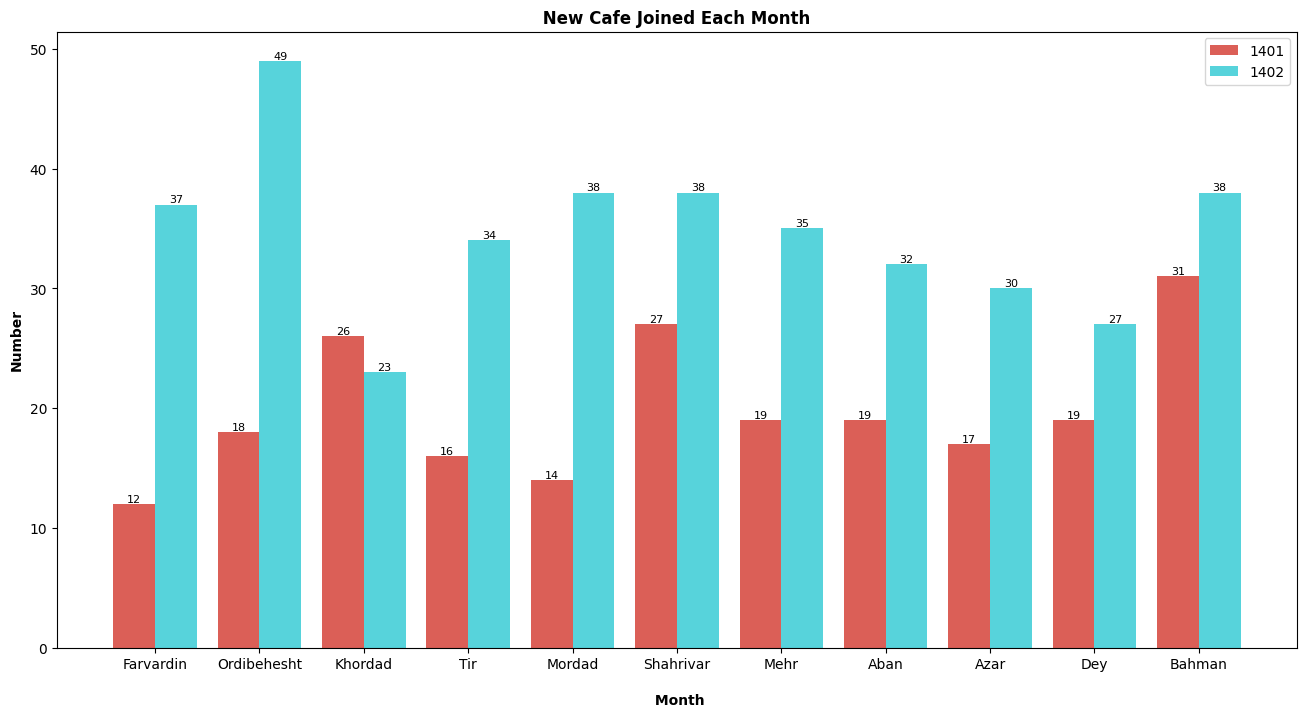

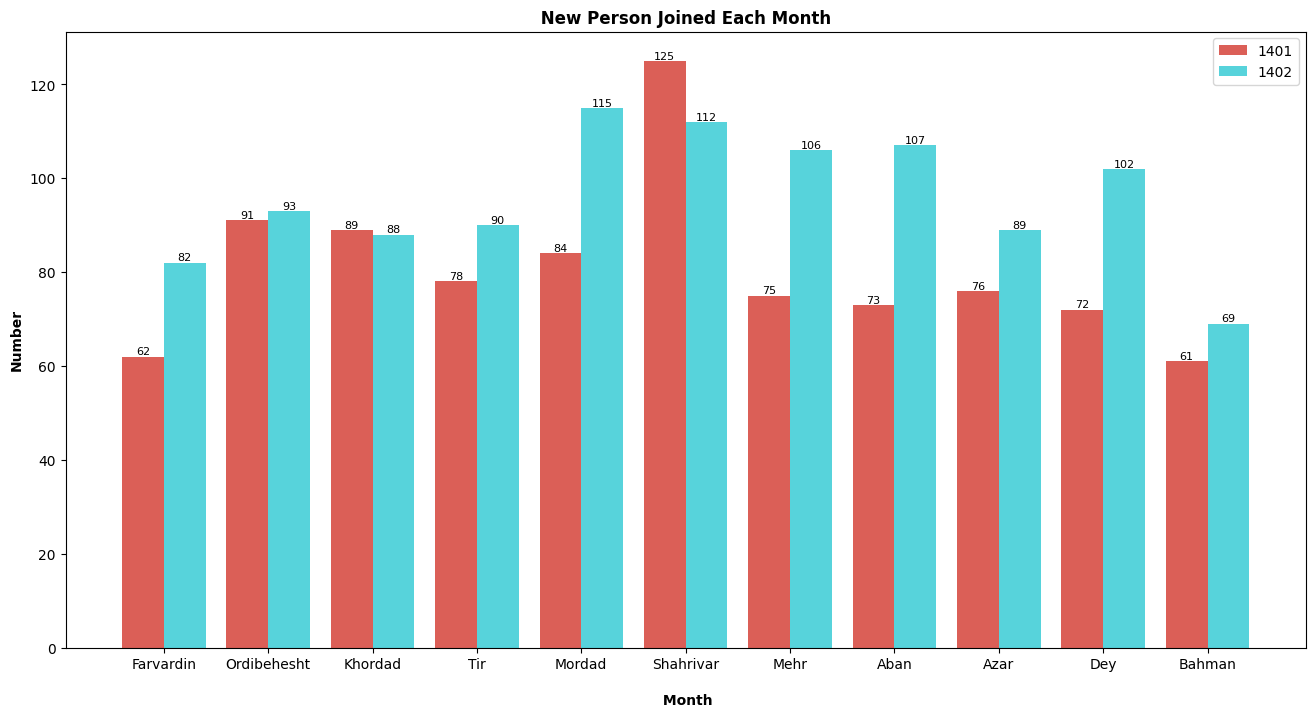

381
1053


In [15]:
cafe_ids = {}
person_ids = {}

for i in set(sale["كد مشتري"].to_list()):
    try:
        customer_status = int(sale[sale["كد مشتري"] == i ]["كد گروه مشتري"].to_list()[0])
        year = int(sale[sale["كد مشتري"] == i ]["تاريخ"].to_list()[0][:4])
        month = int(sale[sale["كد مشتري"] == i ]["تاريخ"].to_list()[0][5:7])
        if customer_status == 2:
                cafe_ids[i] = {"year": year, "month": month}

        elif customer_status == 1:
                person_ids[i] = {"year": year, "month": month}
    except:
        continue

cafe_ids_df = pd.DataFrame(cafe_ids).T
person_ids_df = pd.DataFrame(person_ids).T


df_1401 = person_ids_df[person_ids_df["year"]==1401]
new_customers_dict = {}
for i in set(df_1401["month"].to_list()):
    new_customers_dict[f"{i}"] = len(df_1401[df_1401["month"] == i])
person_ids_1401 = pd.DataFrame(pd.Series(new_customers_dict)).reset_index()
person_ids_1401["year"] = 1401
person_ids_1401["customer_Type"] = "Personal"


df_1402 = person_ids_df[person_ids_df["year"]==1402]
new_customers_dict = {}
for i in set(df_1402["month"].to_list()):
    new_customers_dict[f"{i}"] = len(df_1402[df_1402["month"] == i])
person_ids_1402 = pd.DataFrame(pd.Series(new_customers_dict)).reset_index()
person_ids_1402["year"] = 1402
person_ids_1402["customer_Type"] = "Personal"



df_1401 = cafe_ids_df[cafe_ids_df["year"]==1401]
new_customers_dict = {}
for i in set(df_1401["month"].to_list()):
    new_customers_dict[f"{i}"] = len(df_1401[df_1401["month"] == i])
cafe_ids_1401 = pd.DataFrame(pd.Series(new_customers_dict)).reset_index()
cafe_ids_1401["year"] = 1401
cafe_ids_1401["customer_Type"] = "Cafe"


df_1402 = cafe_ids_df[cafe_ids_df["year"]==1402]
new_customers_dict = {}
for i in set(df_1402["month"].to_list()):
    new_customers_dict[f"{i}"] = len(df_1402[df_1402["month"] == i])
cafe_ids_1402 = pd.DataFrame(pd.Series(new_customers_dict)).reset_index()
cafe_ids_1402["year"] = 1402
cafe_ids_1402["customer_Type"] = "Cafe"


cafe_ids_1401_list = cafe_ids_1401[0].to_list()
cafe_ids_1402_list = cafe_ids_1402[0].to_list()

person_ids_1401_list = person_ids_1401[0].to_list()
person_ids_1402_list = person_ids_1402[0].to_list()



group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar", "Dey","Bahman"]

num_colors = 2  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)
# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values,string, width=0.8):
    plt.figure(figsize=(16,8))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Number', weight='semibold')
    plt.title(f" New {string} Joined Each Month ",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,  f'{height}', ha='center', va='bottom', size=8)
    plt.xticks(classes_num, classes, size=10)
    plt.legend(['1401', '1402'])


bar_group(group, [cafe_ids_1401_list, cafe_ids_1402_list] , "Cafe")
bar_group(group, [person_ids_1401_list, person_ids_1402_list], "Person")



plt.show()

print(sum(cafe_ids_1402[0].to_list()))
print(sum(person_ids_1402[0].to_list()))


## Growth Rate of each city

In [17]:

def top_city_growth(sale,sale1, string):
    city = sale["شهر"].value_counts().to_dict()
    total_sale = sum(sale["خالص"].to_list())
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    city_dict = {}
    for i in city.keys():
        try:
            series_df = sale[sale["شهر"] == i]
            # their Total KG
            kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,3)
            # their Total Rial
            bought = sum(series_df["خالص"].tolist())
            # adding the values to a dict
            city_dict[i] = {"kg" : kg, "Total_Sale": bought}
        except:
            continue
    top_city = sorted(city_dict, key=lambda k: city_dict[k]['kg'], reverse=True)[:11]
    top_city_dict = {}
    for i in top_city:
        series_df = sale1[sale1["شهر"] == i]
        last_year_kg_sale = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,3)
        top_city_dict[i] = {"kg" : city_dict[i]["kg"], "growth rate": round(((city_dict[i]["kg"] - last_year_kg_sale)/last_year_kg_sale )*100,2)}


    # plot the output
    x = list(top_city_dict.keys())
    y = []
    for i in top_city_dict.keys():
        y.append(top_city_dict[i]["kg"])

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= f"Growth of Top 10 City {string}",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Add exact value labels on top of the bars
    label_font_size = '6pt'  # Set the desired font size here
    x_offset = 40  # Set the desired x offset here
    y_offset = 10  # Set the desired y offset here

    for i, value in enumerate(y):
        name_of_city = top_city[i]
        growth_rate = top_city_dict[name_of_city]["growth rate"]
        label = Label(x=i, y=value, text=str(value) + f" ({growth_rate}%)" , text_baseline='middle', text_align='center',
                       text_font_size=label_font_size, x_offset=x_offset, y_offset=y_offset)
        p.add_layout(label)

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels

    # Show the plot
    output_notebook()
    show(p)
    print(len(city_dict))


top_city_growth(sale_1402, sale_1401 ,"1402" )


Loading BokehJS ...

138


## how much each city causes growth or decrease of our total sale

In [49]:

def top_city_contribution(sale,sale1, string):
    city = sale["شهر"].value_counts().to_dict()
    total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
    total_kg_sale_last = round((sum(sale1["مقدار-فرعي"].to_list())) / 1000,3)
    city_dict = {}
    for i in city.keys():
        try:
            series_df = sale1[sale1["شهر"] == i]
            # their Total KG
            kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,3)
            city_dict[i] = {"last_year_kg" : kg, "contribution": kg/total_kg_sale_last}
        except:
            continue
        
    for i in city_dict.keys():
        if i in sale["شهر"].value_counts():
            last_year_kg = round(sum(sale[sale["شهر"] == i]["مقدار-فرعي"].to_list()) / 1000,3)
            city_dict[i].update({"this_year_kg": last_year_kg})
            try:
                engagement = round((((city_dict[i]["this_year_kg"] - city_dict[i]["last_year_kg"]) / city_dict[i]["last_year_kg"]) * city_dict[i]["contribution"])*100,2)
                city_dict[i].update({"engagement": engagement })

            except:
                continue
            
        else:
            continue

    engagement_dict = {} 
    for i in city_dict.keys():
        try:
            value = city_dict[i]["engagement"]
            engagement_dict.update({i: value})
        except:
            continue

    status = string
    sorted_dict = dict(sorted(engagement_dict.items(), key=lambda item: item[1], reverse=status))

    top_10 = dict(list(sorted_dict.items())[:10])

        # plot the output
    x = list(top_10.keys())
    y = list(top_10.values())

    # Create a ColumnDataSource
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=600, width=1000 ,title= "Weighted Growth of Each City",
            toolbar_location=None, tools="")

    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")

    # Customize the plot
    p.xgrid.grid_line_color = None
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels
    if string == True:
        yoffset = 10
    else:
        yoffset = -10
    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(value) + "%", text_baseline='middle', text_align='center',text_font_size="7pt",
                      x_offset=40, y_offset= yoffset)
        p.add_layout(label)

    # Show the plot1
    output_notebook()
    show(p)

top_city_contribution(sale_1402,sale_1401,True)
top_city_contribution(sale_1402,sale_1401,False)

Loading BokehJS ...

Loading BokehJS ...

## Vol4  
#### If 30% of cafes that only bought once were stayed as our custoers and bought 15 kg
#### If We used the Maximum Amount of sale of each city , what would have been?



In [1]:
import pandas as pd
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.models import Label
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import random
import matplotlib as mpl
import seaborn as sns
import numpy as np

city_1402_df = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /طرف حساب 1402.xlsx")
sale_1402 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش نيمه اول 1402.xlsx", sheet_name="فروش")
sale_1401 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project /فروش 1401.xlsx", sheet_name="فروش")
sale_1400 = pd.read_excel("/Users/mohammad/XAV/Departemant Sale/Project / فروش 1400.xlsx", sheet_name="فروش")
sale_1400 = sale_1400[sale_1400["ماه"] <=11]
sale_1401 = sale_1401[sale_1401["ماه"] <=11]
sale_1402 = sale_1402[sale_1402["ماه"] <=11]

sale_1400["مقدار-فرعي"].fillna(0, inplace=True)
sale_1401["مقدار-فرعي"].fillna(0, inplace=True)
sale_1402["مقدار-فرعي"].fillna(0, inplace=True)

def extract_persian_name(input_string):
    persian_pattern = r'[\u0600-\u06FF\s]+'
    persian_name = re.findall(persian_pattern, input_string)
    persian_name = ' '.join(persian_name)
    return persian_name

# Apply the function to each row of the name column
sale_1400['كالا/خدمت'] = sale_1400['كالا/خدمت'].apply(extract_persian_name)
sale_1401['كالا/خدمت'] = sale_1401['كالا/خدمت'].apply(extract_persian_name)
sale_1402['كالا/خدمت'] = sale_1402['كالا/خدمت'].apply(extract_persian_name)

def modify_string(text):
    if isinstance(text, str) and "مركزي" in text:
        modified_text = text.replace("مركزي", "").split()
        modified_text = " ".join(modified_text)
        return modified_text
    else:
        return text
city_1402_df["شهر"] = city_1402_df["شهر"].apply(modify_string)

def city(sale,city_df): 
    city_dict = {}
    for i in range(len(city_df)):
        code = city_df.loc[i, "كد"]
        customer_city = city_df.loc[i, "شهر"]
        city_dict[code] = customer_city

    sale["شهر"] = None
    for i in range(len(sale)):
        try:
            code = sale.loc[i, "كد مشتري"]
            sale.loc[i,"شهر"] = city_dict[code]
        except:
            continue
    return sale

sale_1400 = city(sale_1400, city_1402_df)
sale_1401 = city(sale_1401, city_1402_df)
sale_1402 = city(sale_1402, city_1402_df)

sale = pd.concat([sale_1400,sale_1401,sale_1402], ignore_index=True)

/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_95769/542971826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cafe_1402["KG"] = None
/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_95769/542971826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cafe_1402["order"] = None


there are 381 cafes that joined this year to us
their mean kg purchased is 18.855 and on average they bought us 9.02 times
there are 214 cafes that bought us under 5 time this year from us
if we kept only 1/3 of them , and if we suppose that they bought us 15 kg each month on average -->  we would add 1070.0 kg each month to our sale
-----------------------------------------------------------------------------------------










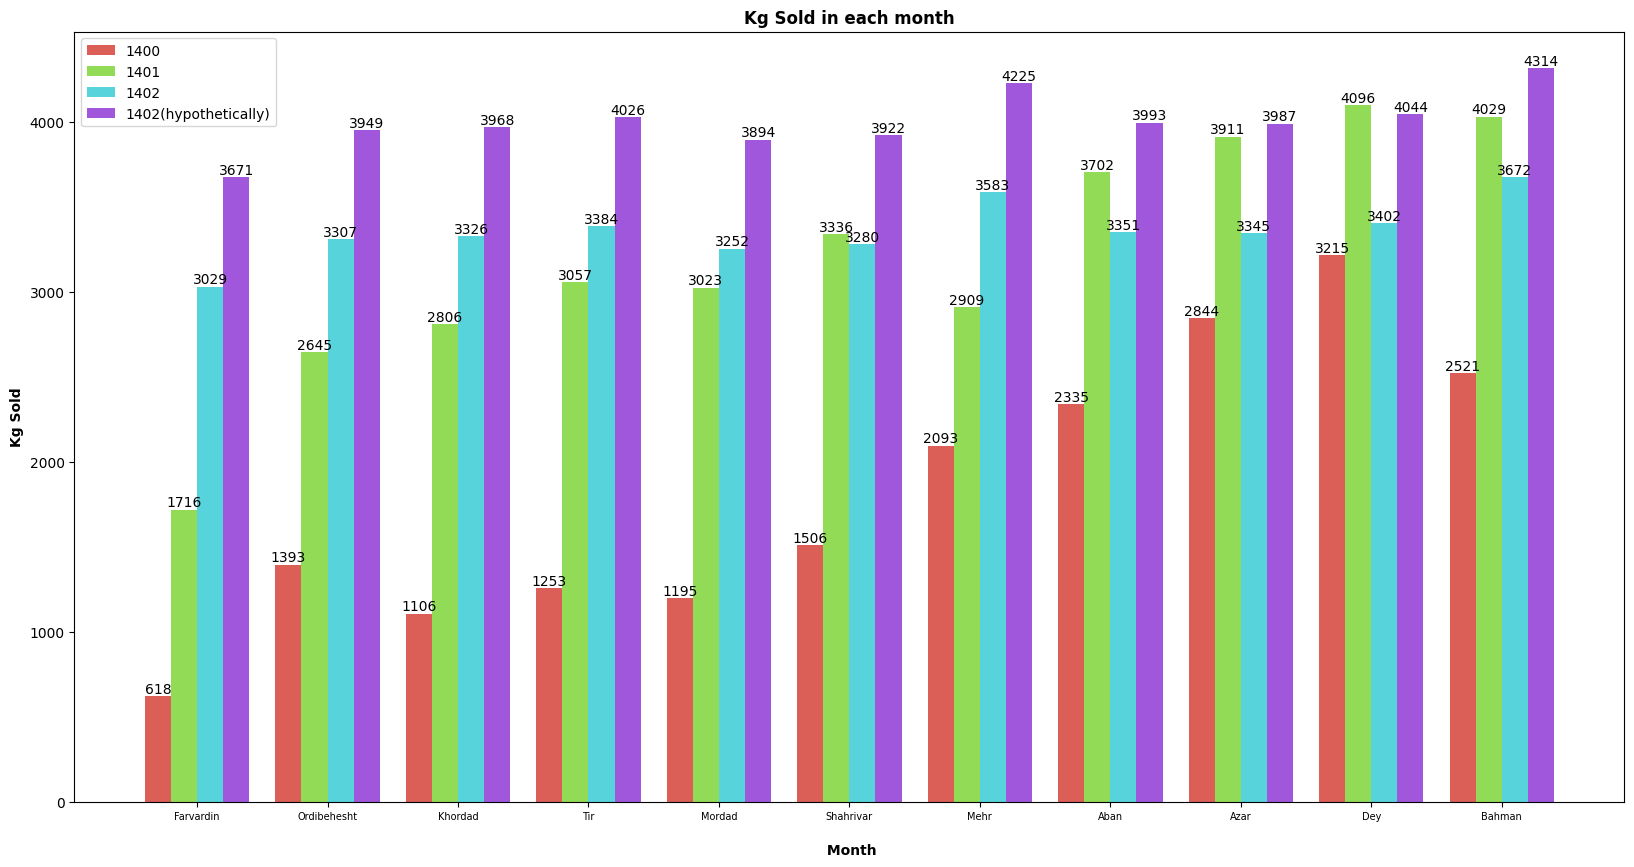

In [52]:
## all new cafes in 1402
new_cafe_1402 = cafe_ids_df[cafe_ids_df["year"]==1402]

## checking how much kg each of them bought us this year
new_cafe_1402["KG"] = None
new_cafe_1402["order"] = None

for i in new_cafe_1402.index.to_list():
    df = sale_1402[sale_1402["كد مشتري"] == i]
    kg = sum(df["مقدار-فرعي"].to_list())/1000
    new_cafe_1402.loc[i,"KG"] = kg
    new_cafe_1402.loc[i,"order"] = len(df)

buy_mean = round(new_cafe_1402["KG"].mean(),4)
order_mean = round(new_cafe_1402["order"].mean(),2)

print(f"there are {len(new_cafe_1402)} cafes that joined this year to us")
print(f"their mean kg purchased is {buy_mean:2} and on average they bought us {order_mean:2} times")

under_cafe = new_cafe_1402[new_cafe_1402["order"]<=5]
print(f"there are {len(under_cafe)} cafes that bought us under 5 time this year from us")

print(f"if we kept only 1/3 of them , and if we suppose that they bought us 15 kg each month on average -->  we would add {len(under_cafe)/3*15} kg each month to our sale")
print("-----------------------------------------------------------------------------------------\n\n\n\n\n\n\n\n")


def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg= round(sum(df[df["ماه"] == i] ["مقدار-فرعي"].to_list())/1000,6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(sale_1402)

group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar", "Dey","Bahman"]

# Generate a random color palette
num_colors = 4  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)

# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(20,10))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Kg Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=7)
    plt.legend(['1400', '1401', '1402', "1402(hypothetically)"])

kg_1402_2 = []
for i in kg_1402:
    kg_1402_2.append(i+ (len(under_cafe)/5)*15)

bar_group(group, [kg_1400, kg_1401, kg_1402, kg_1402_2])

plt.show()







In [10]:
city_dict = {}
for i in set(sale_1402["شهر"].to_list()):
    df= sale_1402[sale_1402["شهر"]== i ]
    kg = round(sum(df["مقدار-فرعي"].to_list())/1000,3)
    city_dict[i] = {"1402":kg}

for i in set(sale_1401["شهر"].to_list()):
    df= sale_1401[sale_1401["شهر"]== i ]
    kg = round(sum(df["مقدار-فرعي"].to_list())/1000,3)
    try:
        city_dict[i] .update({"1401":kg})
    except:
        continue

for i in set(sale_1400["شهر"].to_list()):
    df= sale_1400[sale_1400["شهر"]== i ]
    kg = round(sum(df["مقدار-فرعي"].to_list())/1000,3)
    try:
        city_dict[i] .update({"1400":kg})
    except:
        continue

city_dict

{'كرمانشاه': {'1402': 49.46, '1401': 95.85, '1400': 89.112},
 'بندرماهشهر': {'1402': 0.6, '1400': 0.0},
 'كتالم وسادات محله': {'1402': 0.3},
 'تهران': {'1402': 18299.231, '1401': 13095.865, '1400': 8606.189},
 'مصيري': {'1402': 0.6},
 'بندرامام خميني': {'1402': 0.75},
 'گرگان': {'1402': 38.86, '1401': 22.755, '1400': 19.585},
 'قايم شهر': {'1402': 0.0},
 'زابل': {'1402': 106.42, '1400': 0.45},
 'مهاباد': {'1402': 0.27, '1401': 3.505, '1400': 3.93},
 'گرمسار': {'1402': 16.3, '1401': 28.0},
 'طرقبه': {'1402': 24.0},
 'صفاشهر': {'1402': 0.75},
 nan: {'1402': 0.0, '1401': 0.0, '1400': 0.0},
 'نوشهر': {'1402': 89.7, '1401': 5.4, '1400': 1.5},
 'كنگان': {'1402': 17.32, '1401': 1.5},
 'تايباد': {'1402': 0.9},
 'انديمشك': {'1402': 0.15},
 'اردبيل': {'1402': 111.49, '1401': 4.65, '1400': 0.6},
 'كياشهر': {'1402': 9.38, '1401': 23.55},
 'برازجان': {'1402': 4.15, '1401': 25.8, '1400': 1.225},
 'يزد': {'1402': 53.57, '1401': 42.655, '1400': 296.455},
 'خرم آباد': {'1402': 3.15},
 'محمودآباد': {'14

In [21]:
city_dict_2 = {}
for i in city_dict.keys():
    try:
        value_1400 = city_dict[i]["1400"]
        value_1401 = city_dict[i]["1401"]
        value_1402 = city_dict[i]["1402"]
    except:
        continue

    # Finding the maximum value among the three values
    max_value = max(value_1400, value_1401, value_1402)

    # Determining which value is the maximum
    max_value_name = ""
    if max_value == value_1400:
        max_value_name = "1400"
    elif max_value == value_1401:
        max_value_name = "1401"
    else:
        max_value_name = "1402"

    city_dict_2[i] = max_value_name



sale["year"] = None
for i in sale.index.to_list():
    date = sale.loc[i,"تاريخ"]
    year = str(date)[:4]
    sale.loc[i,"year"] = year

result_df = pd.DataFrame()
for i in set(sale["شهر"].to_list()):
    try:
        max_year = city_dict_2[i]
        # df of that year
        city = sale[sale["شهر"]==i]
        df = city[city["year"] == max_year]
        result_df = pd.concat([result_df, df], ignore_index=True)


    except:
        continue


    


41797.87468000001

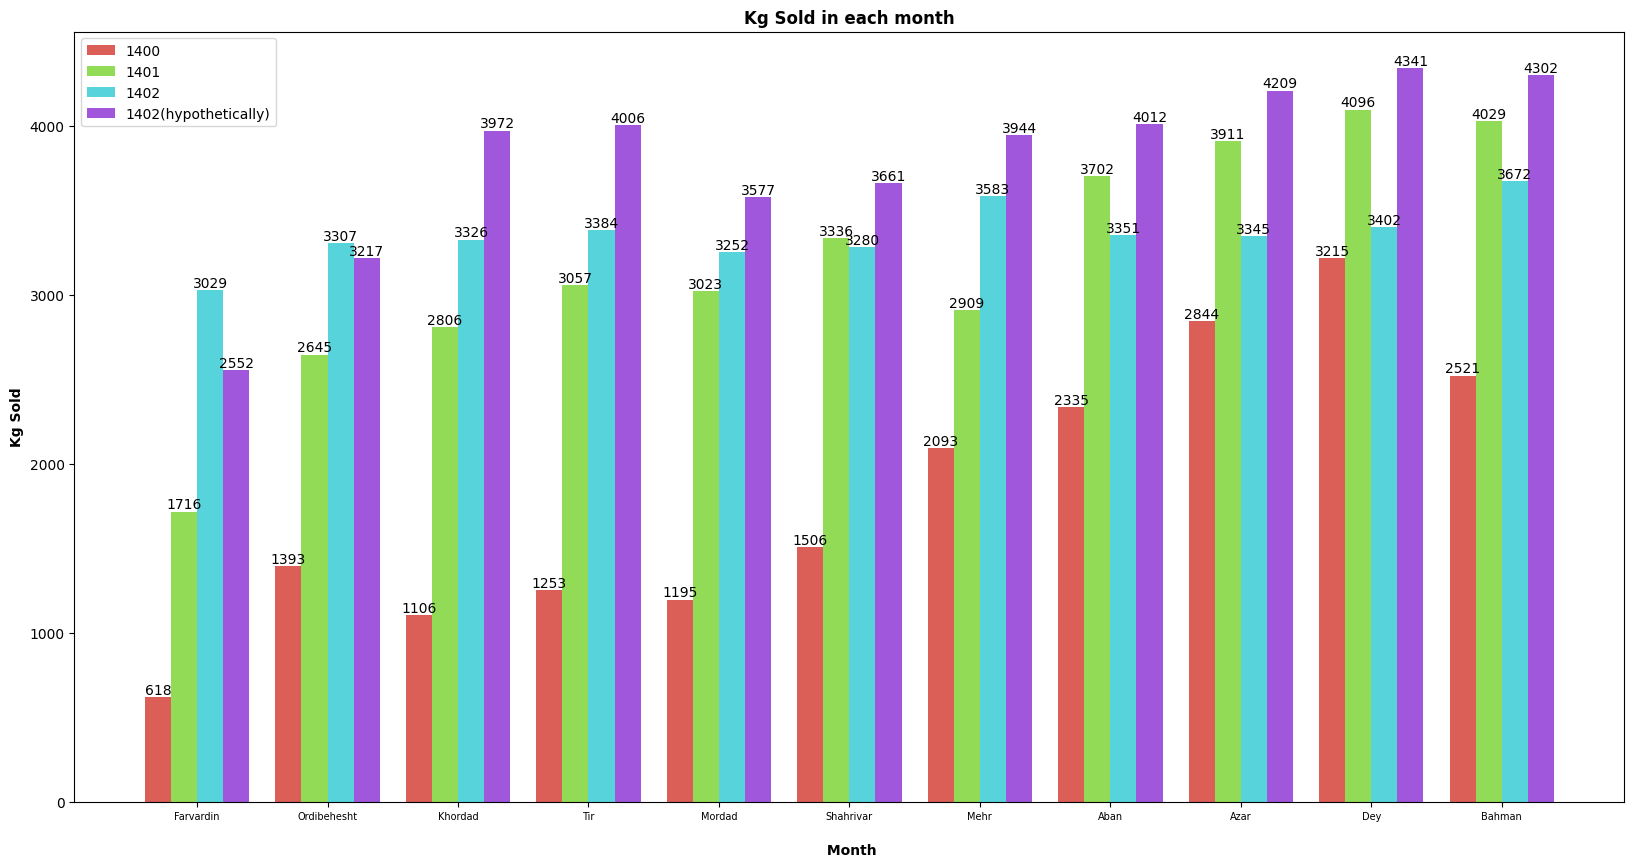

In [22]:
def kg_month(df):
    data_dict = {}
    for i in set(df["ماه"]):
        kg= round(sum(df[df["ماه"] == i] ["مقدار-فرعي"].to_list())/1000,6)
        data_dict[f"{i}"] = kg
    return list(data_dict.values())

kg_1400 = kg_month(sale_1400)
kg_1401 = kg_month(sale_1401)
kg_1402 = kg_month(sale_1402)
kg_1402_hy = kg_month(result_df)

group = ['Farvardin', 'Ordibehesht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', "Azar", "Dey","Bahman"]

# Generate a random color palette
num_colors = 4  # Number of colors in the palette
palette = sns.color_palette("hls", num_colors)

# Set the color cycle to use the random color palette
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette)


def bar_group(classes, values, width=0.8):
    plt.figure(figsize=(20,10))
    plt.xlabel('\n Month', weight='semibold')
    plt.ylabel('Kg Sold', weight='semibold')
    plt.title("Kg Sold in each month",weight='semibold' )
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, size=7)
    plt.legend(['1400', '1401', '1402', "1402(hypothetically)"])


bar_group(group, [kg_1400, kg_1401, kg_1402, kg_1402_hy])

plt.show()

In [8]:
sale = sale_1402[sale_1402["ماه"]==11]

city = sale["شهر"].value_counts().to_dict()
total_sale = sum(sale["خالص"].to_list())
total_kg_sale = round((sum(sale["مقدار-فرعي"].to_list())) / 1000,3)
city_dict = {}
for i in city.keys():
    try:
        series_df = sale[sale["شهر"] == i]
        # their Total KG
        kg = round(sum(series_df["مقدار-فرعي"].to_list()) / 1000,2)
        # their Total Rial
        bought = sum(series_df["خالص"].tolist())
        # adding the values to a dict
        city_dict[i] = {"kg" : kg, "Total_Sale": bought}
    except:
        continue
top_city = sorted(city_dict, key=lambda k: city_dict[k]['kg'], reverse=True)
top_city_dict = {}
for i in top_city:
    top_city_dict[i] = city_dict[i]["kg"]

# pd.DataFrame(top_city_dict,index=[0]).T.to_excel("قروش شهر بهمن.xlsx")